<a href="https://colab.research.google.com/github/PavanPk1/MyPractice_Colab_notebooks/blob/main/Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
auto = pd.read_csv('/content/Automobile_data.csv')
auto.head(1)

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   

  highway-mpg  price  
0          27  13495  

[1 rows x 26 columns]

In [4]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [5]:
auto.replace('?', np.nan, inplace =True)

In [6]:
auto.duplicated().sum()

np.int64(0)

In [7]:
auto.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [8]:
auto['price'] = auto['price'].apply(float)
auto['peak-rpm'] = auto['peak-rpm'].apply(float)
auto['horsepower'] = auto['horsepower'].apply(float)

# use astype to change to float
# auto['price'] = auto['price'].astype('float')

In [9]:
print('Fuel Types       : ', auto['fuel-type'].unique())
print('Body Styles      : ', auto['body-style'].unique())
print('Drive Wheels     : ', auto['drive-wheels'].unique())
print('Fuel System      : ', auto['fuel-system'].unique())
print('Engine Type      : ', auto['engine-type'].unique())
print('Aspiration       : ', auto['aspiration'].unique())
print('No. of Cylinders : ', auto['num-of-cylinders'].unique())

Fuel Types       :  ['gas' 'diesel']
Body Styles      :  ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Drive Wheels     :  ['rwd' 'fwd' '4wd']
Fuel System      :  ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
Engine Type      :  ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
Aspiration       :  ['std' 'turbo']
No. of Cylinders :  ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


In [10]:
 # Creating a new column
auto['comb_mpg'] = (auto['city-mpg'] + auto['highway-mpg']) / 2
auto.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3               NaN  alfa-romero       gas        std          two   
1          3               NaN  alfa-romero       gas        std          two   
2          1               NaN  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  fuel-system  \
0  convertible          rwd           front        88.6  ...         mpfi   
1  convertible          rwd           front        88.6  ...         mpfi   
2    hatchback          rwd           front        94.5  ...         mpfi   
3        sedan          fwd           front        99.8  ...         mpfi   
4        sedan          4wd           front        99.4  ...         mpfi   

   bore  stroke  compression-ratio horsepower peak-rpm  city-mpg highway-mpg  \
0  3.47    2.68                9.0      111.0   5000.0        21          27   
1  3.47    2.68                9.0      111.0   5000.0        21          27   
2  2.68    3.47                9.0      154.0   5000.0        19          26   
3  3.19     3.4               10.0      102.0   5500.0        24          30   
4  3.19     3.4                8.0      115.0   5500.0        18          22   

     price comb_mpg  
0  13495.0     24.0  
1  16500.0     24.0  
2  16500.0     22.5  
3  13950.0     27.0  
4  17450.0     20.0  

[5 rows x 27 columns]

------
------
## Creating a visualization using Seaborn

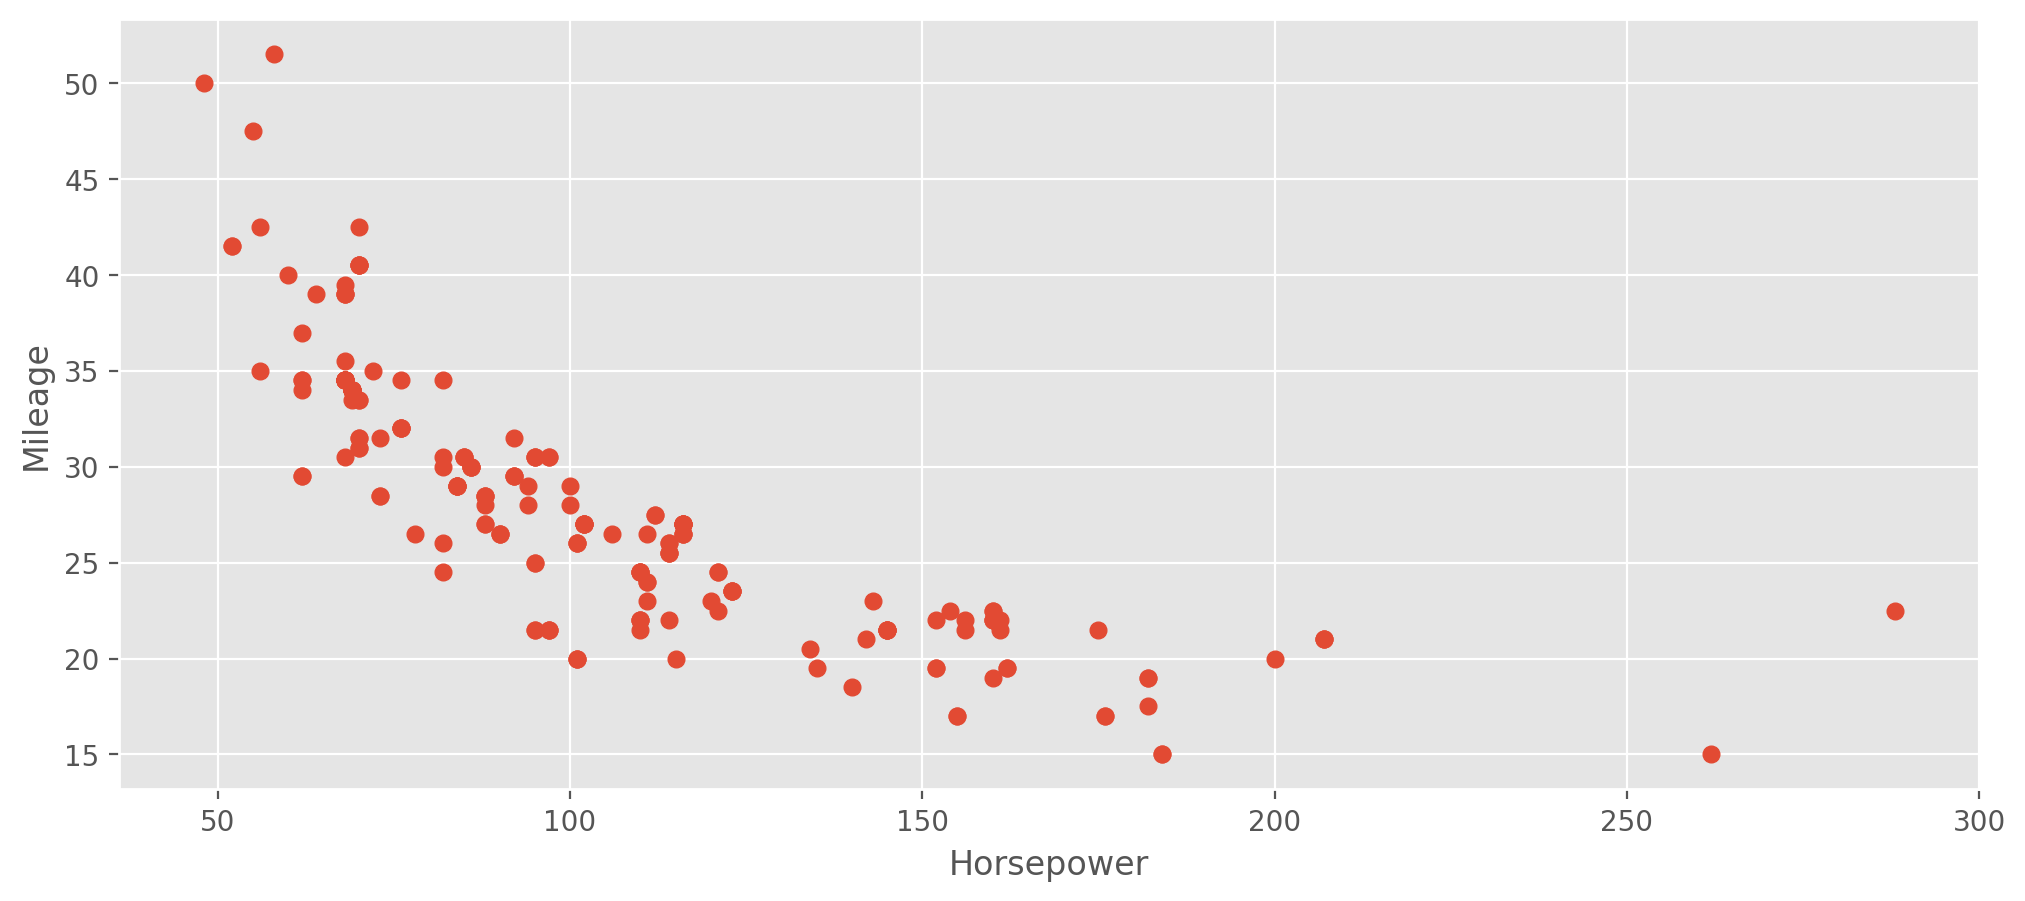

In [11]:
plt.figure(figsize = (12,5), dpi = 200)
plt.scatter(auto['horsepower'], auto['comb_mpg'])
plt.xlabel("Horsepower")
plt.ylabel("Mileage")

plt.show()

<Axes: xlabel='horsepower', ylabel='comb_mpg'>

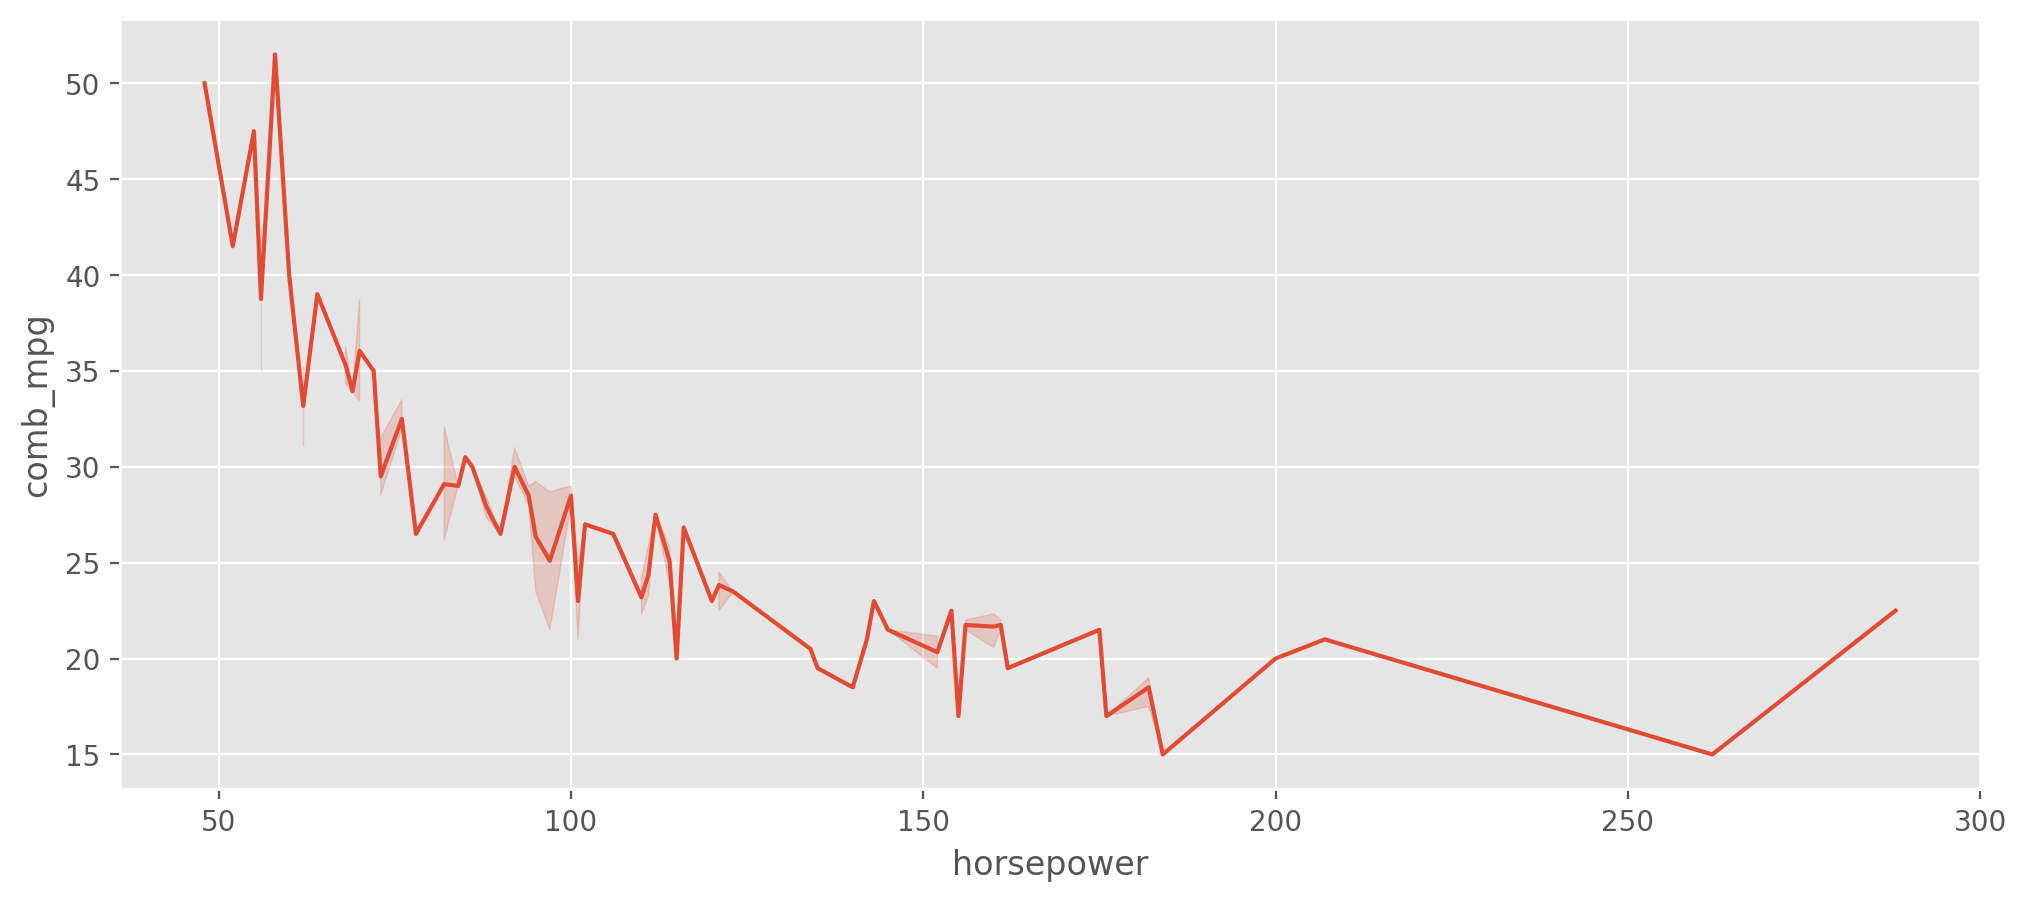

In [12]:
plt.figure(figsize = (12,5), dpi = 200)
sns.lineplot(data = auto, x = 'horsepower', y = 'comb_mpg')

Text(0, 0.5, 'Mileage (Combined in MPG)')

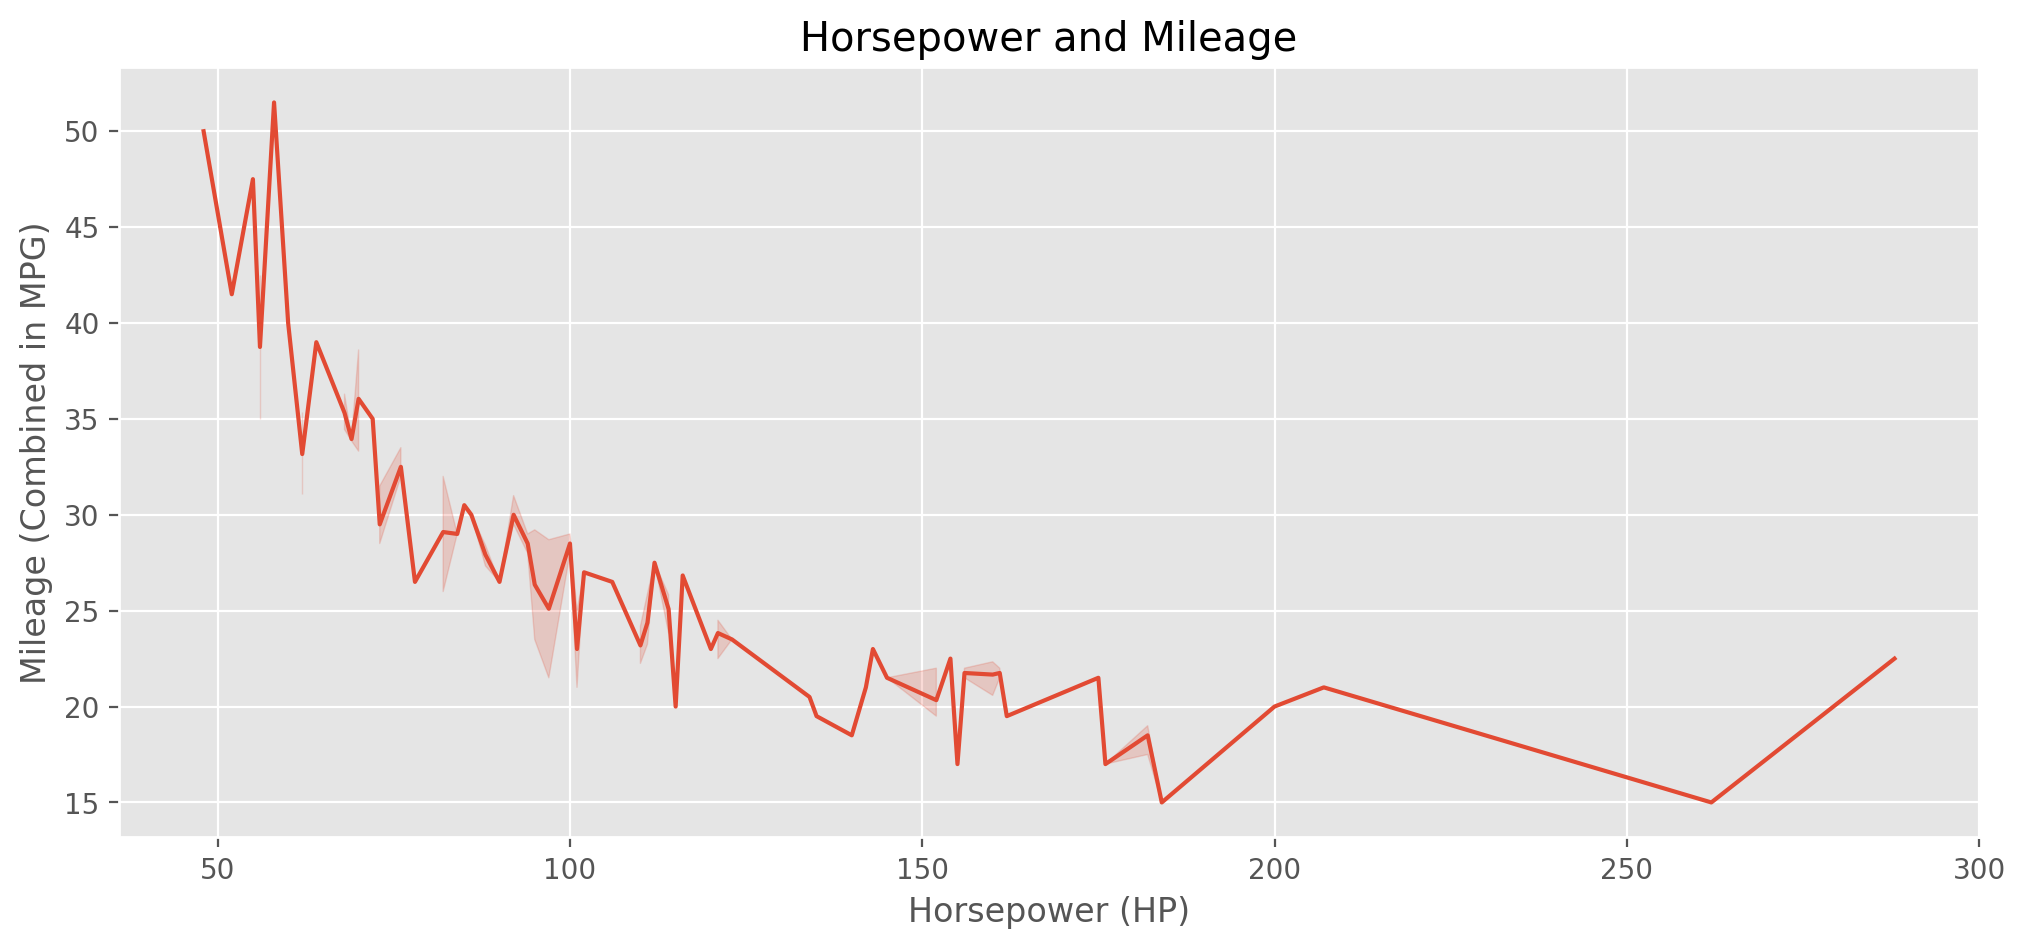

In [13]:
plt.figure(figsize = (12,5), dpi = 200)
sns.lineplot(data = auto,x = 'horsepower', y= 'comb_mpg')

plt.title('Horsepower and Mileage')
plt.xlabel('Horsepower (HP)')
plt.ylabel('Mileage (Combined in MPG)')

---
---

## lineplot
- Creates a linechart
- Used in case of two numerical features

<Axes: xlabel='horsepower', ylabel='comb_mpg'>

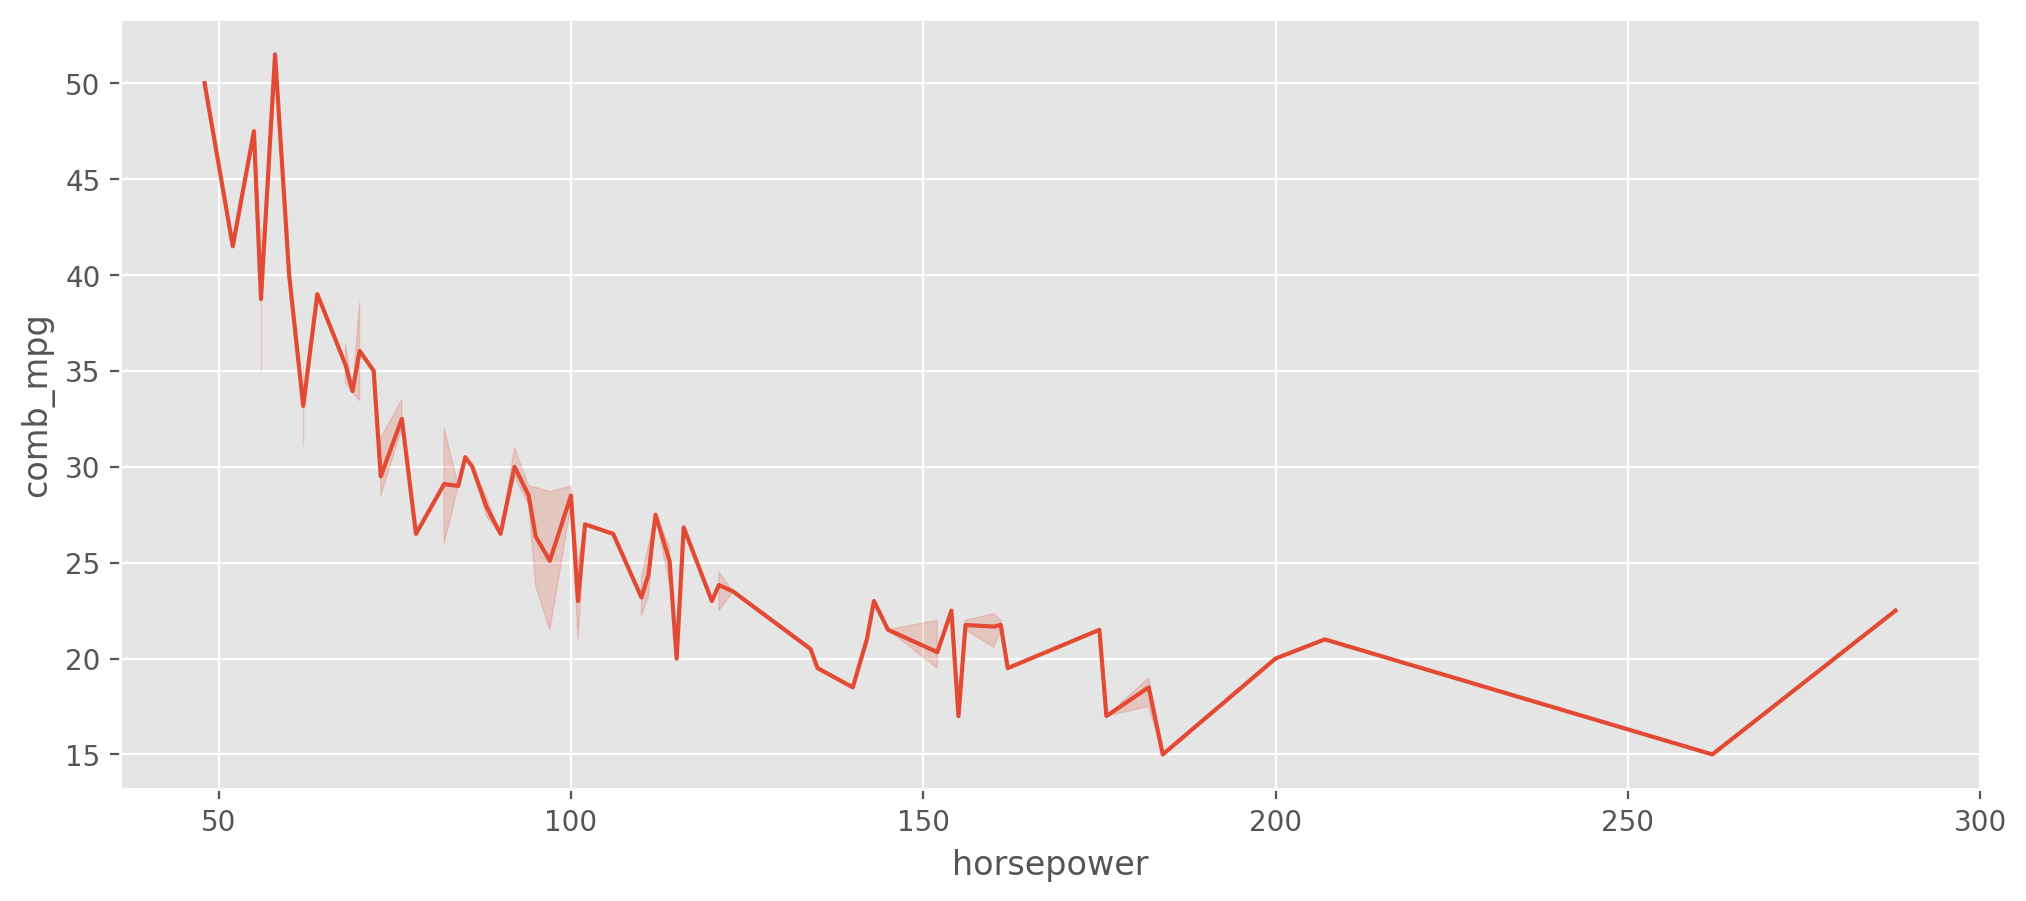

In [14]:
plt.figure(figsize = (12,5), dpi = 200)
sns.lineplot(x = 'horsepower', y = 'comb_mpg', data = auto)

<Axes: xlabel='curb-weight', ylabel='comb_mpg'>

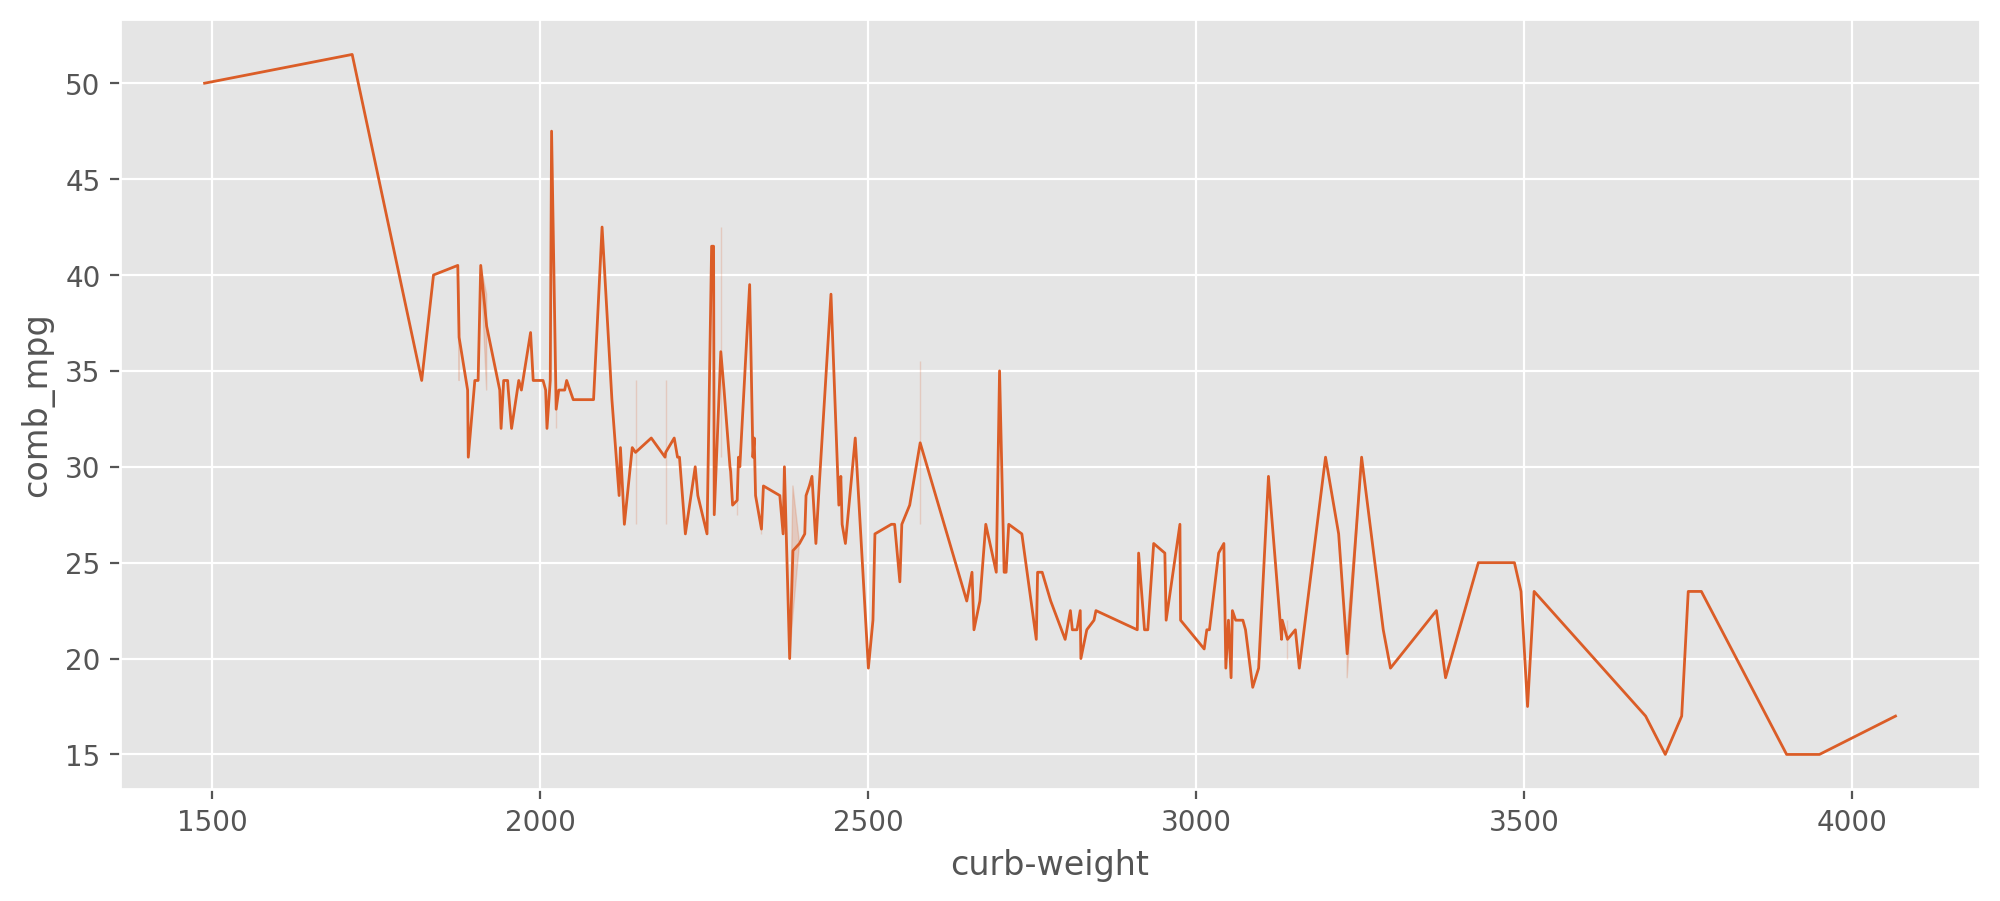

In [15]:
plt.figure(figsize = (12,5), dpi = 200)
sns.lineplot(x = 'curb-weight', y = 'comb_mpg', data = auto, linewidth = 1, color = '#db5d27')

<Axes: xlabel='curb-weight', ylabel='comb_mpg'>

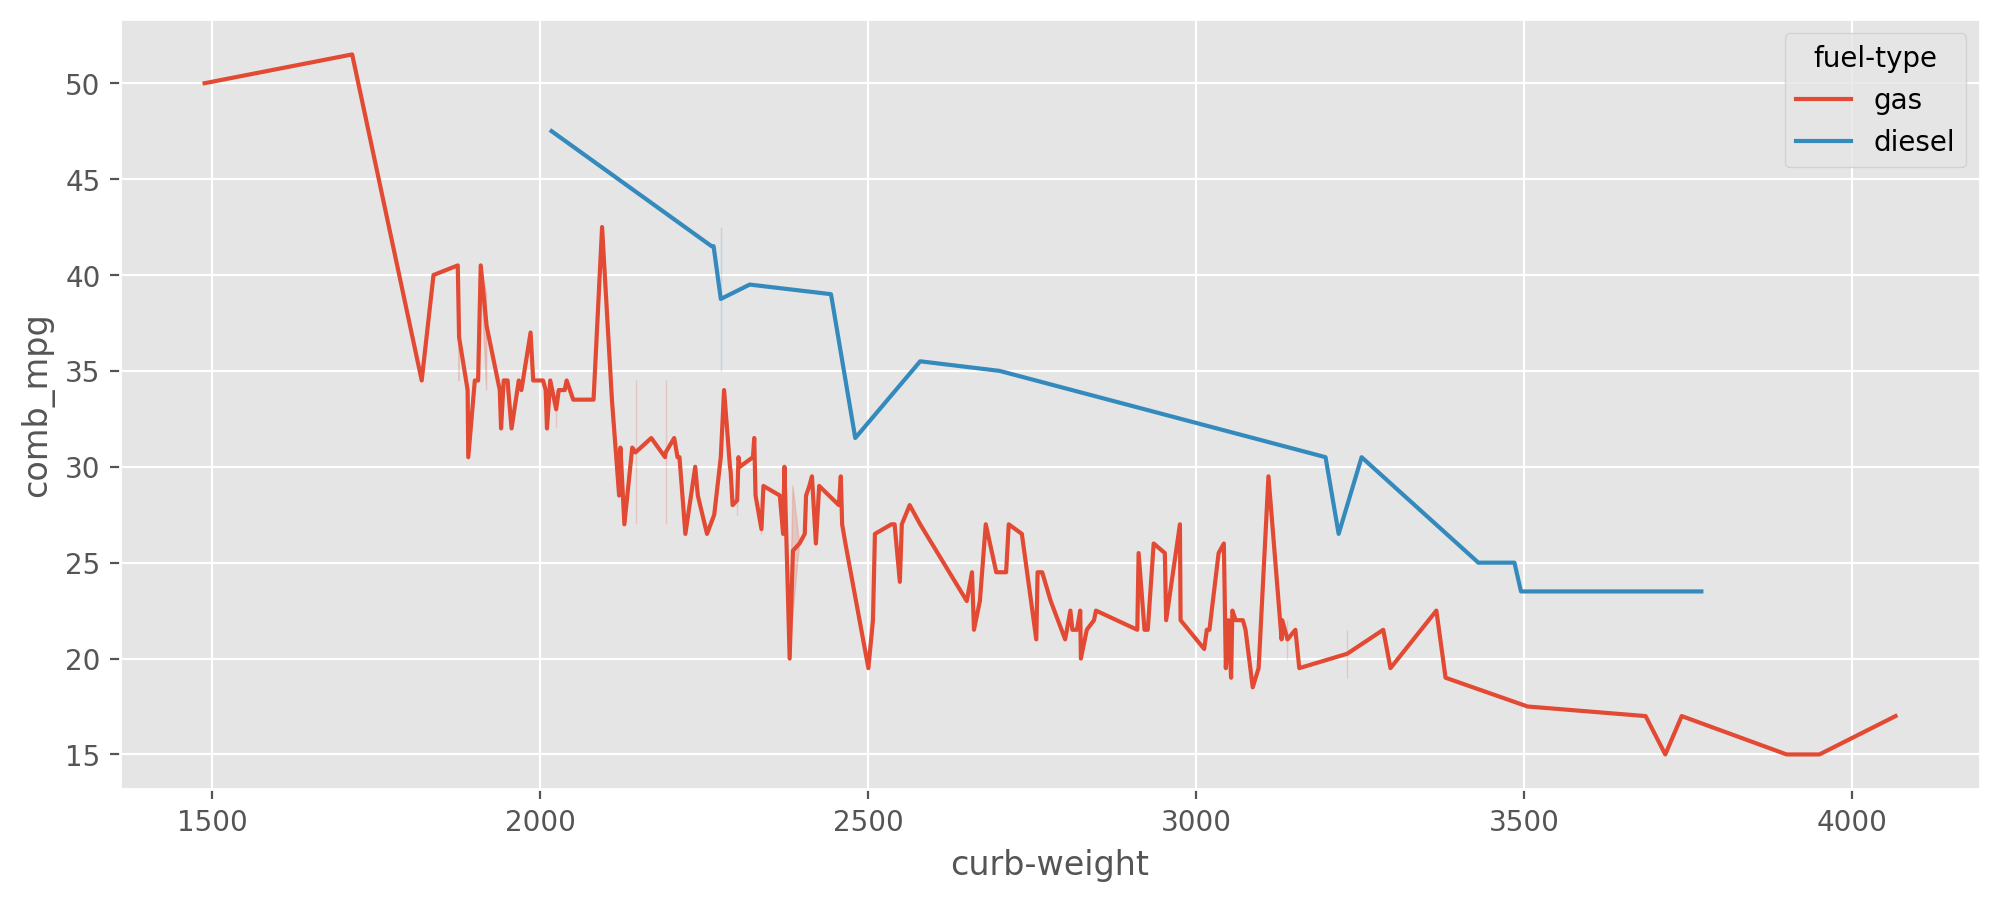

In [16]:
plt.figure(figsize = (12,5), dpi = 200)
sns.lineplot(x='curb-weight', y = 'comb_mpg', data = auto, hue = 'fuel-type')  # hue : separate categories based on color

In [17]:
sns.lineplot?

<Axes: xlabel='curb-weight', ylabel='comb_mpg'>

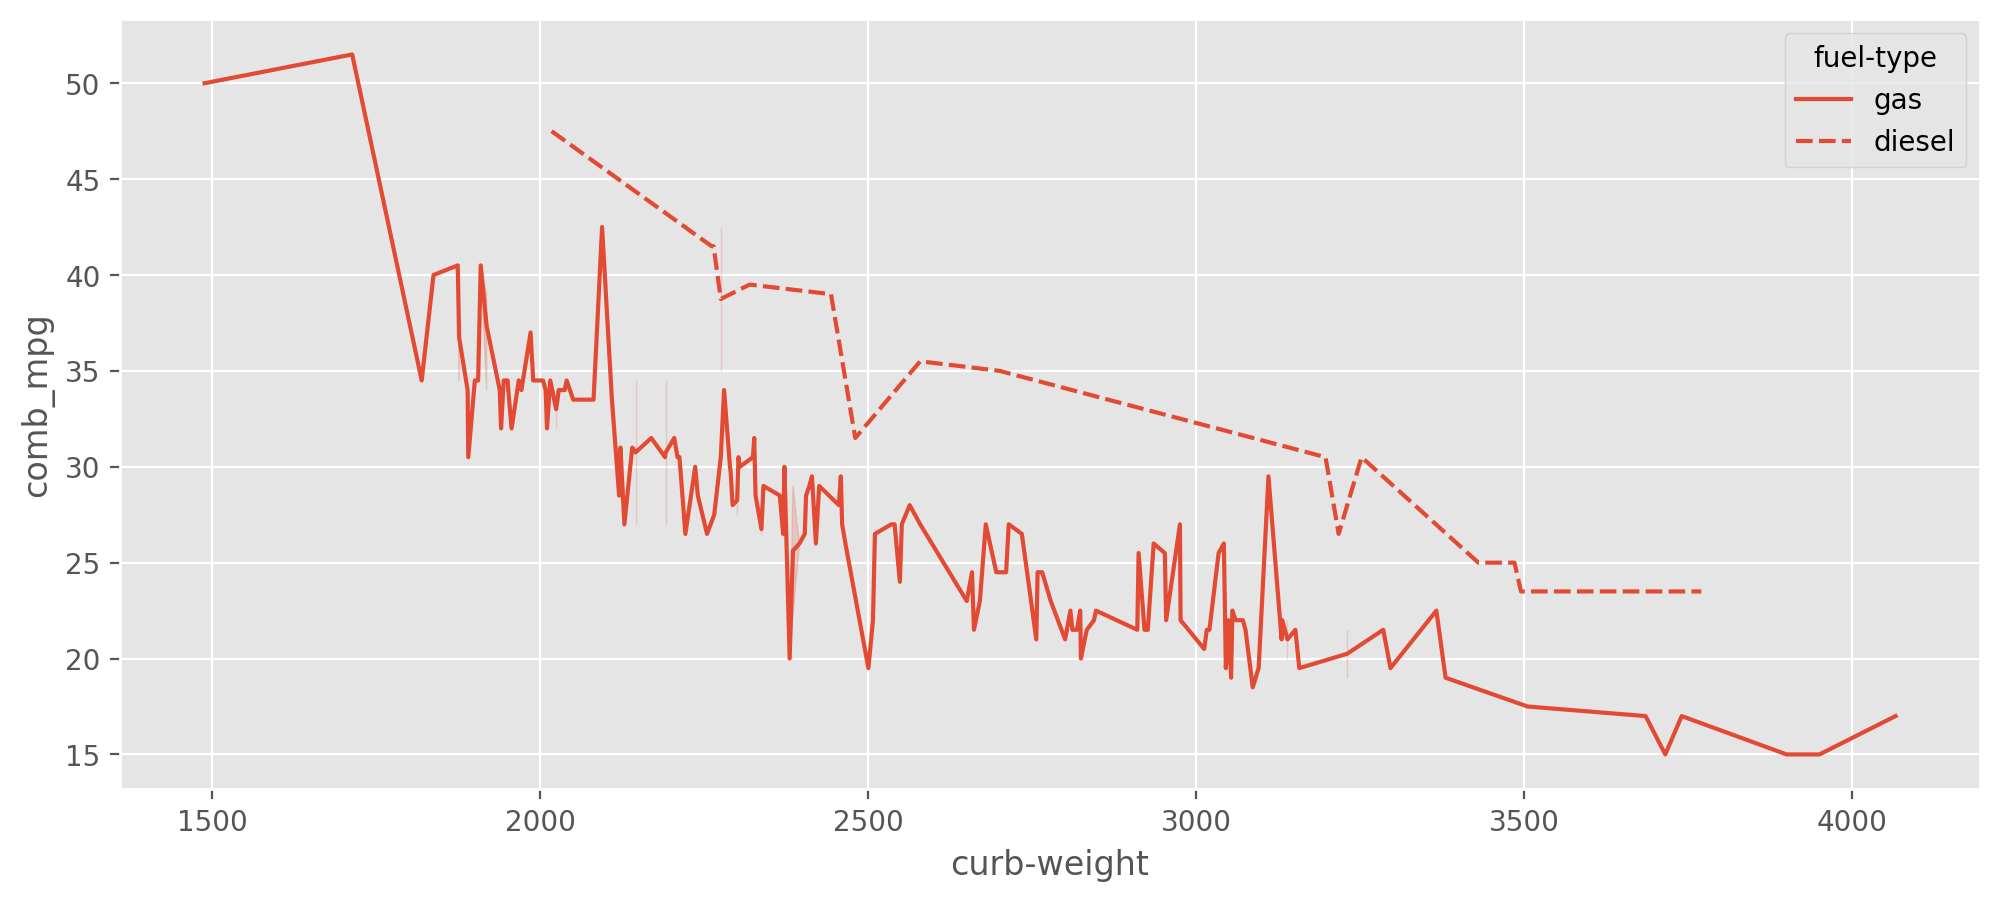

In [18]:
plt.figure(figsize = (12,5), dpi = 200)
sns.lineplot(x = 'curb-weight', y = 'comb_mpg', data = auto, style = 'fuel-type')  # style : separate categories based on style/pattern

<Axes: xlabel='curb-weight', ylabel='comb_mpg'>

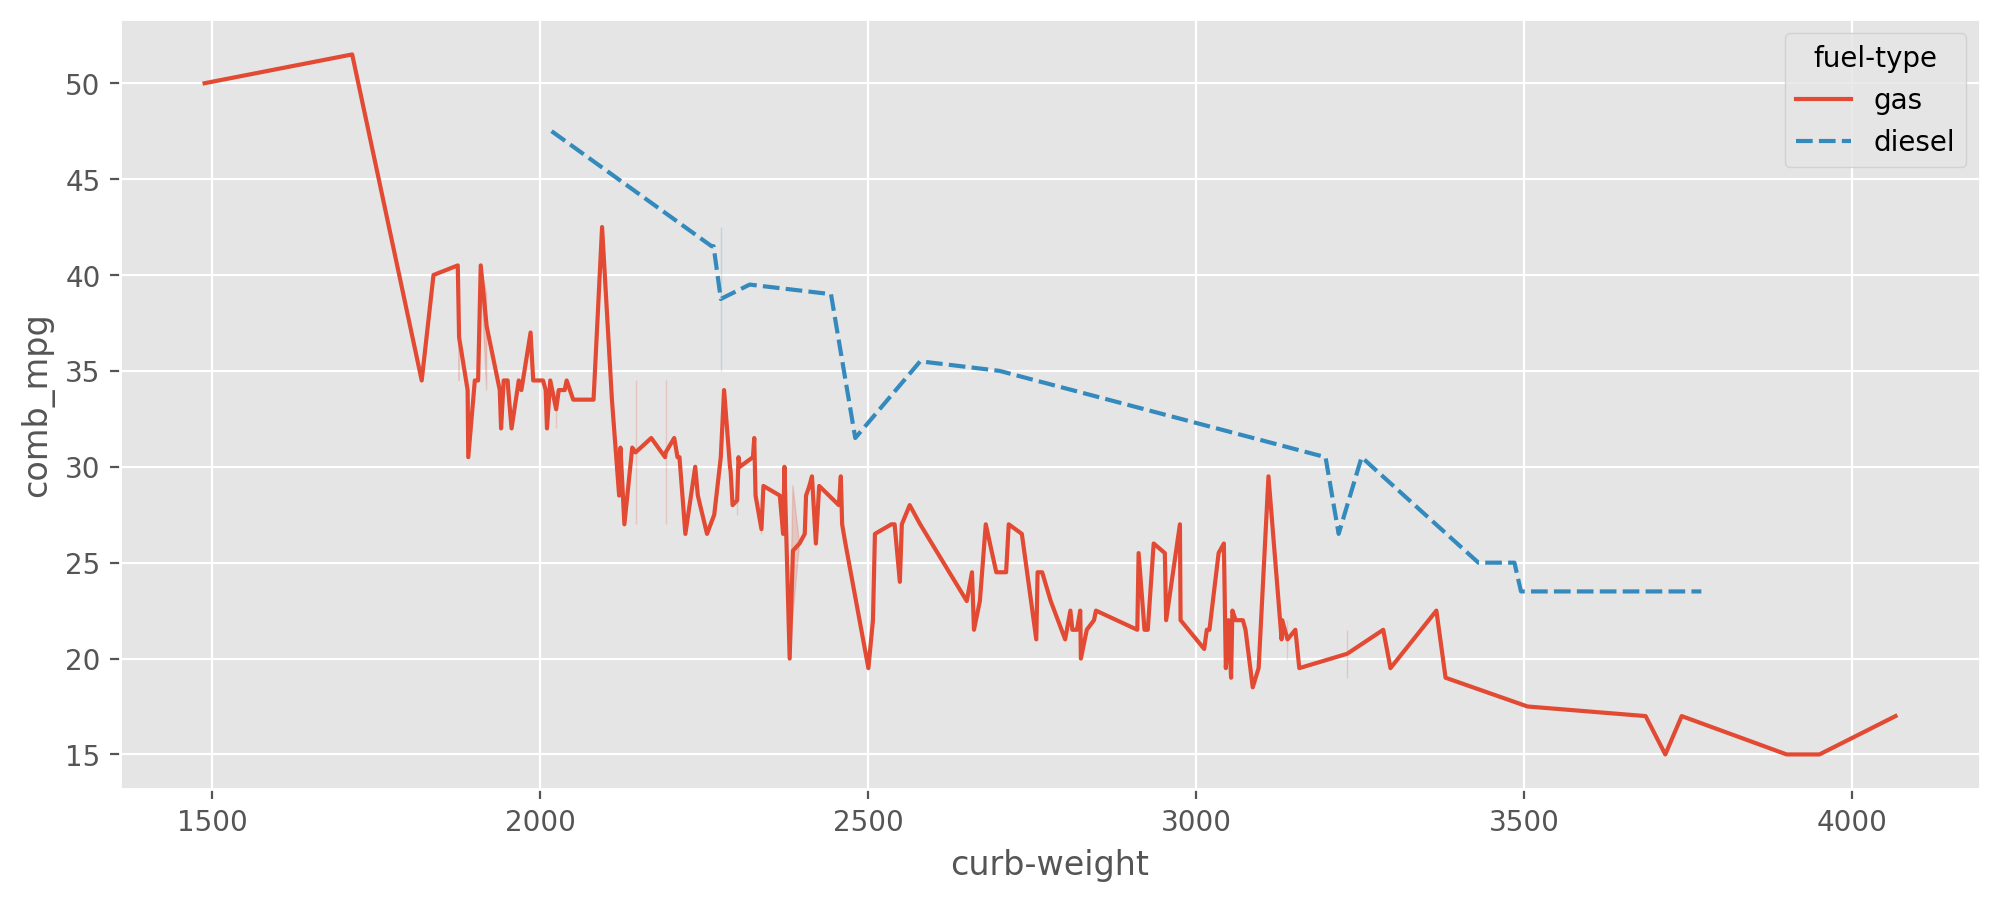

In [19]:
plt.figure(figsize = (12,5), dpi = 200)
sns.lineplot(x = 'curb-weight', y = 'comb_mpg', data = auto, hue = 'fuel-type', style = 'fuel-type')

<Axes: xlabel='curb-weight', ylabel='comb_mpg'>

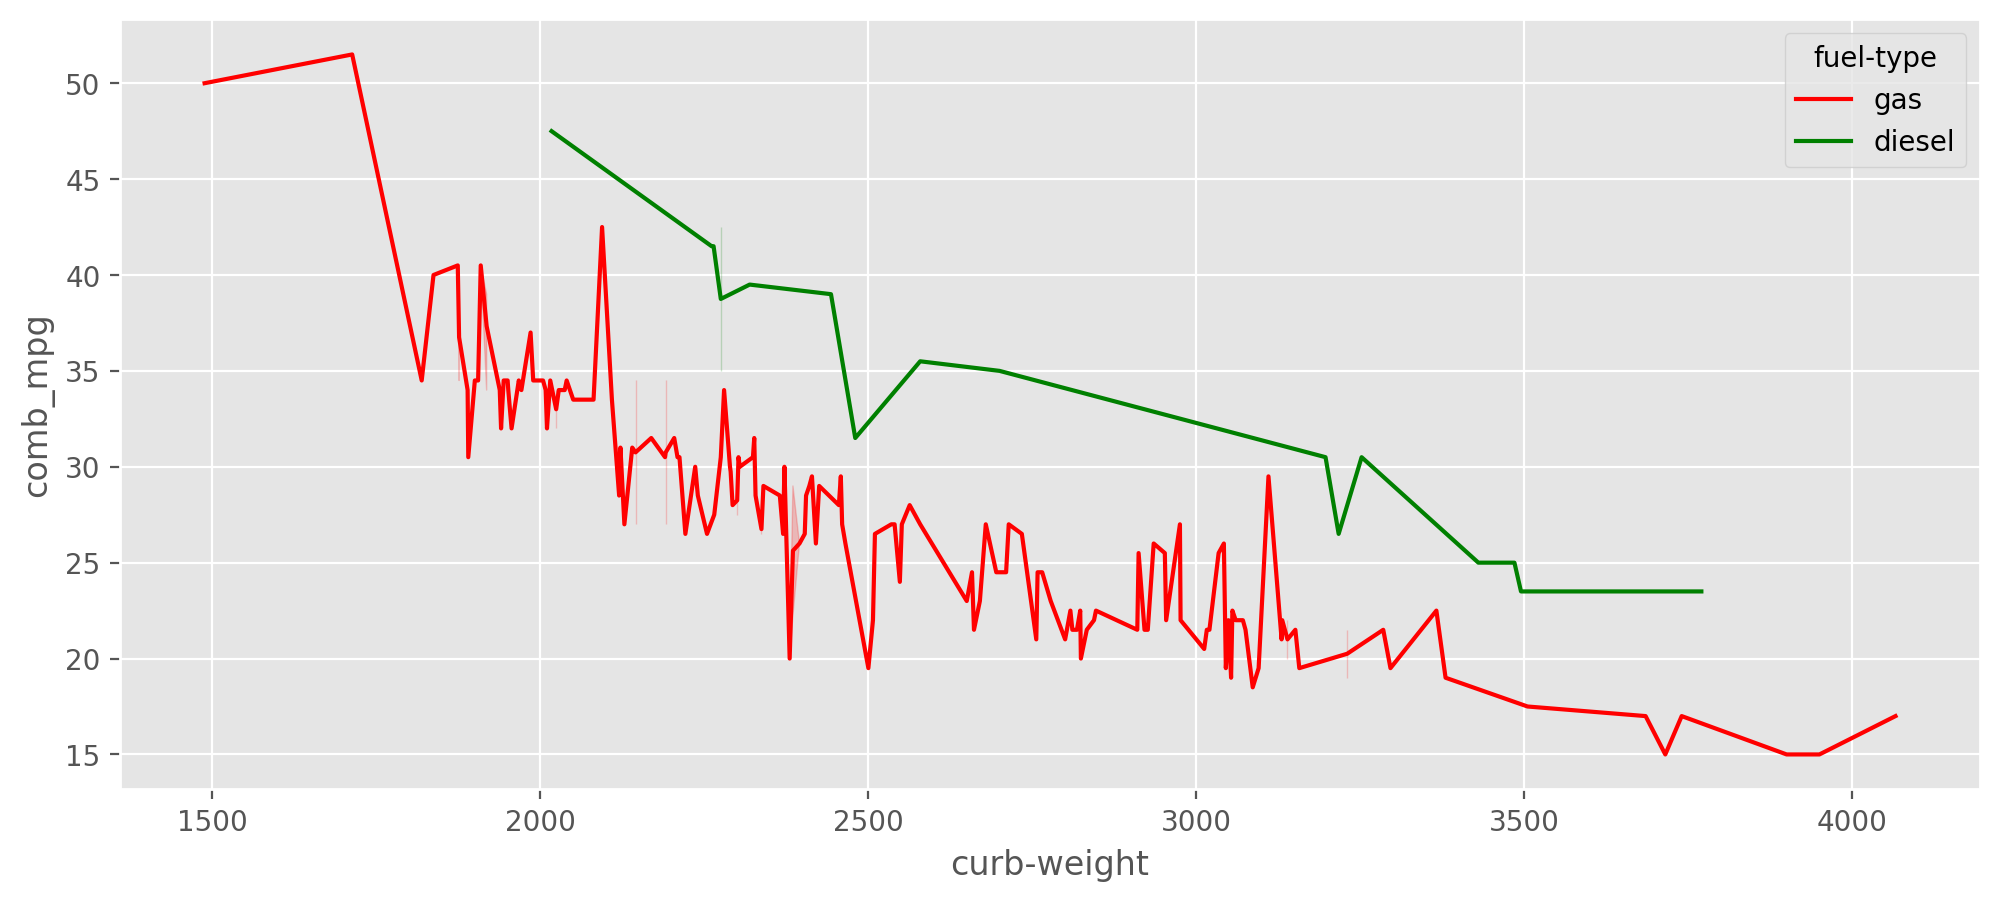

In [20]:
plt.figure(figsize = (12,5), dpi = 200)
sns.lineplot(x = 'curb-weight', y = 'comb_mpg', data = auto, hue = 'fuel-type', palette = ['red', 'green'])

---
## scatterplot
- Creates a scatterplot
- Used in case of two numerical features

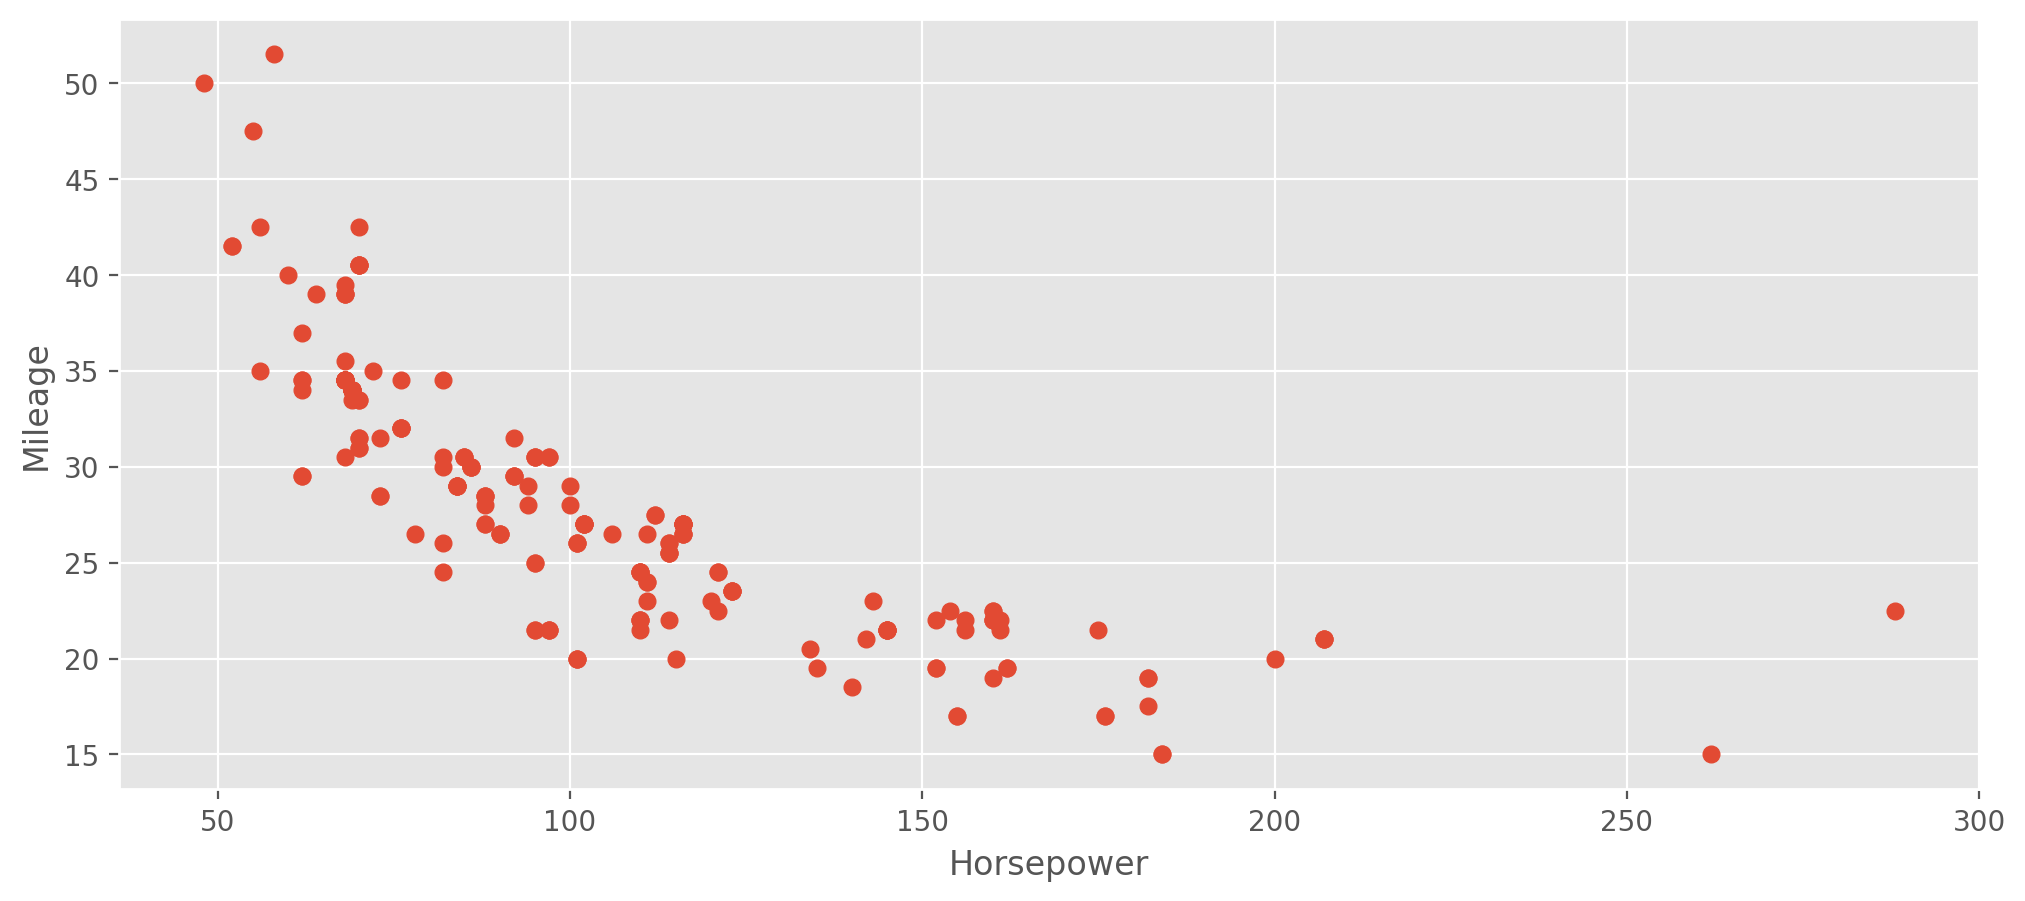

In [21]:
plt.figure(figsize = (12,5), dpi = 200)
plt.scatter(auto['horsepower'], auto['comb_mpg'])
plt.xlabel("Horsepower")
plt.ylabel("Mileage")

plt.show()

<Axes: xlabel='horsepower', ylabel='comb_mpg'>

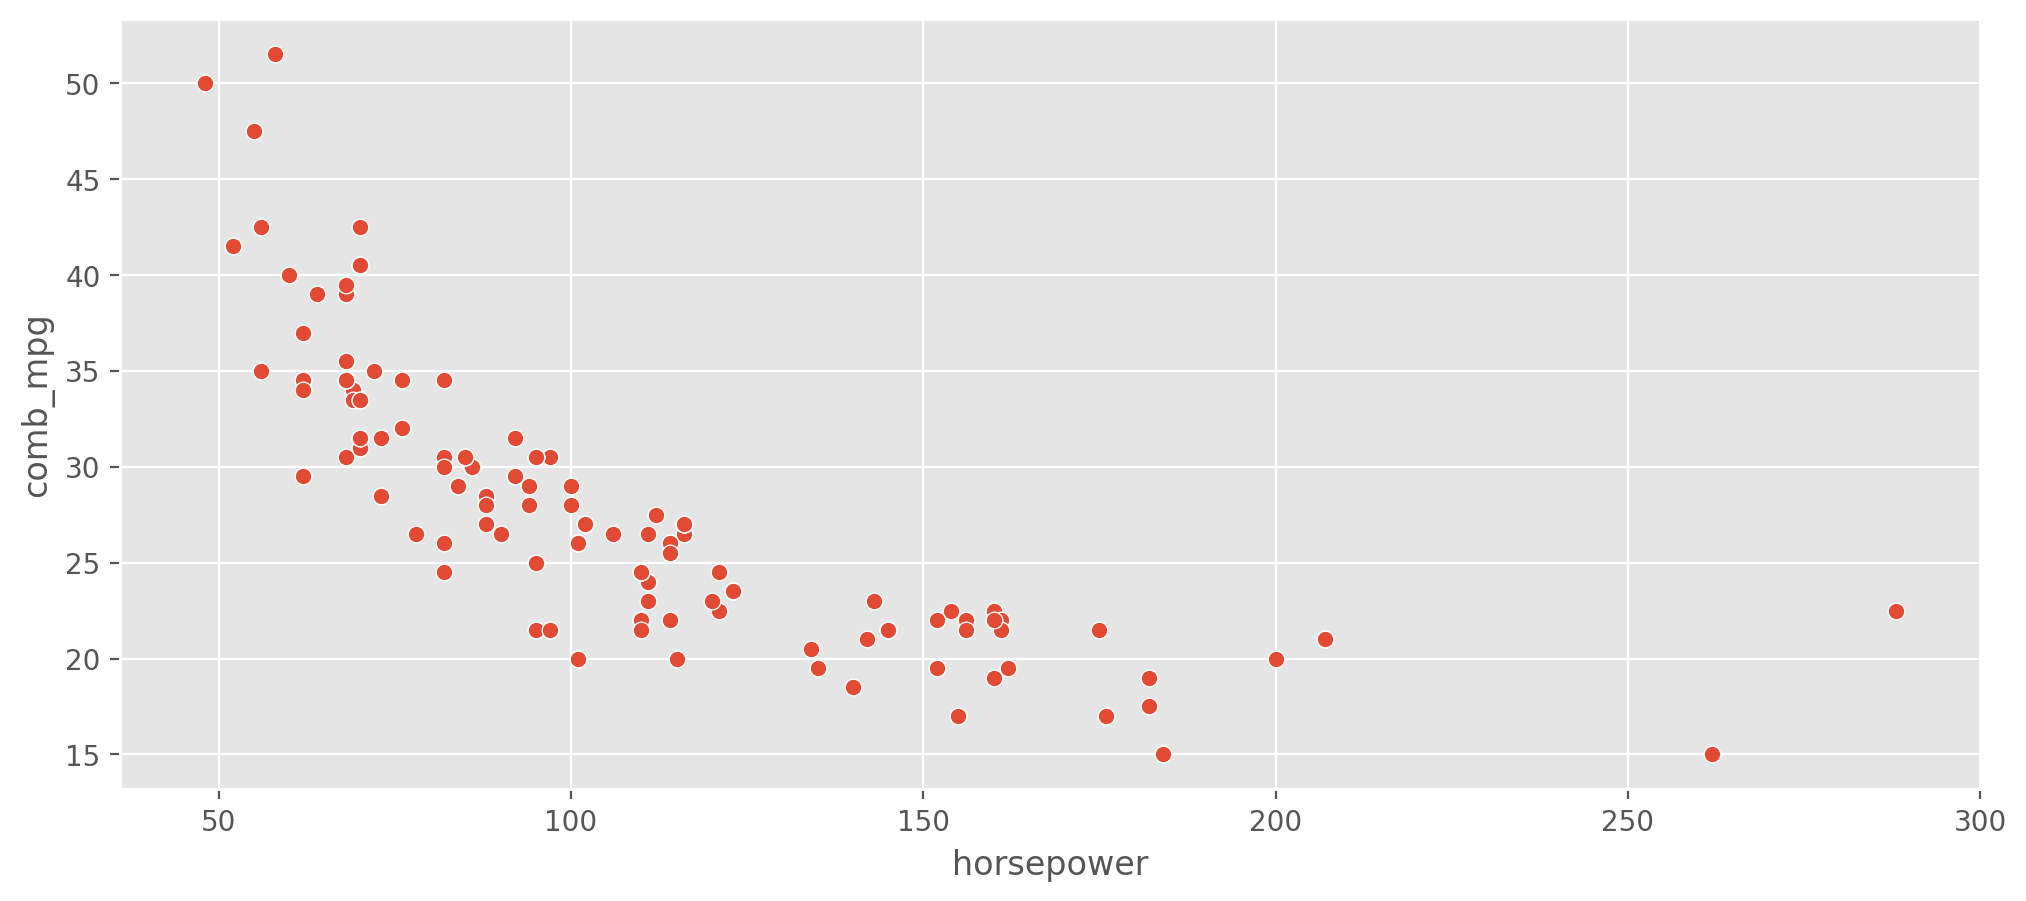

In [22]:
plt.figure(figsize = (12,5), dpi = 200)
sns.scatterplot(x = 'horsepower', y = 'comb_mpg', data = auto)

In [23]:
sns.scatterplot?

In [24]:
auto.head(2)

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3               NaN  alfa-romero       gas        std          two   
1          3               NaN  alfa-romero       gas        std          two   

    body-style drive-wheels engine-location  wheel-base  ...  fuel-system  \
0  convertible          rwd           front        88.6  ...         mpfi   
1  convertible          rwd           front        88.6  ...         mpfi   

   bore  stroke  compression-ratio horsepower peak-rpm  city-mpg highway-mpg  \
0  3.47    2.68                9.0      111.0   5000.0        21          27   
1  3.47    2.68                9.0      111.0   5000.0        21          27   

     price comb_mpg  
0  13495.0     24.0  
1  16500.0     24.0  

[2 rows x 27 columns]

<Axes: xlabel='horsepower', ylabel='comb_mpg'>

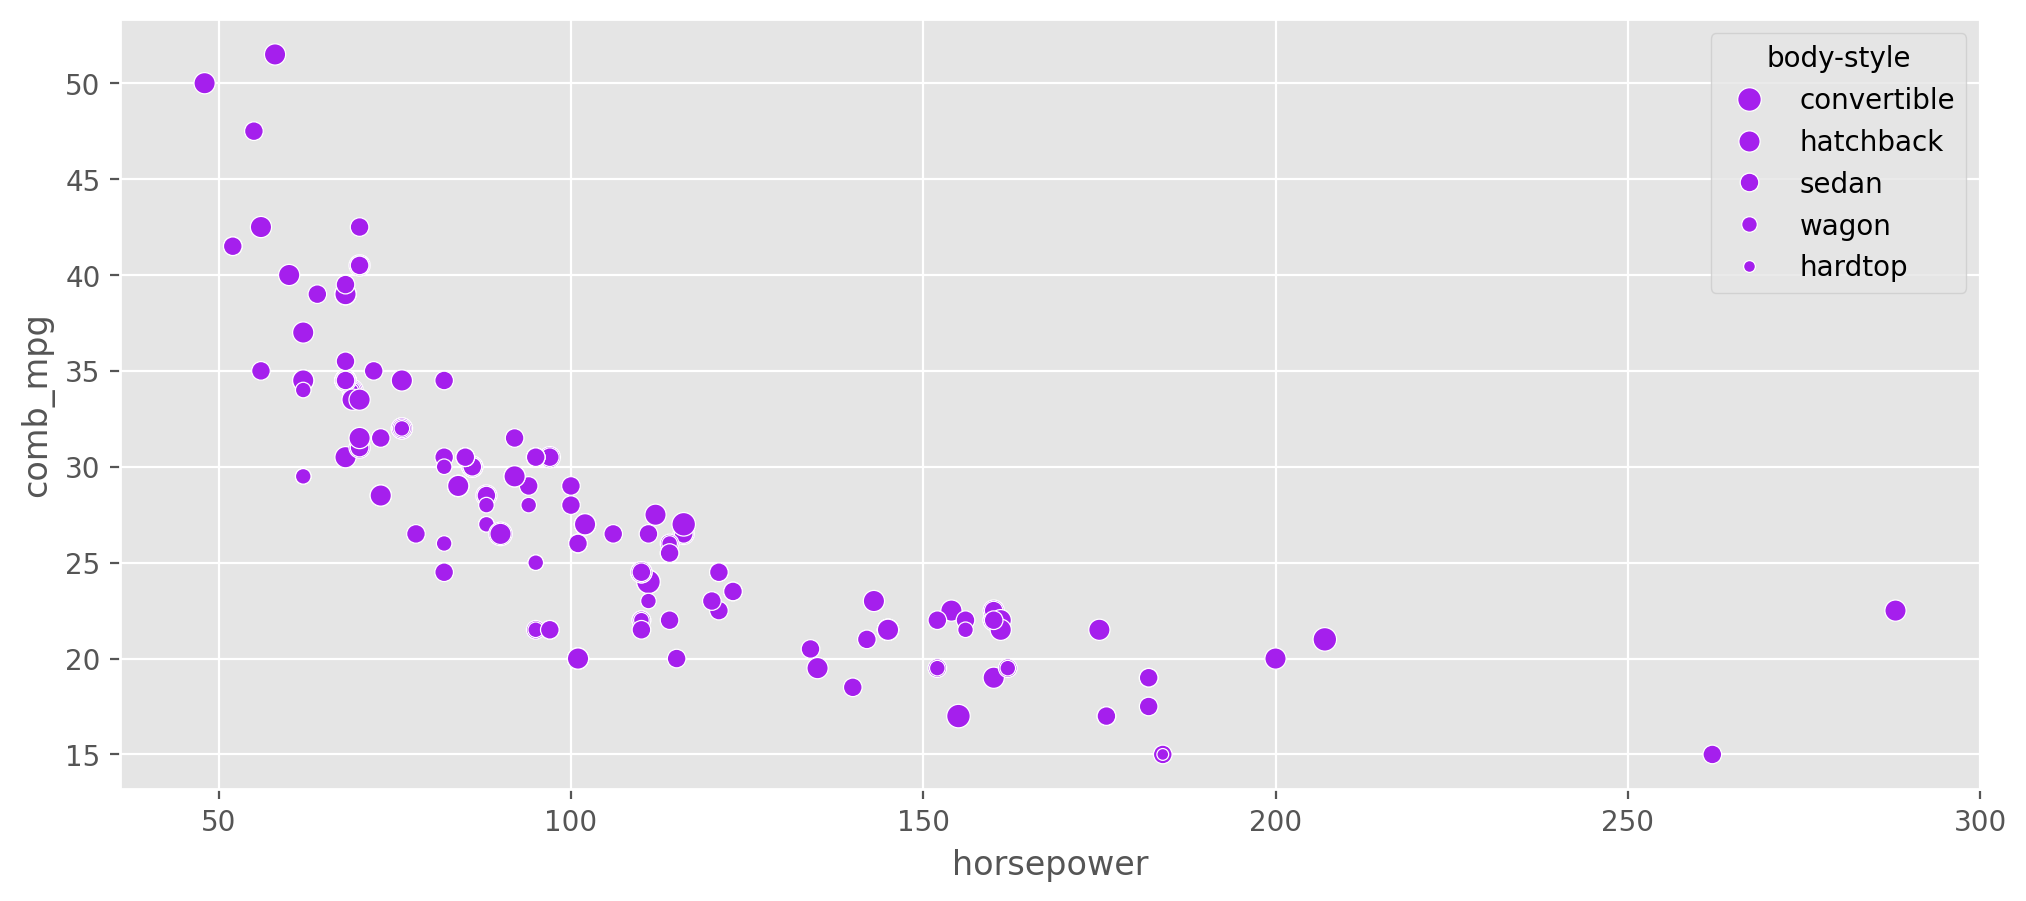

In [25]:
plt.figure(figsize = (12,5), dpi = 200)
sns.scatterplot( data = auto, x = 'horsepower', y = 'comb_mpg', color = '#a51fed', size = 'body-style' )
# sns.scatterplot( data = auto, x = 'horsepower', y = 'comb_mpg', color = '#a51fed', s = 10 )

<Axes: xlabel='horsepower', ylabel='comb_mpg'>

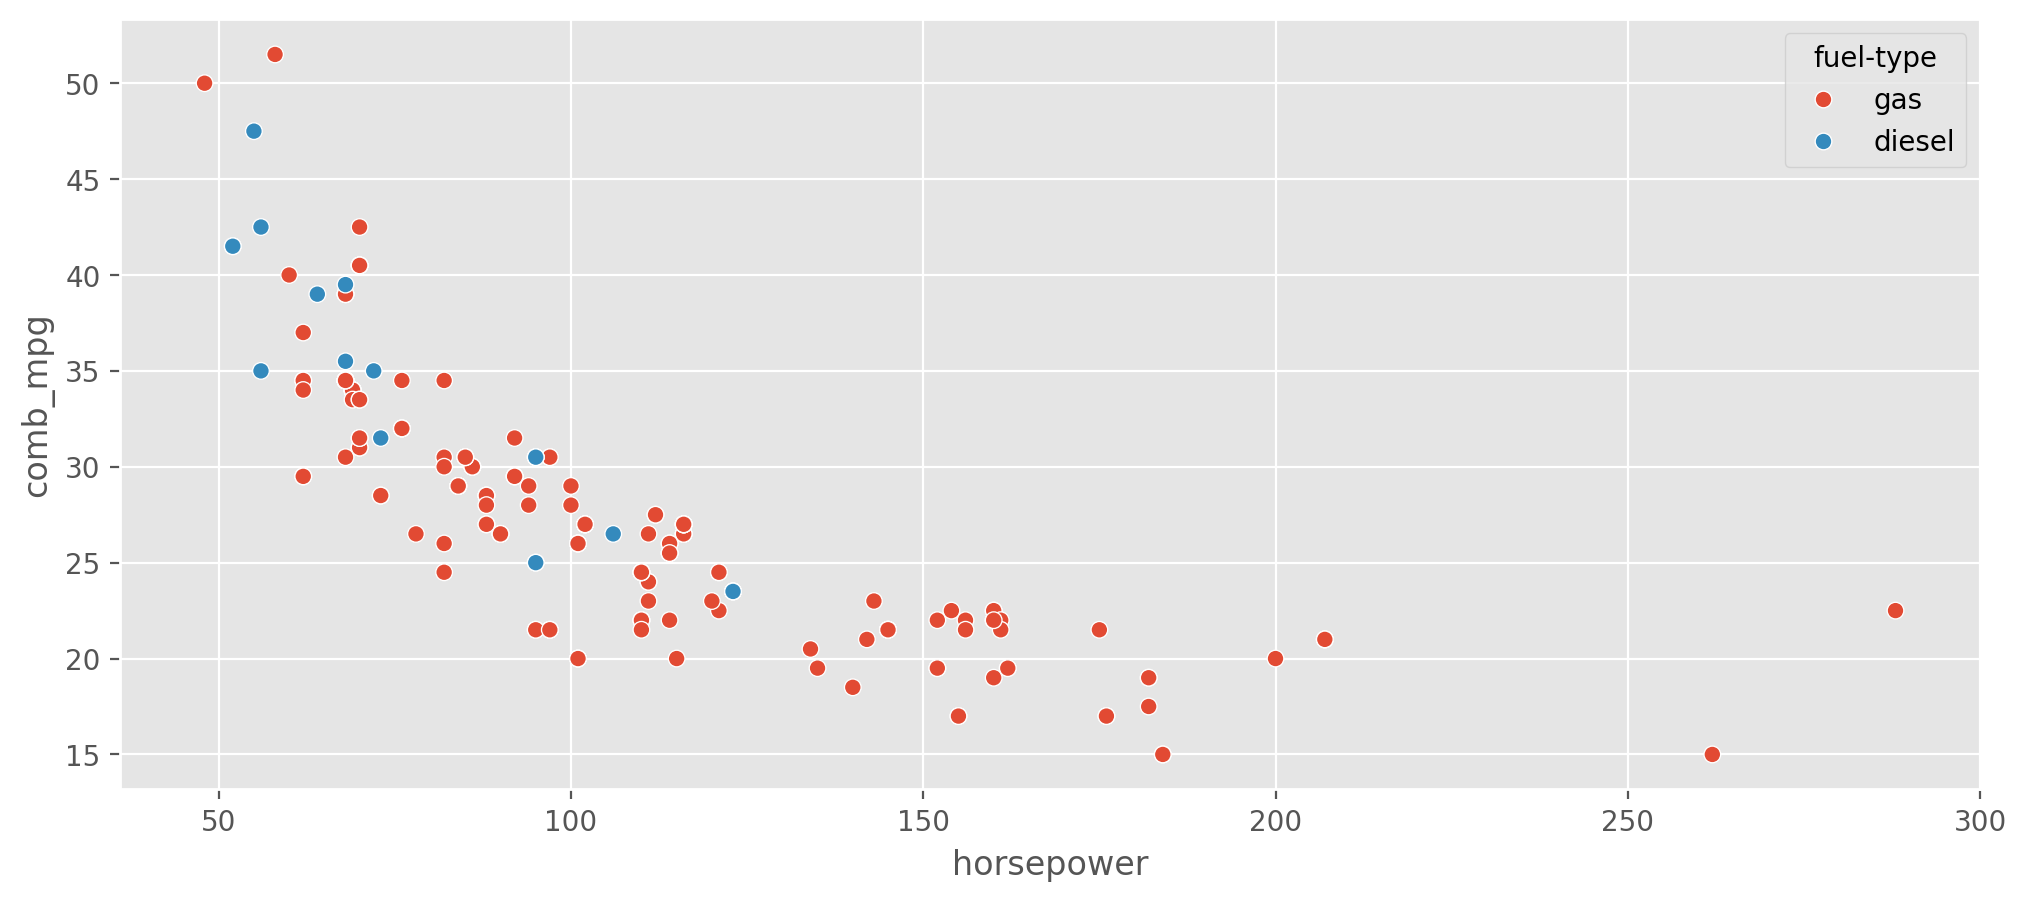

In [26]:
plt.figure(figsize = (12,5), dpi = 200)
sns.scatterplot(x = 'horsepower', y = 'comb_mpg', data = auto, hue = 'fuel-type')

<Axes: xlabel='horsepower', ylabel='comb_mpg'>

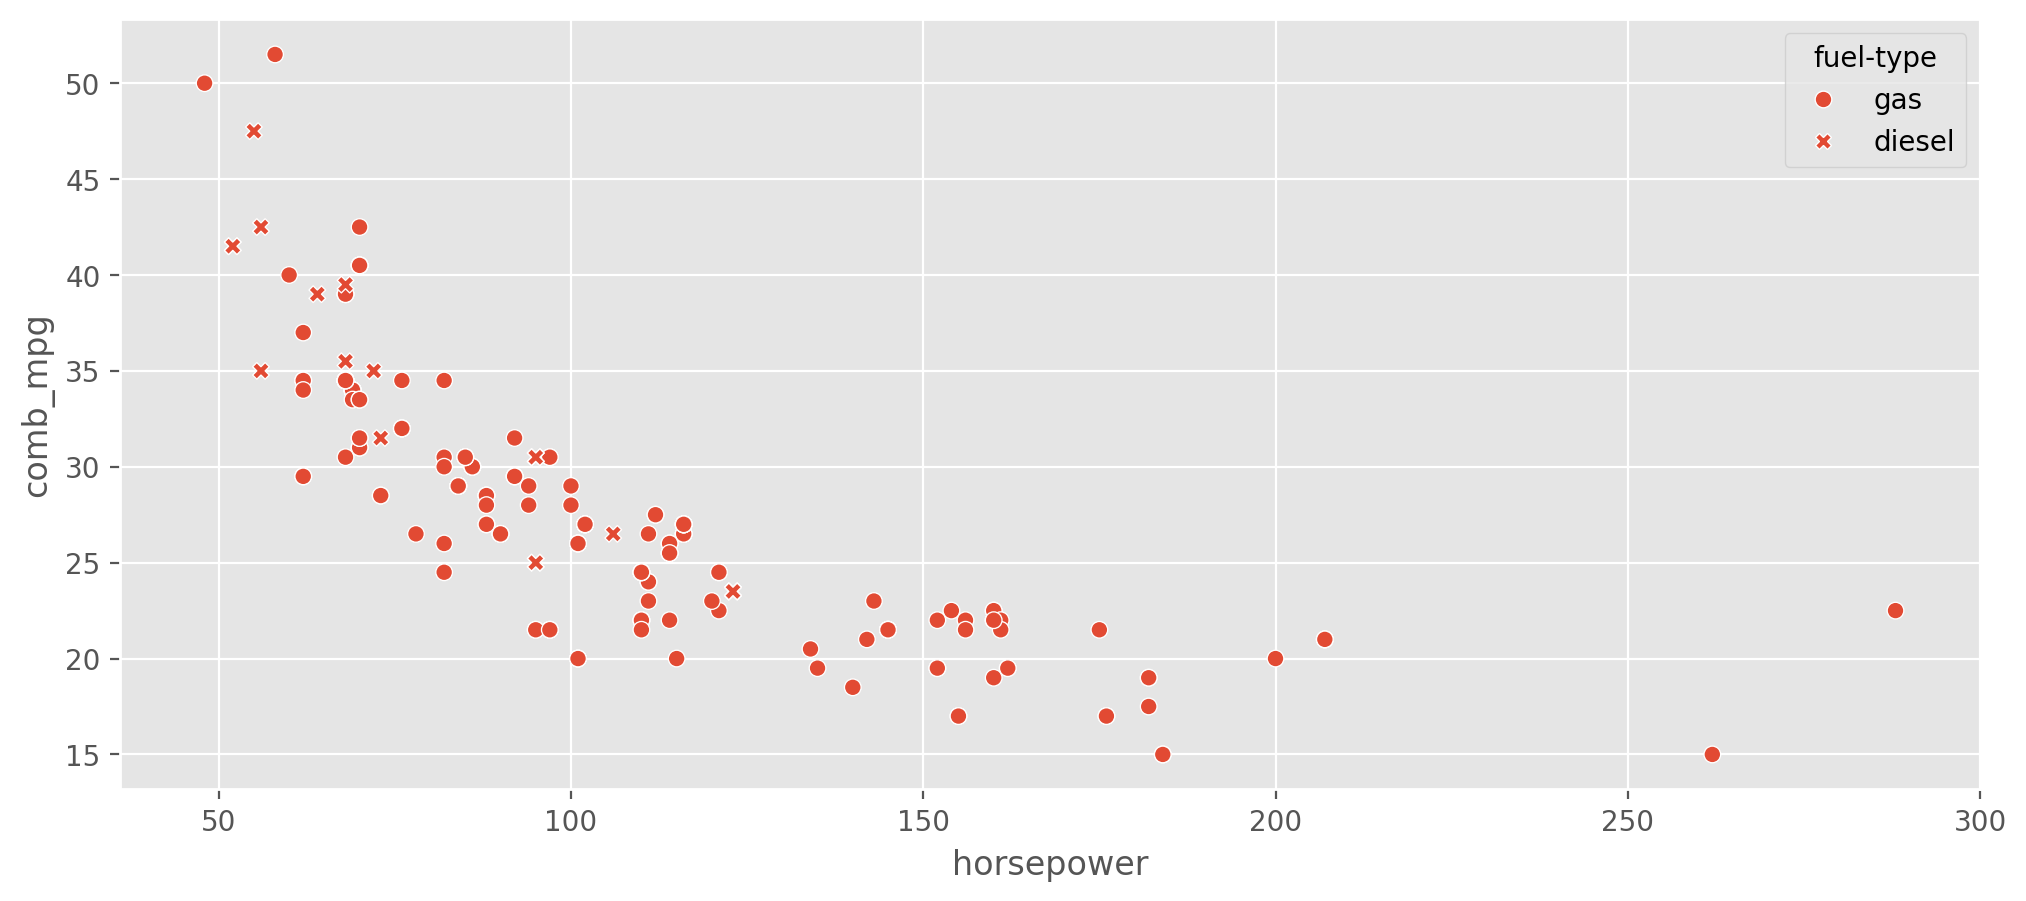

In [27]:
plt.figure(figsize = (12,5), dpi = 200)
sns.scatterplot(x = 'horsepower', y = 'comb_mpg', data = auto, style = 'fuel-type')

<Axes: xlabel='horsepower', ylabel='comb_mpg'>

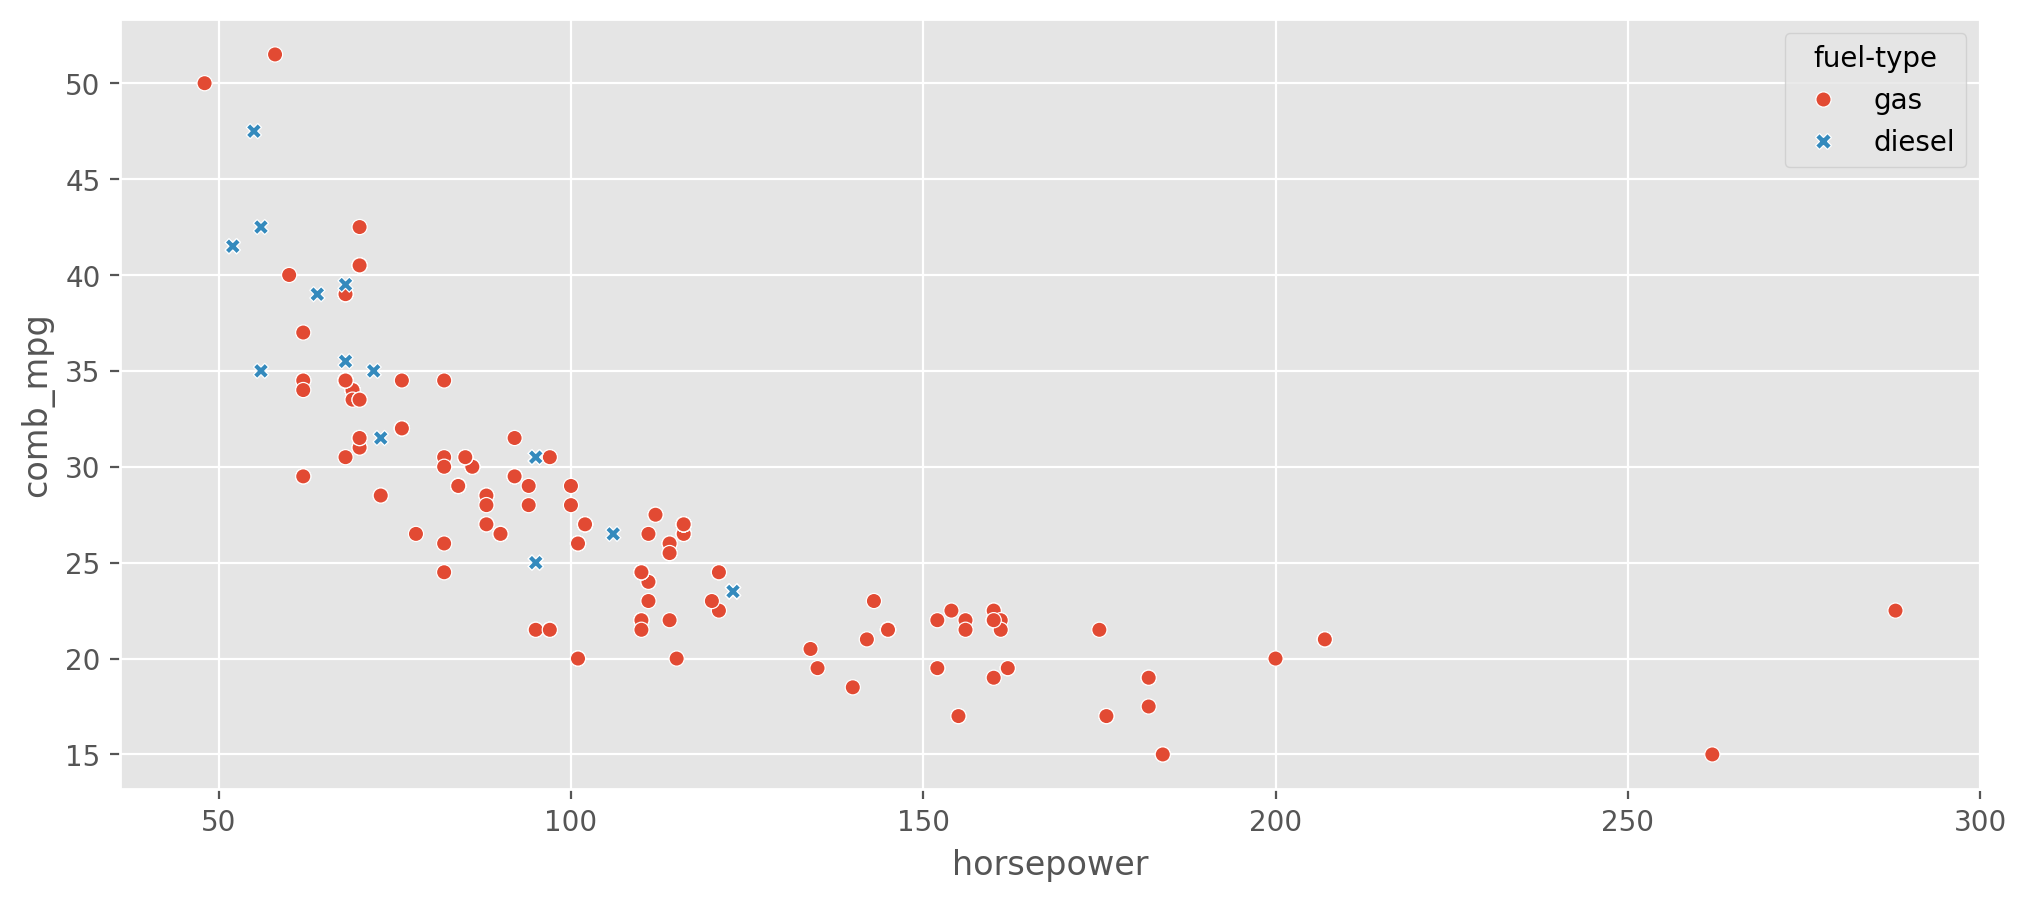

In [28]:
plt.figure(figsize = (12,5), dpi = 200)
sns.scatterplot(x = 'horsepower', y = 'comb_mpg', data = auto, style = 'fuel-type', hue = 'fuel-type', s = 30 )

---
## barplot
- Creates a barchart
- Used in case of categorical-numerical features

<Axes: xlabel='fuel-type', ylabel='comb_mpg'>

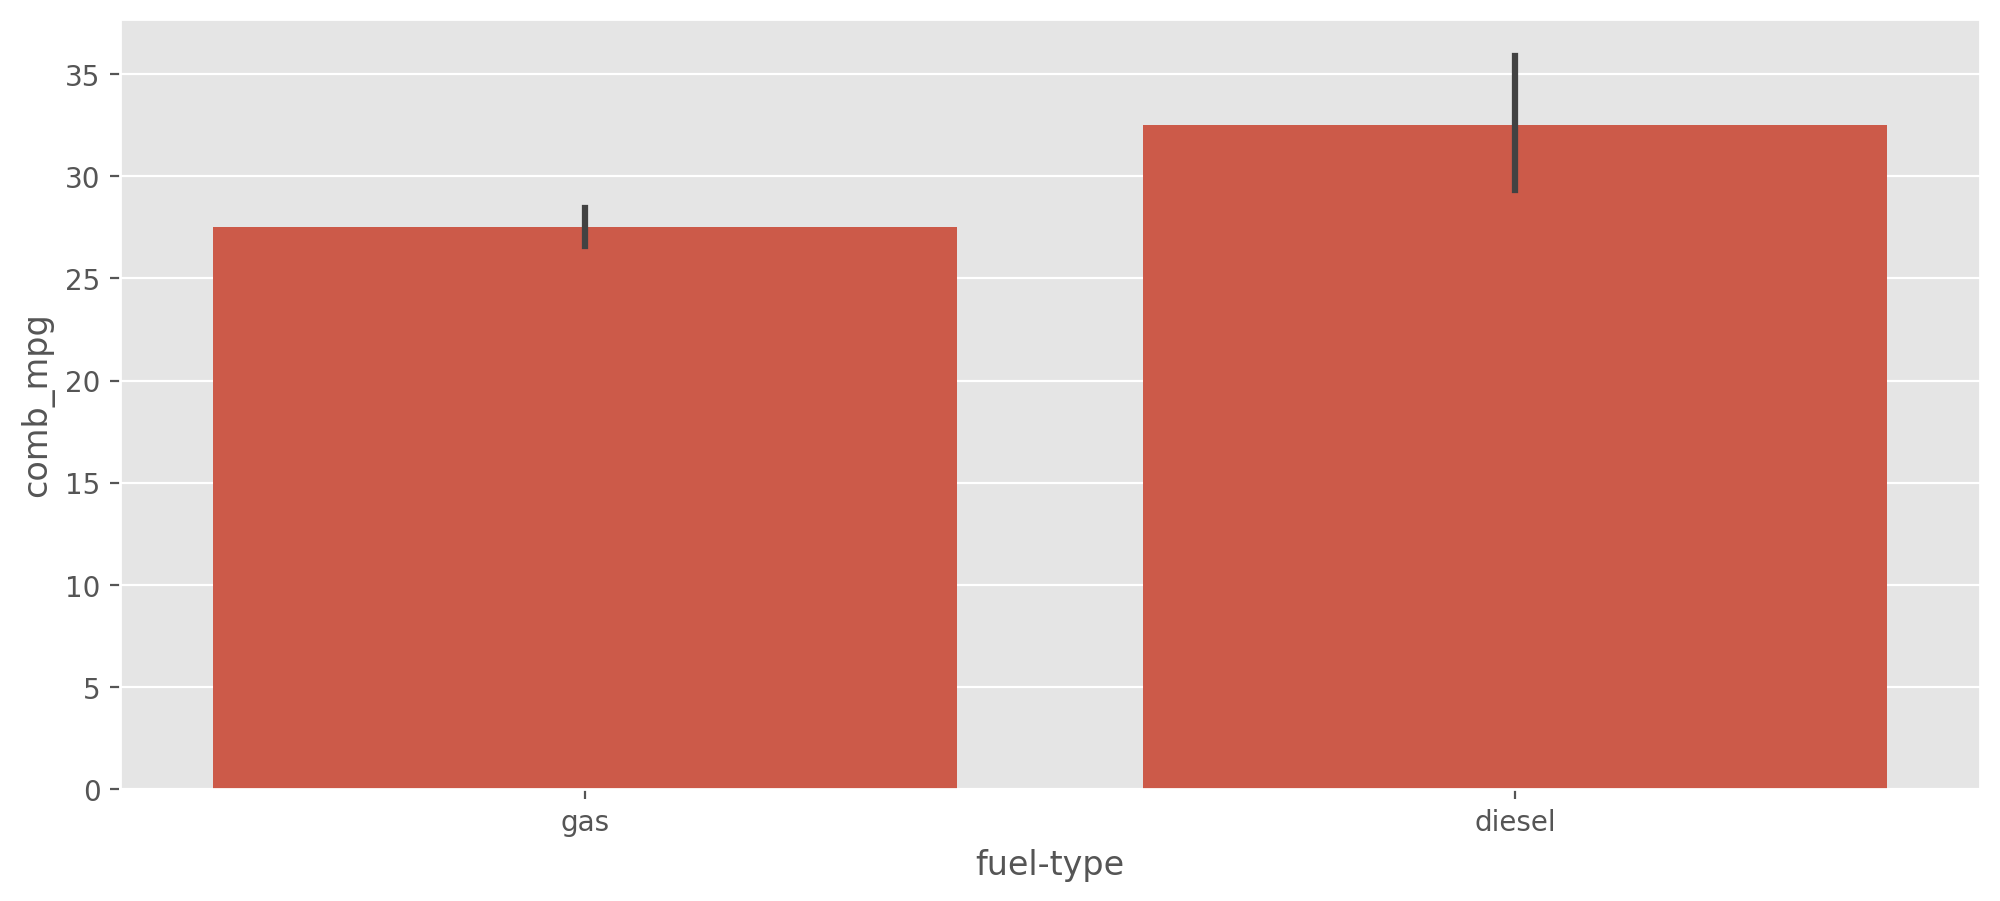

In [29]:
# bar plot provides the average of the mileage for each fuel type we can change the method using estimator to var,std,median
plt.figure(figsize = (12,5), dpi = 200)
sns.barplot(x= 'fuel-type', y = 'comb_mpg', data = auto)

In [30]:
auto.groupby('fuel-type')['comb_mpg'].mean()

fuel-type
diesel    32.525000
gas       27.494595
Name: comb_mpg, dtype: float64

<Axes: xlabel='fuel-type', ylabel='comb_mpg'>

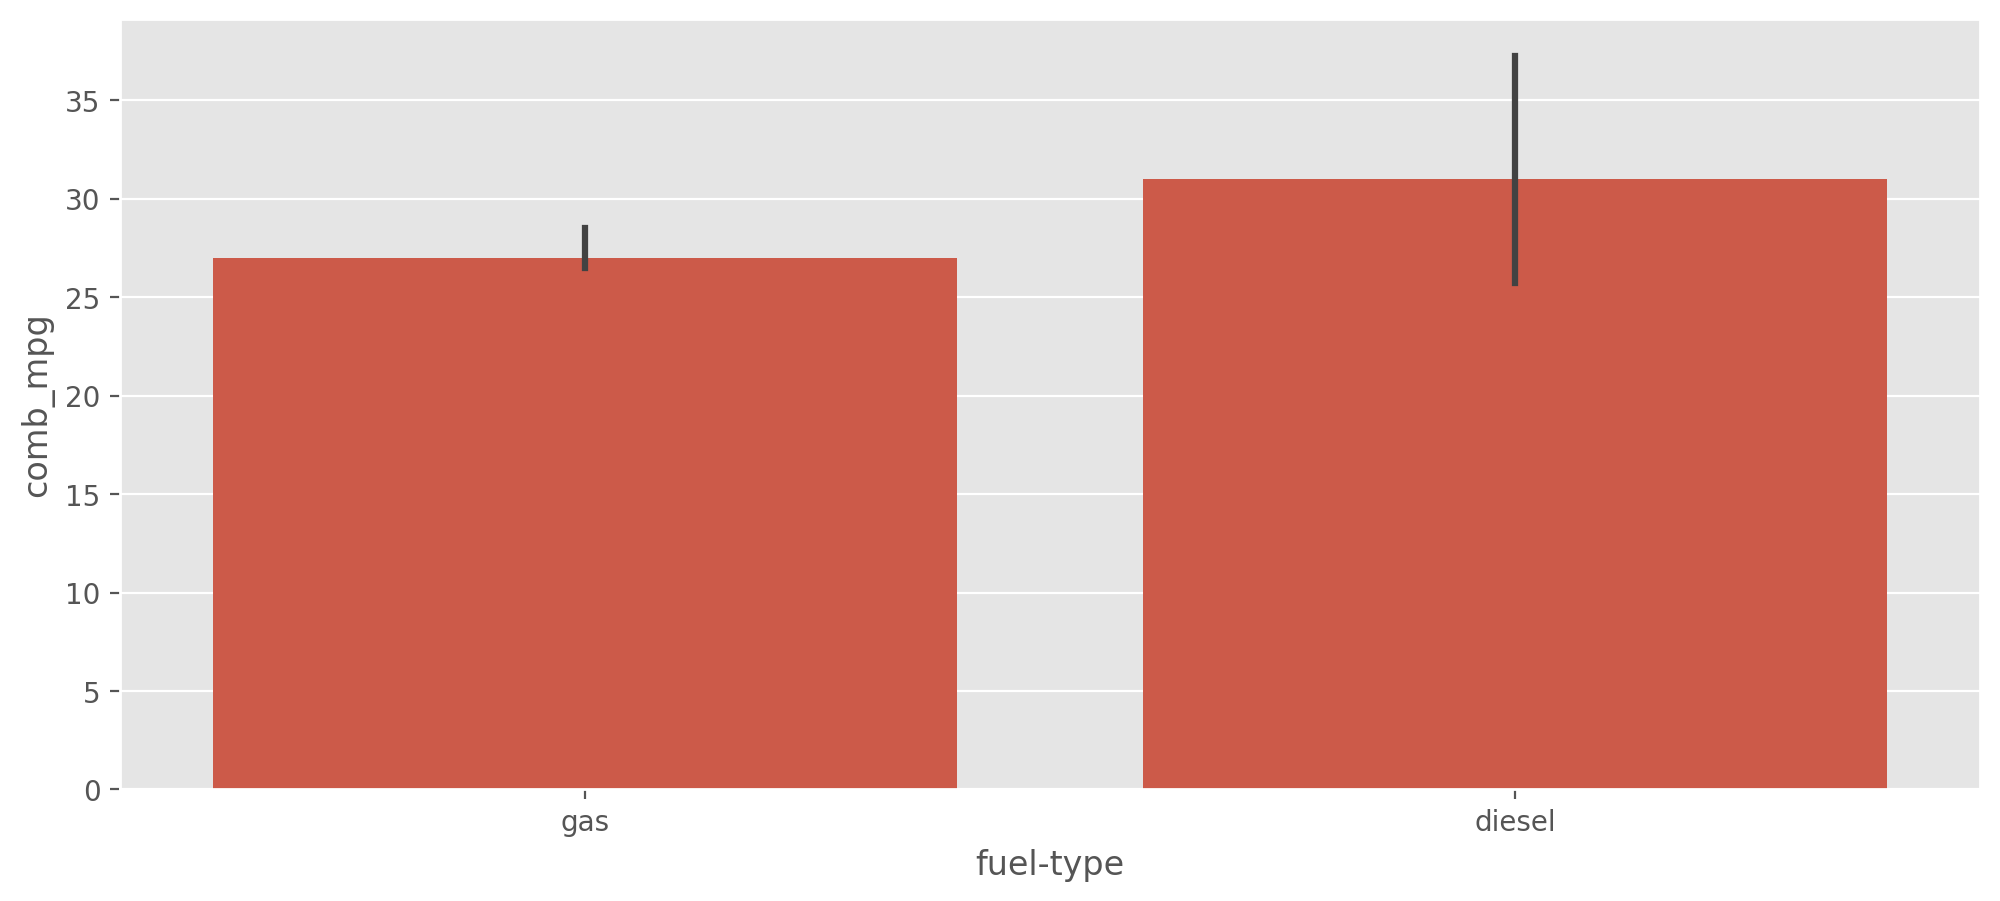

In [31]:
plt.figure(figsize = (12,5), dpi = 200)
sns.barplot(x= 'fuel-type', y = 'comb_mpg', data = auto, estimator='median')

In [32]:
auto.groupby('fuel-type')['comb_mpg'].median()

fuel-type
diesel    31.0
gas       27.0
Name: comb_mpg, dtype: float64

<Axes: xlabel='body-style', ylabel='comb_mpg'>

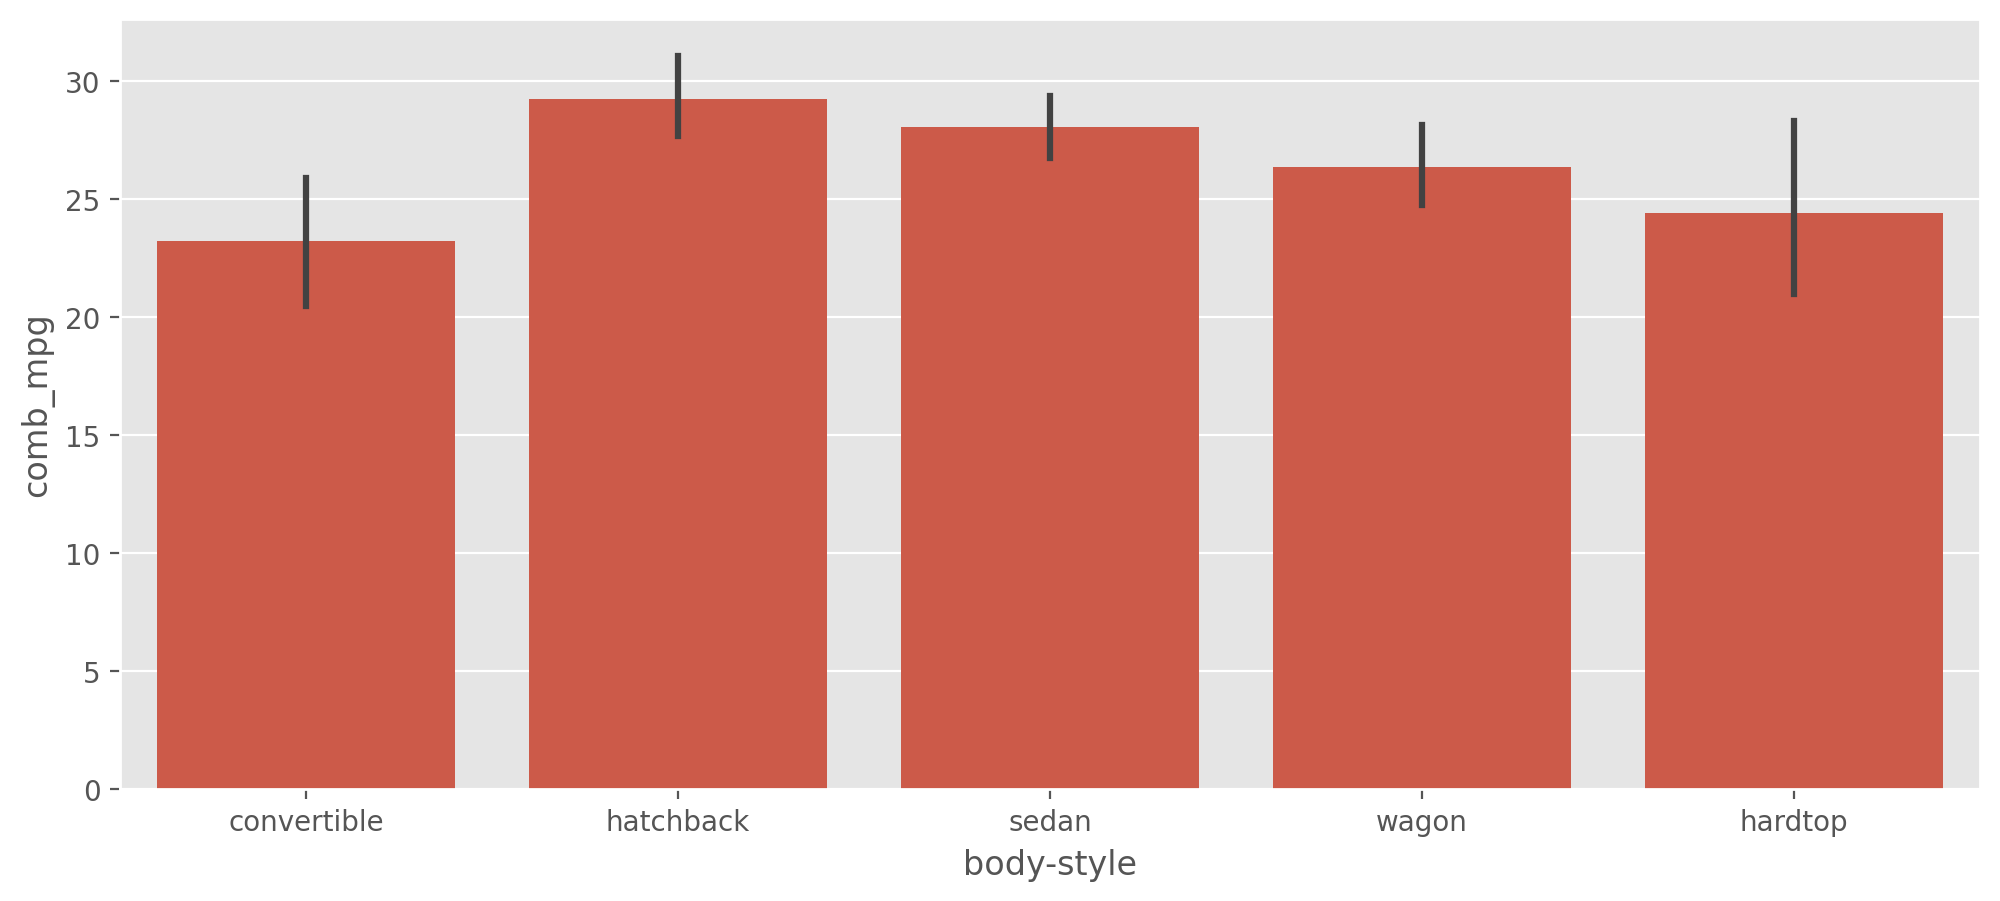

In [33]:
plt.figure(figsize = (12,5), dpi = 200)
sns.barplot(x = 'body-style', y = 'comb_mpg', data = auto)

<Axes: xlabel='body-style', ylabel='comb_mpg'>

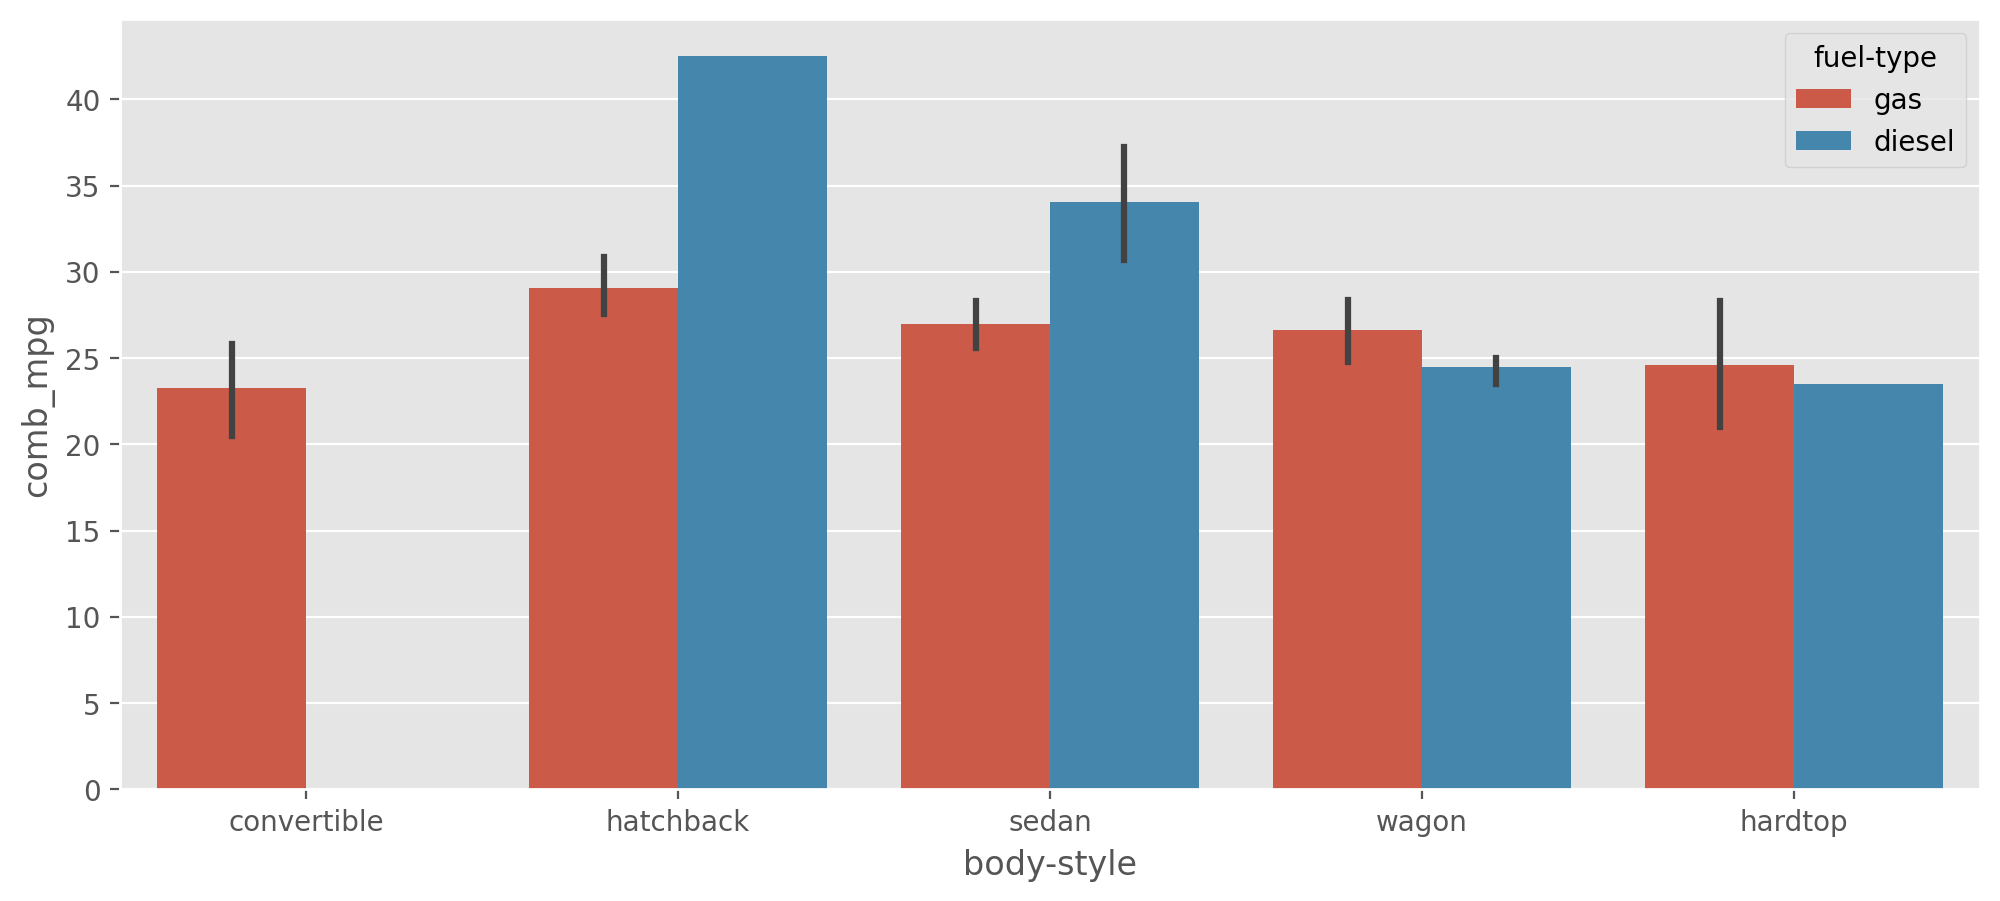

In [34]:
plt.figure(figsize = (12,5), dpi = 200)
sns.barplot(x= 'body-style', y = 'comb_mpg', data = auto, hue = 'fuel-type')

<Axes: xlabel='body-style', ylabel='comb_mpg'>

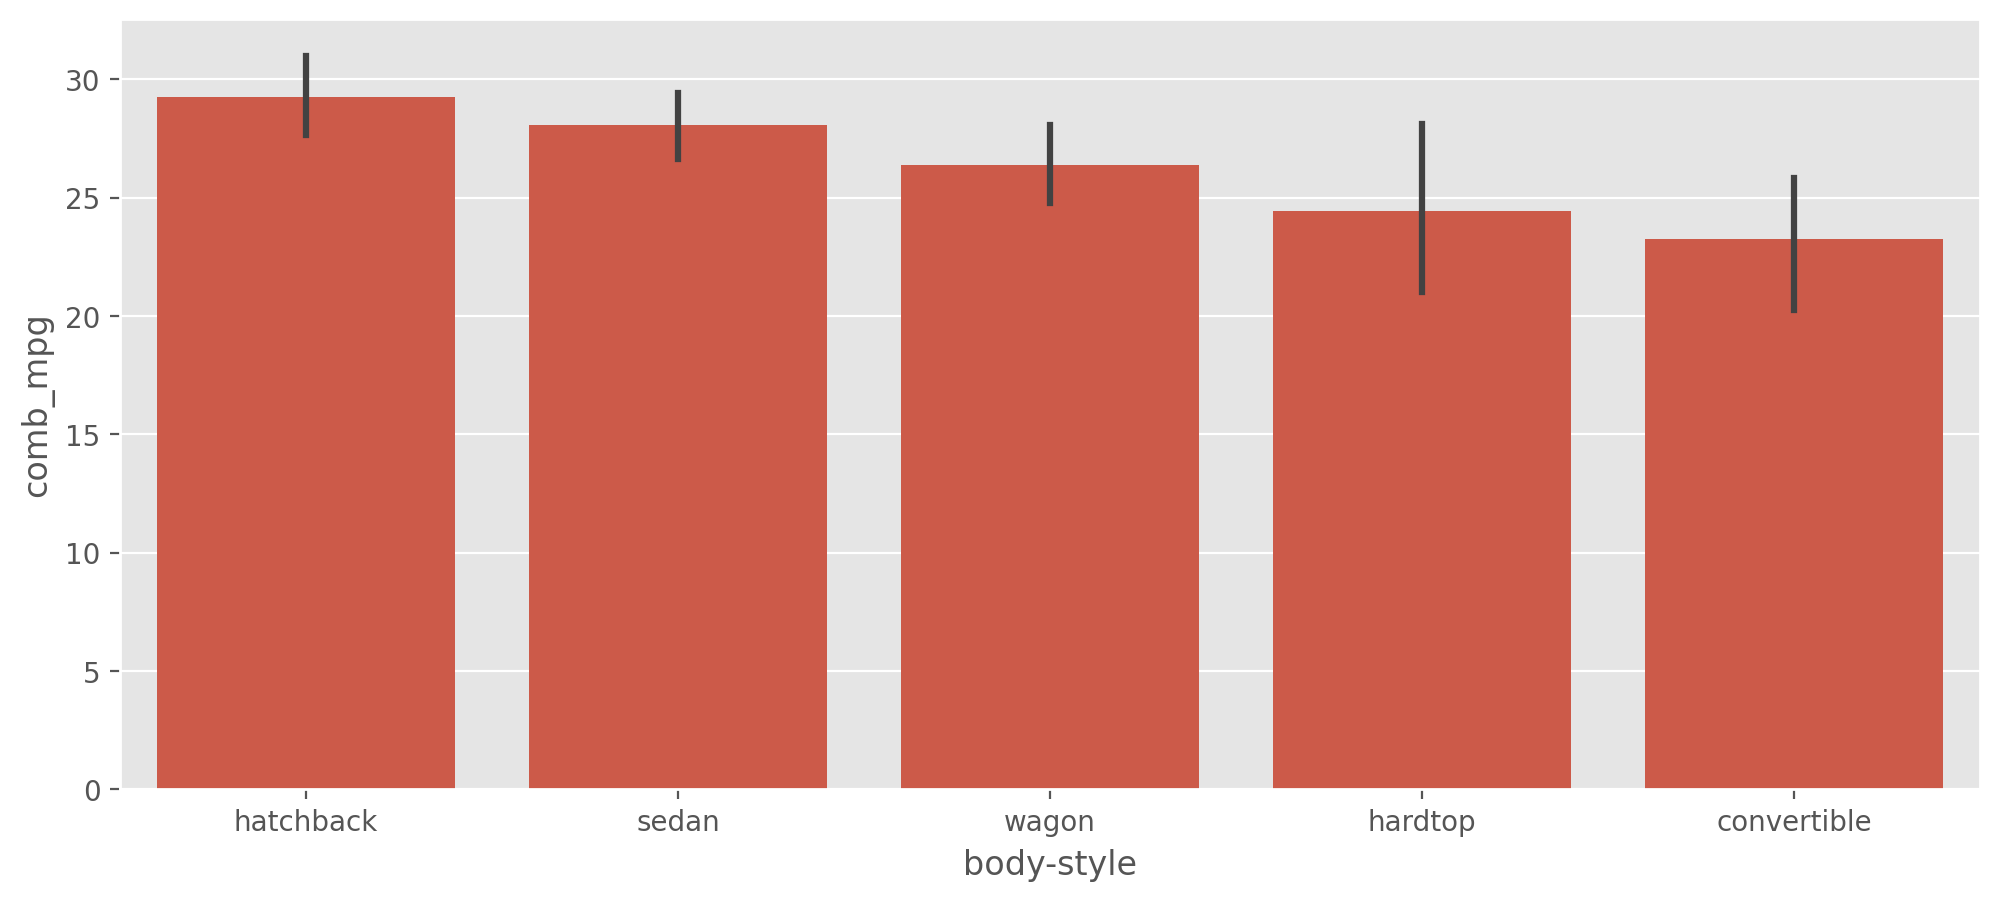

In [35]:
plt.figure(figsize = (12,5), dpi = 200)
sns.barplot(x = 'body-style', y = 'comb_mpg', data = auto, order = ['hatchback', 'sedan', 'wagon', 'hardtop', 'convertible'])

In [36]:
auto.groupby('body-style')['comb_mpg'].mean().sort_values(ascending = False).index

Index(['hatchback', 'sedan', 'wagon', 'hardtop', 'convertible'], dtype='object', name='body-style')

<Axes: xlabel='body-style', ylabel='comb_mpg'>

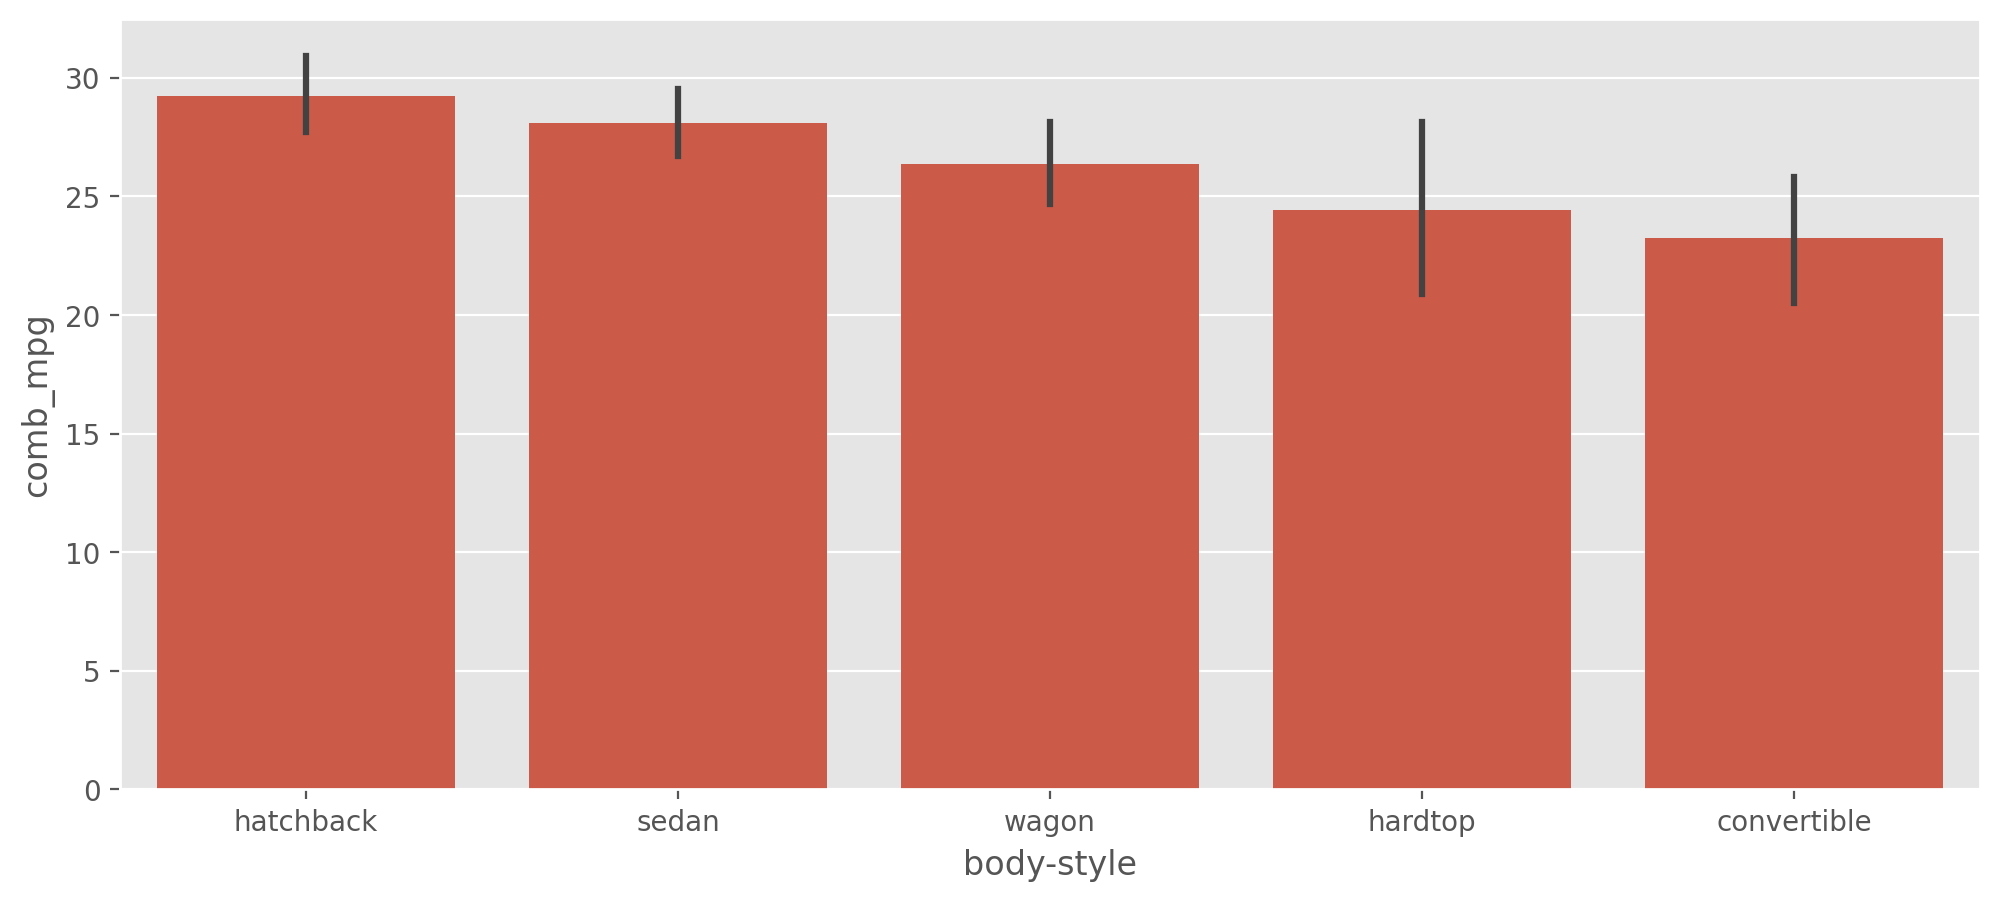

In [37]:
desc_order = auto.groupby('body-style')['comb_mpg'].mean().sort_values(ascending = False).index
plt.figure(figsize = (12,5), dpi = 200)
sns.barplot(x = 'body-style', y = 'comb_mpg', data = auto, order = desc_order)

<Axes: xlabel='make', ylabel='price'>

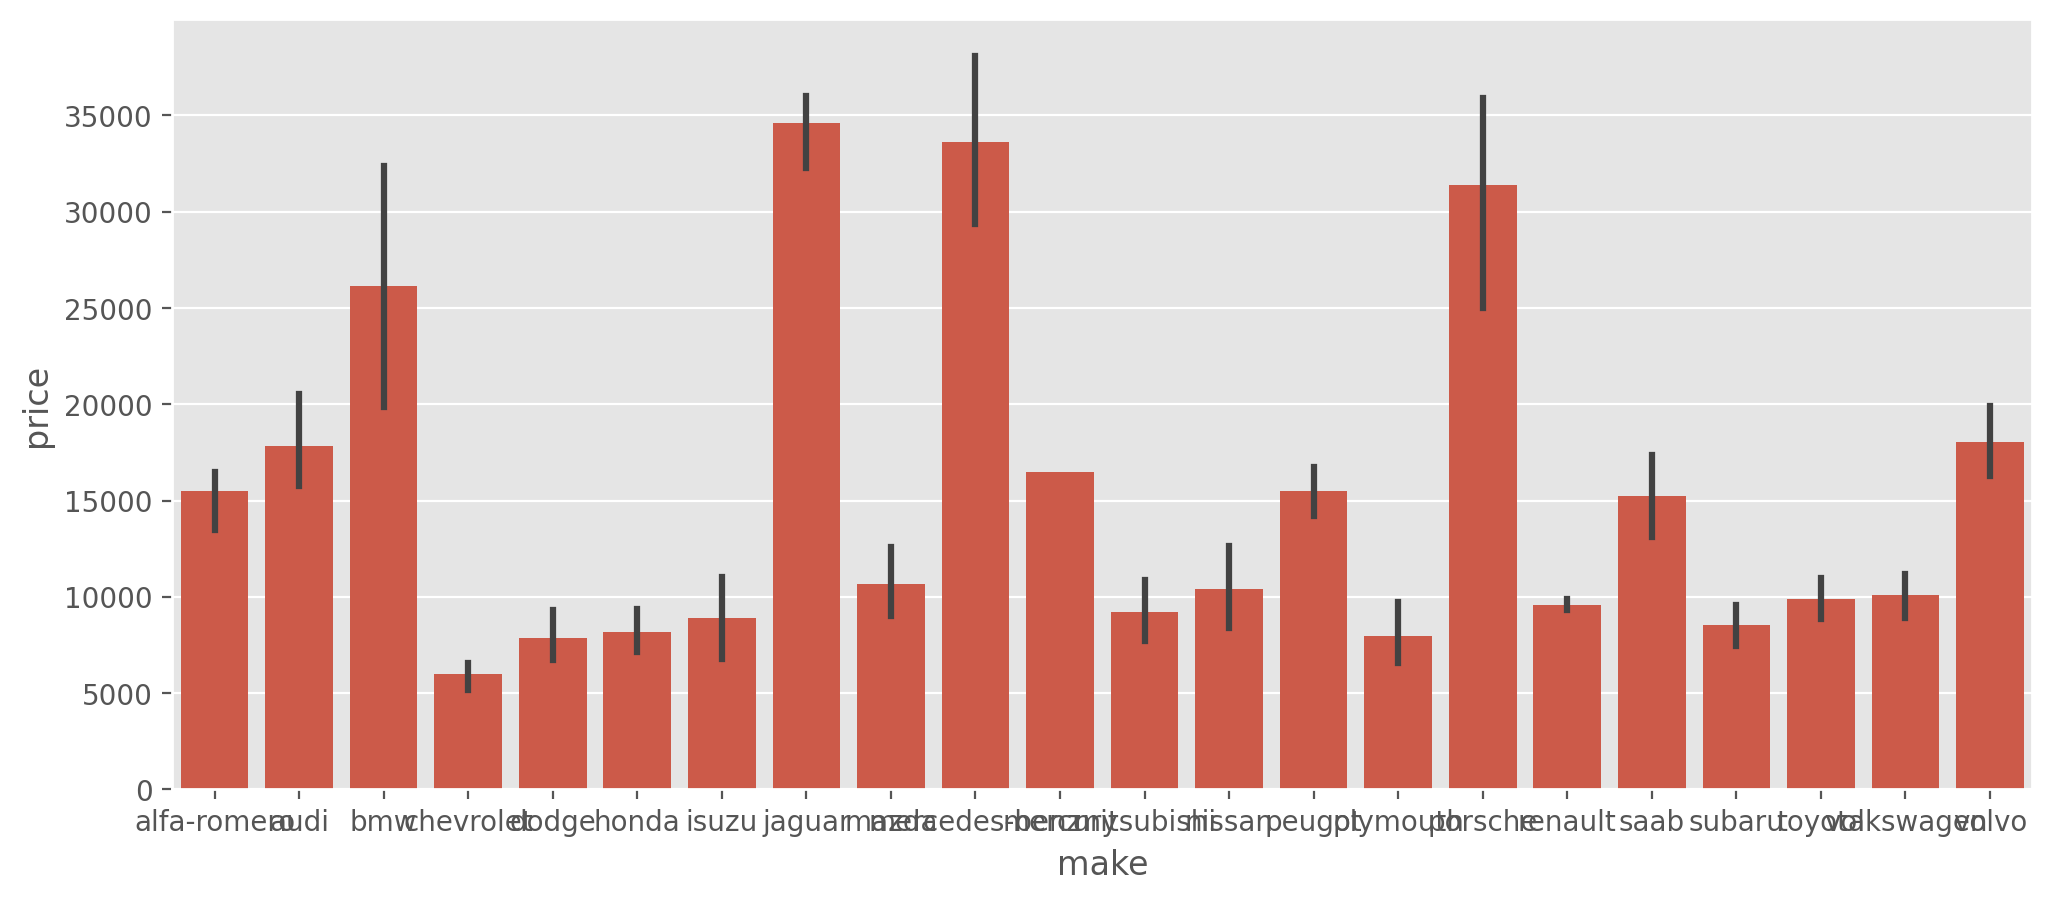

In [38]:
plt.figure(figsize = (12,5), dpi = 200)
sns.barplot(x = 'make', y = 'price', data = auto)

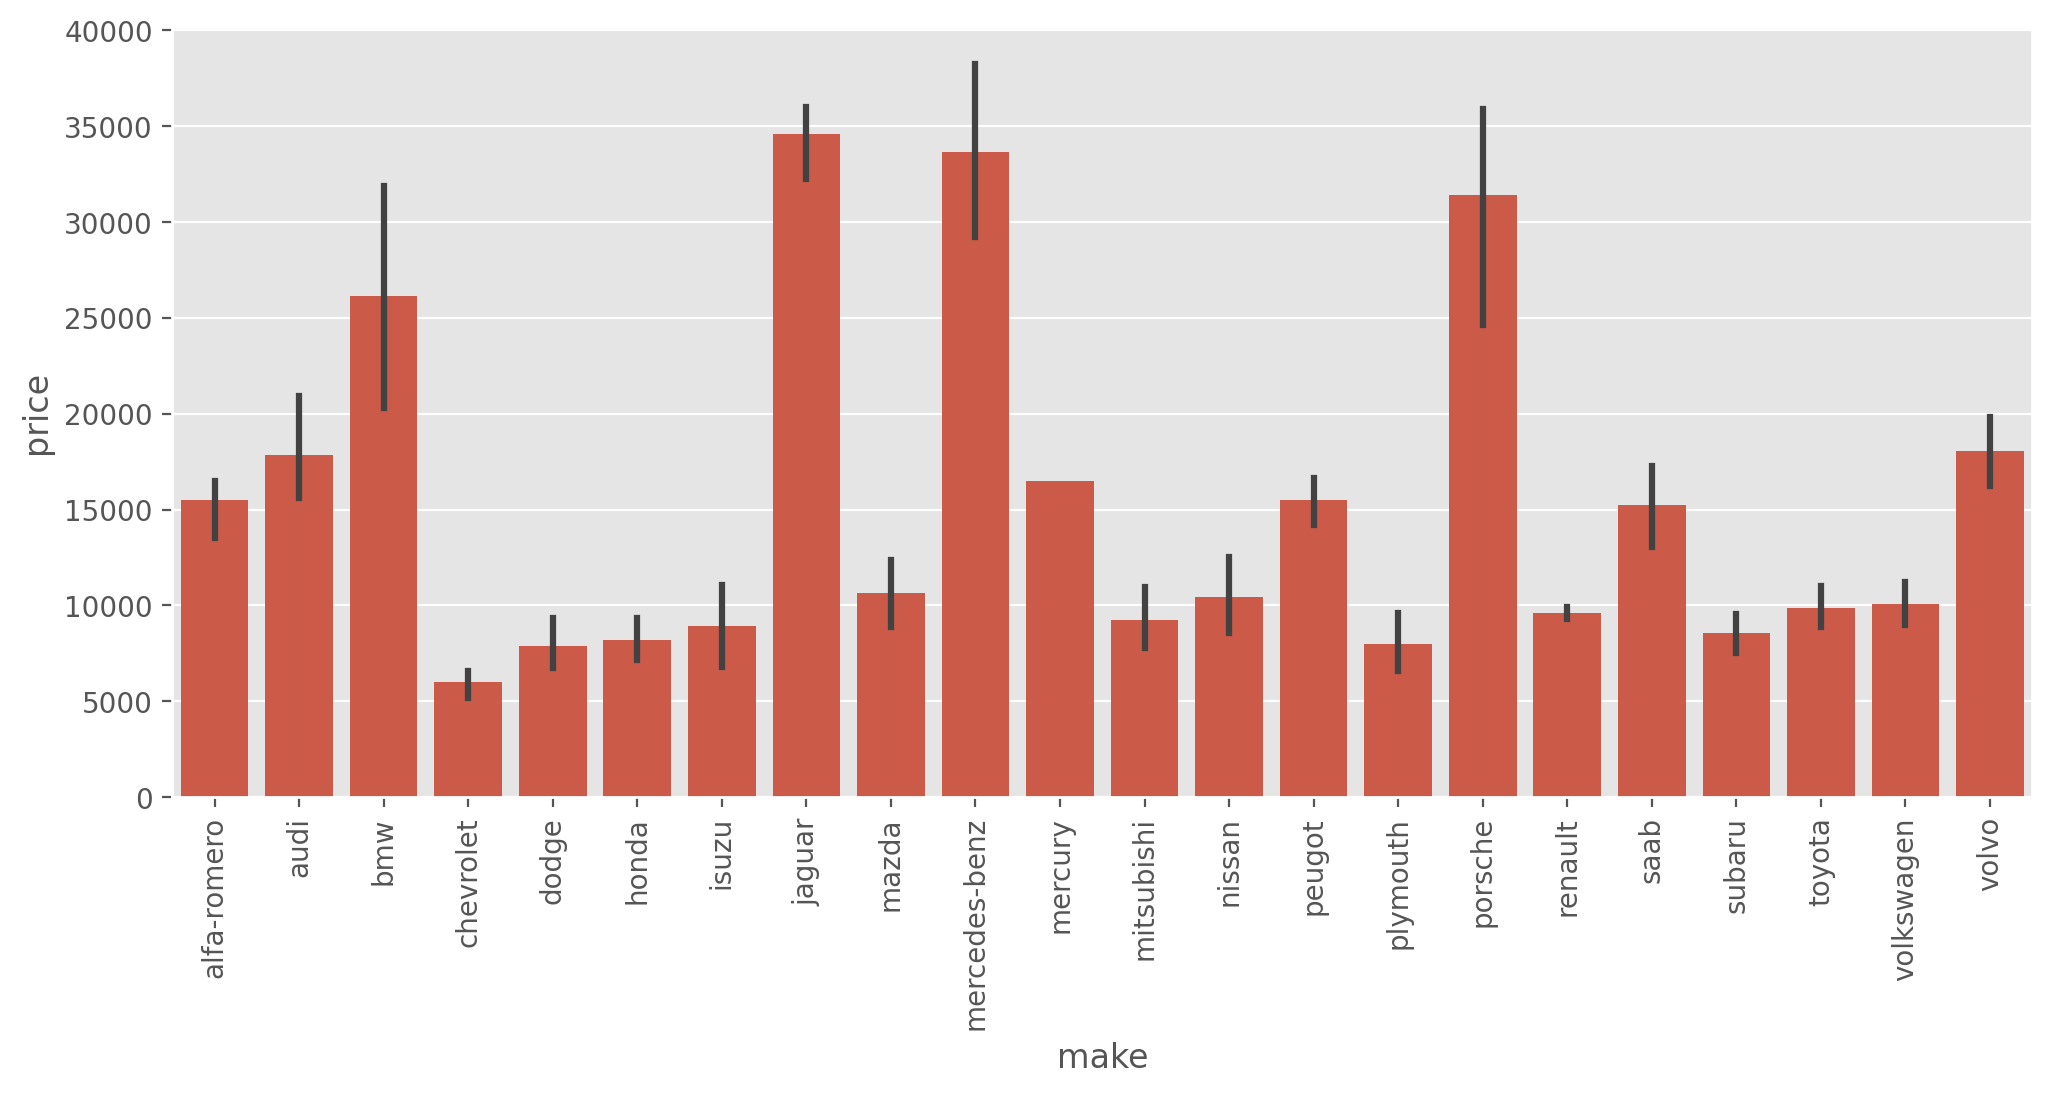

In [39]:
plt.figure(figsize = (12,5), dpi = 200)
sns.barplot(x = 'make', y = 'price', data = auto)
plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='price', ylabel='make'>

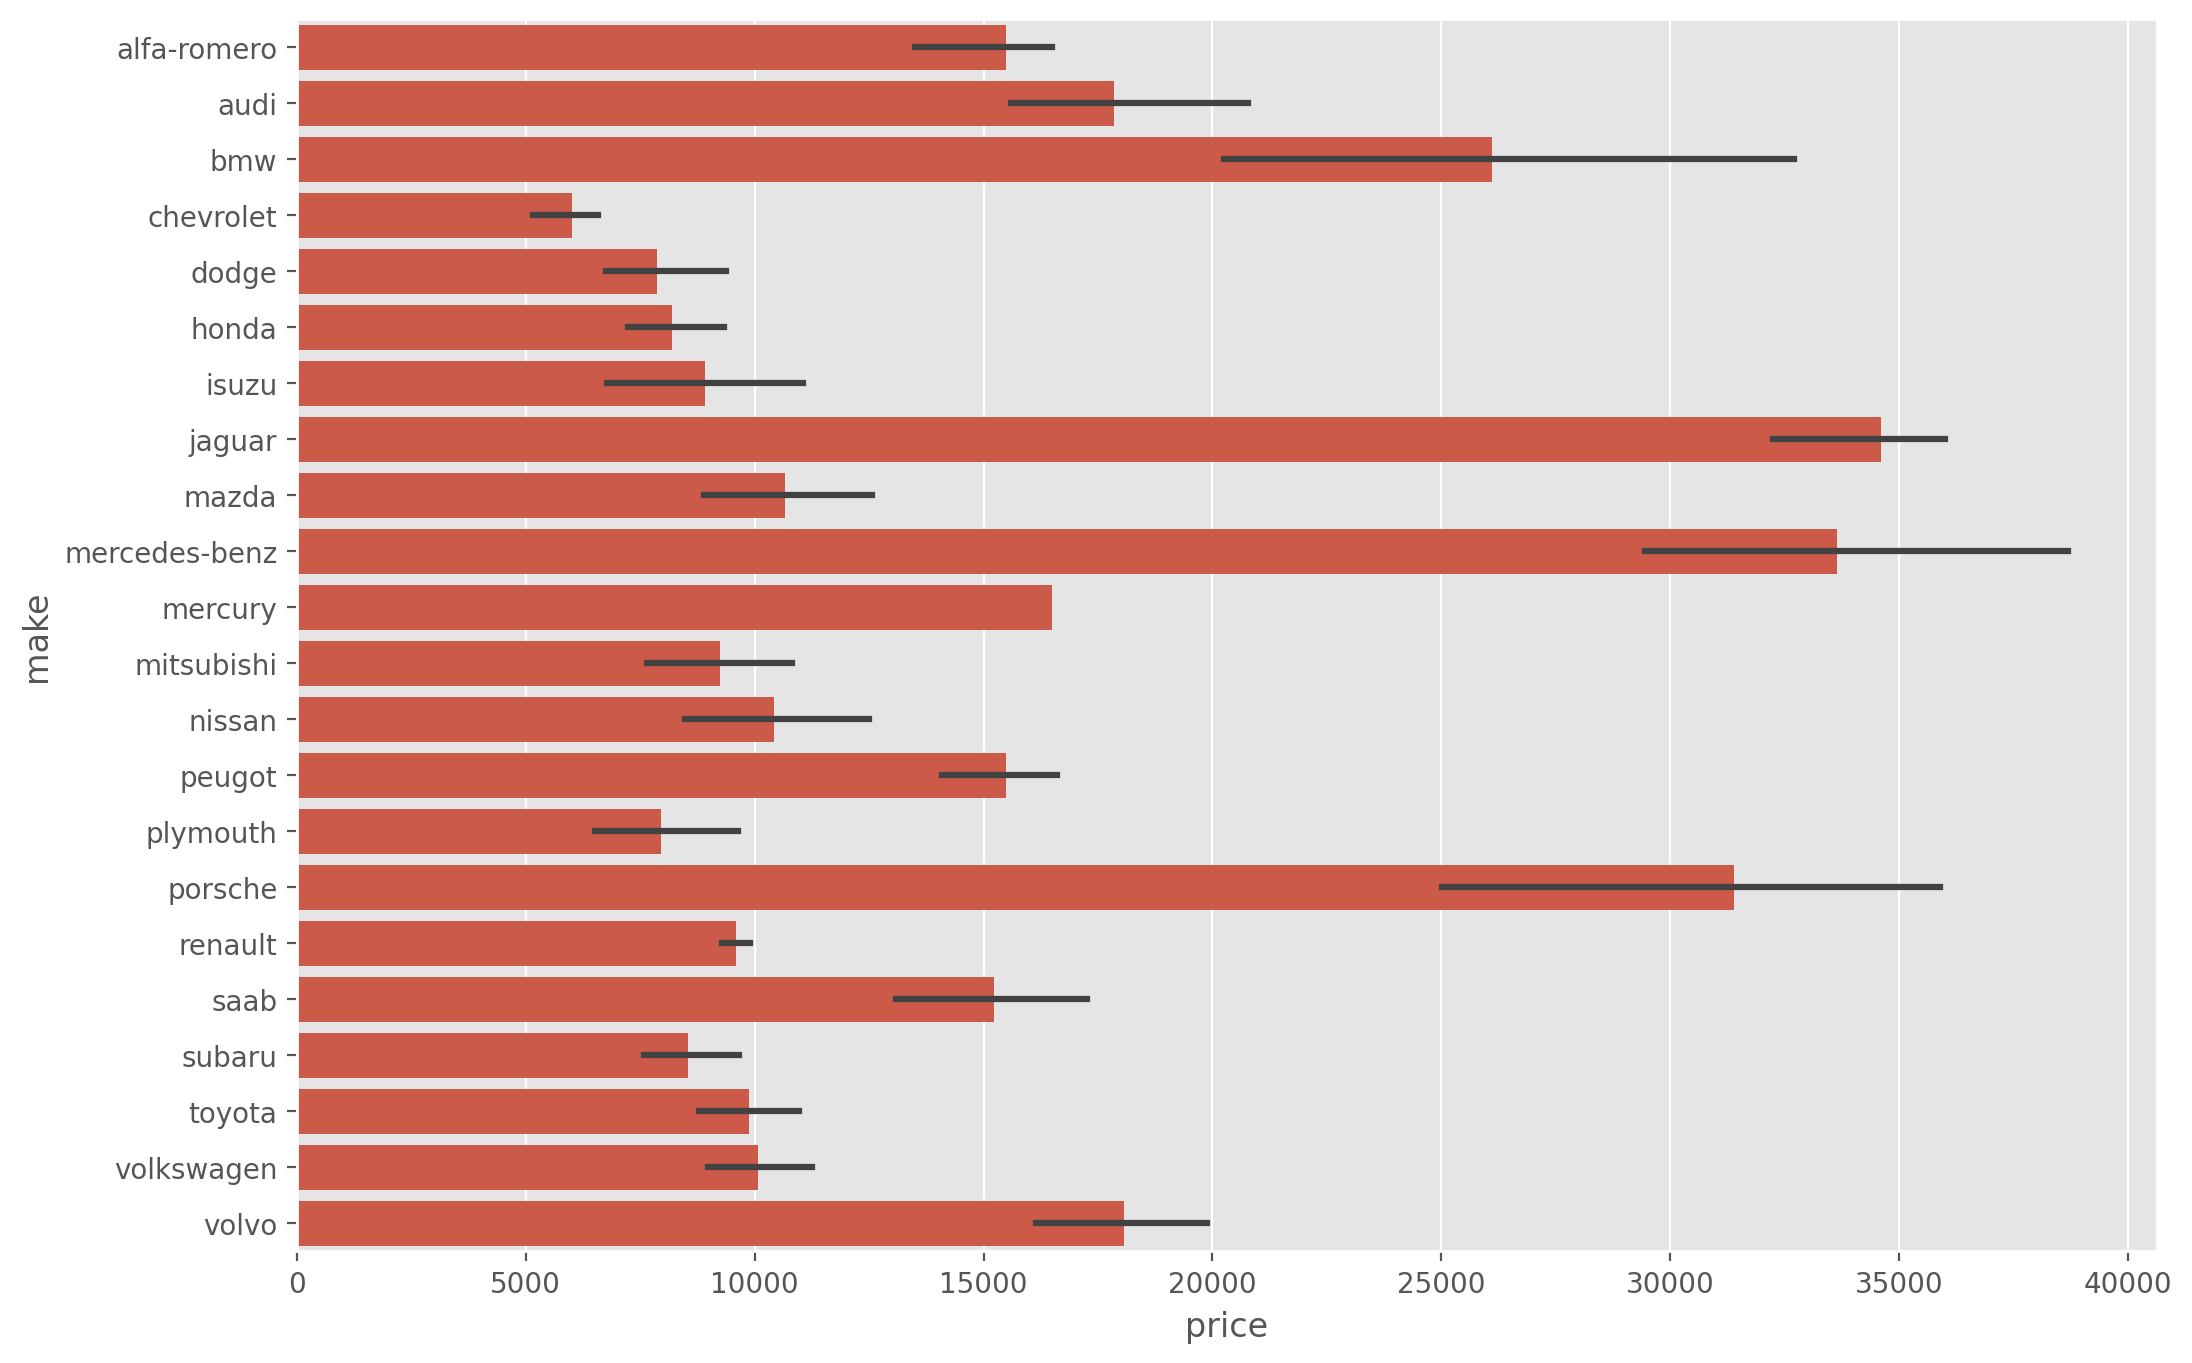

In [40]:
plt.figure(figsize = (12,8), dpi = 200)
sns.barplot(x = 'price', y = 'make', data = auto) # Horizontal Bar Plot

<Axes: xlabel='price', ylabel='make'>

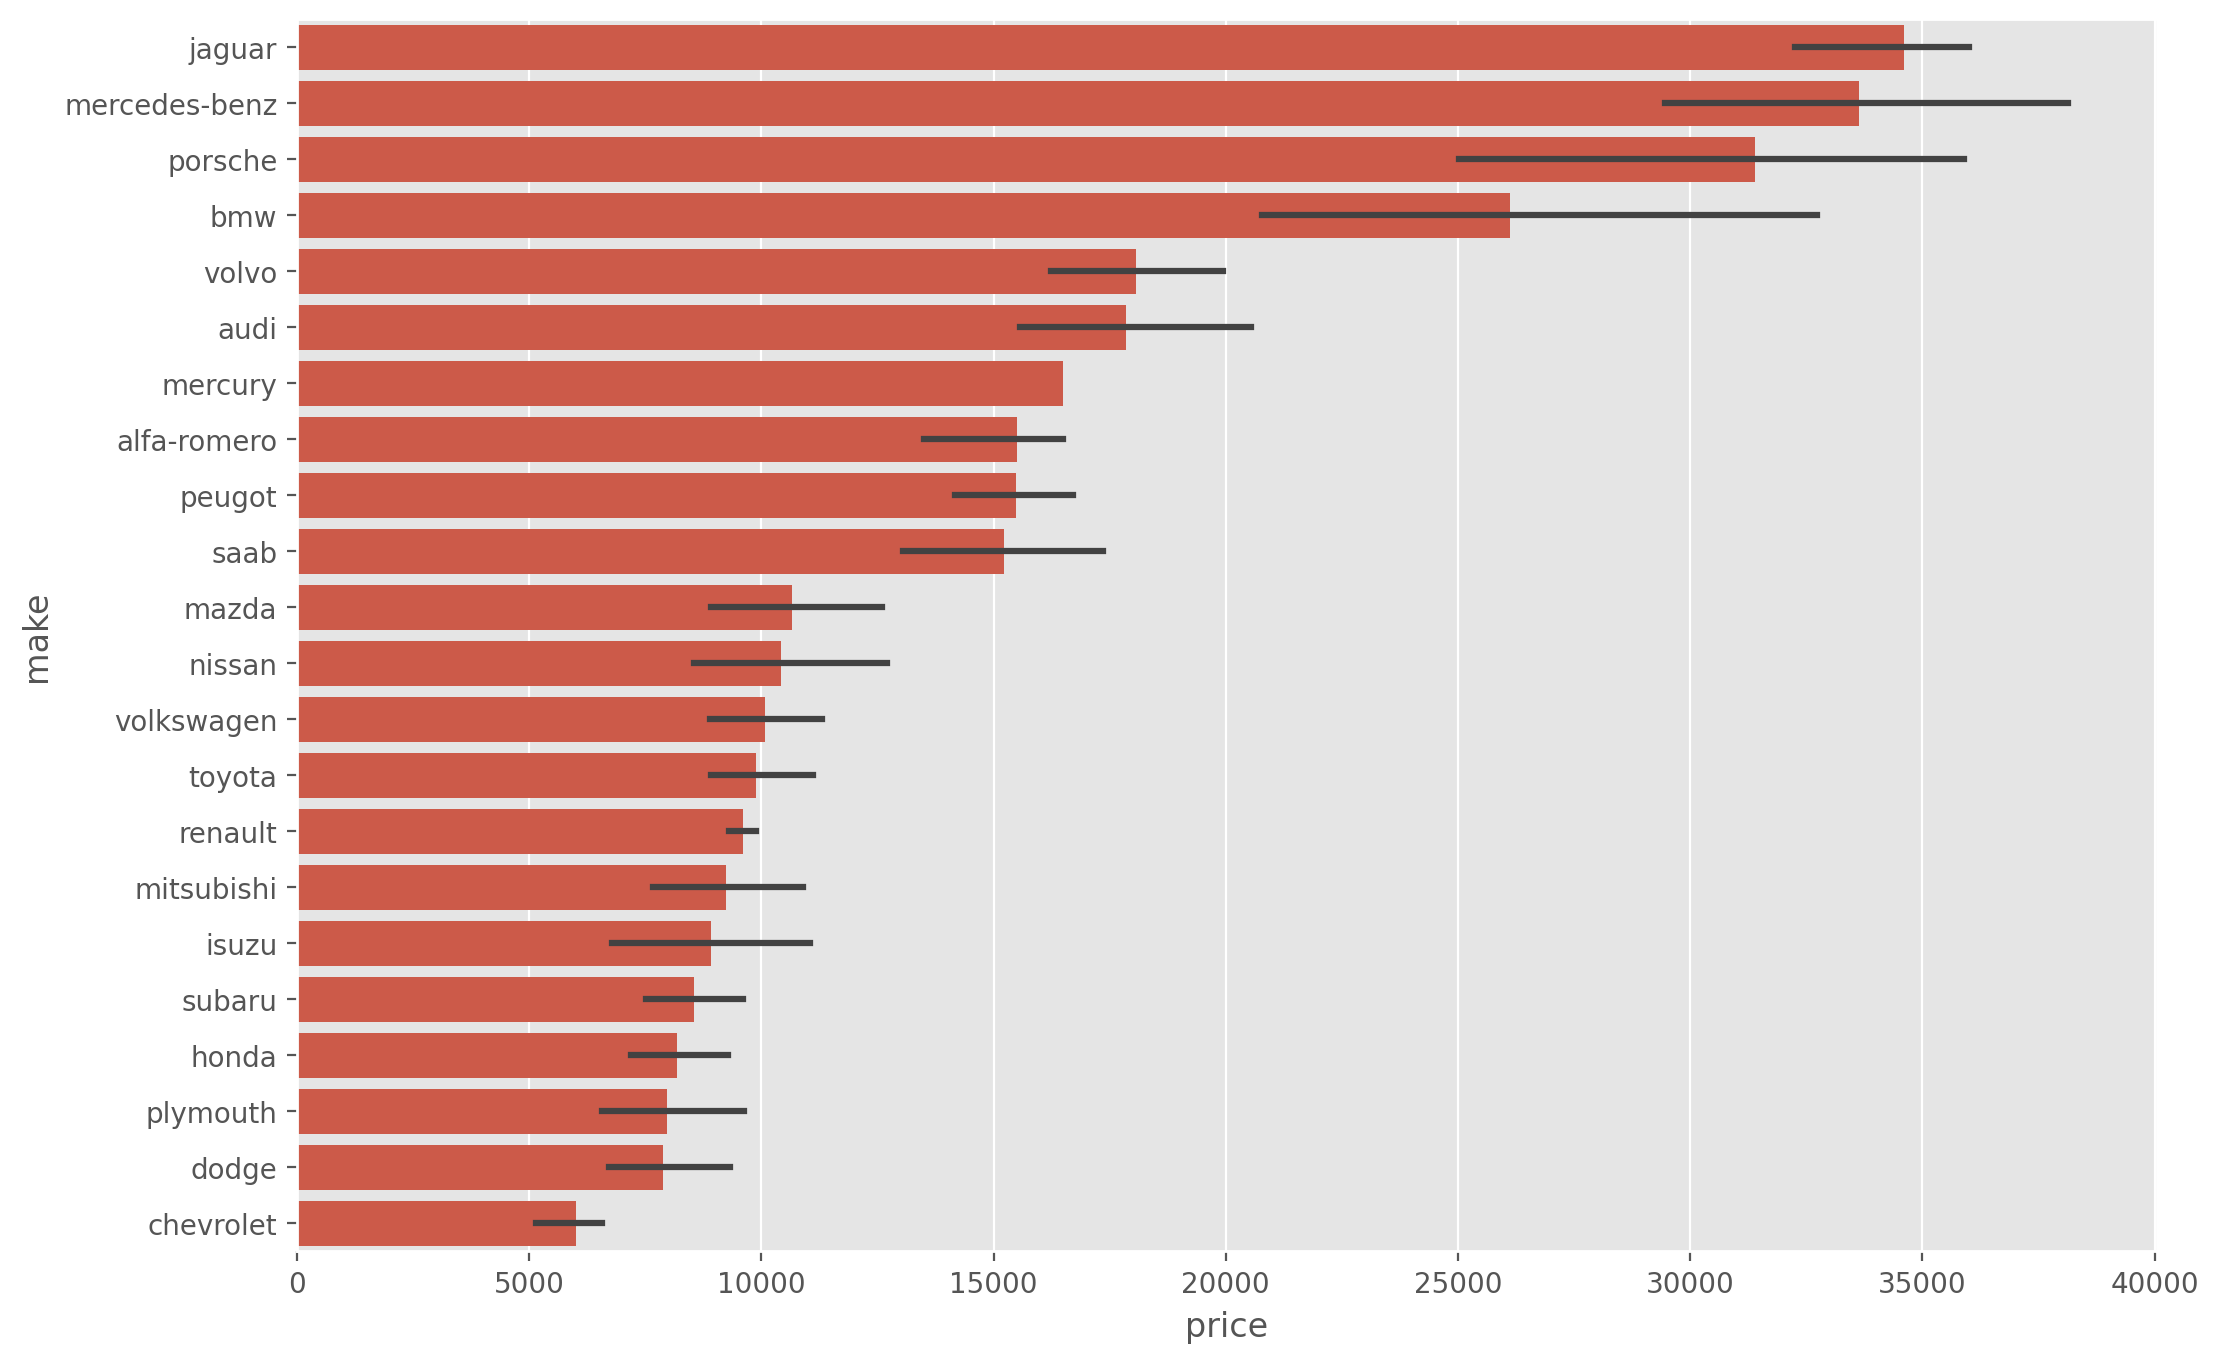

In [41]:
desc_order = auto.groupby('make')['price'].mean().sort_values(ascending = False).index
plt.figure(figsize = (12,8), dpi = 200)
sns.barplot(x = 'price', y = 'make', data = auto, order = desc_order)

<Axes: xlabel='price', ylabel='make'>

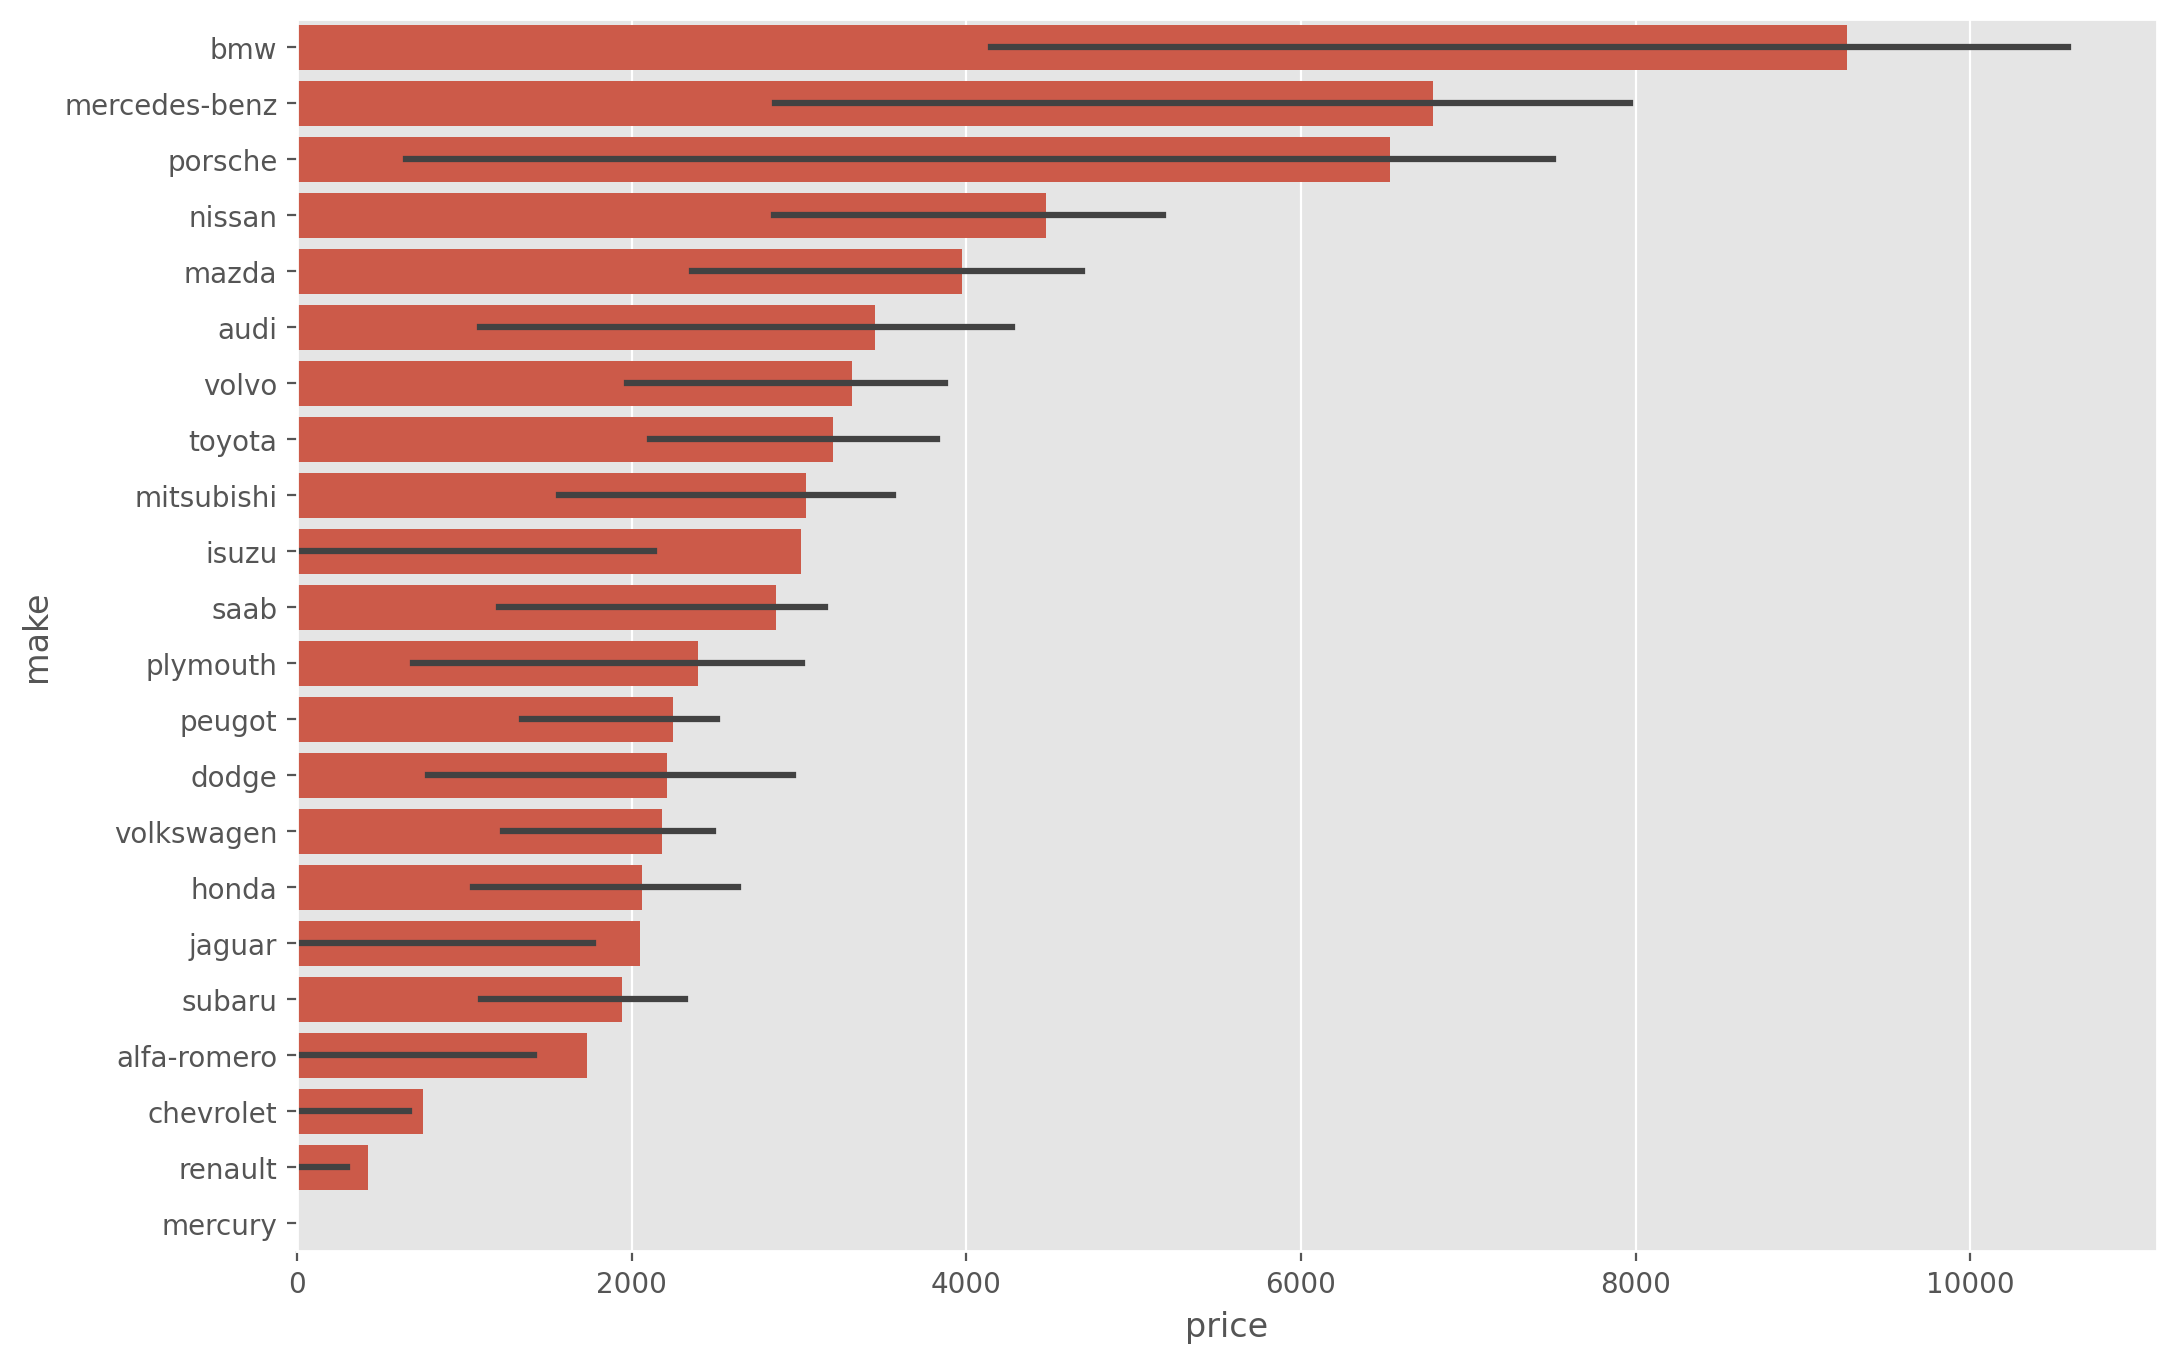

In [42]:
desc_order = auto.groupby('make')['price'].std().sort_values(ascending = False).index
plt.figure(figsize = (12,8), dpi = 200)
sns.barplot(x = 'price', y = 'make', data = auto, order = desc_order, estimator = "std")

---
## countplot
- Used to create a chart showing number of each category in a categorical column
- Used in case of a categorical column

<Axes: xlabel='fuel-type', ylabel='count'>

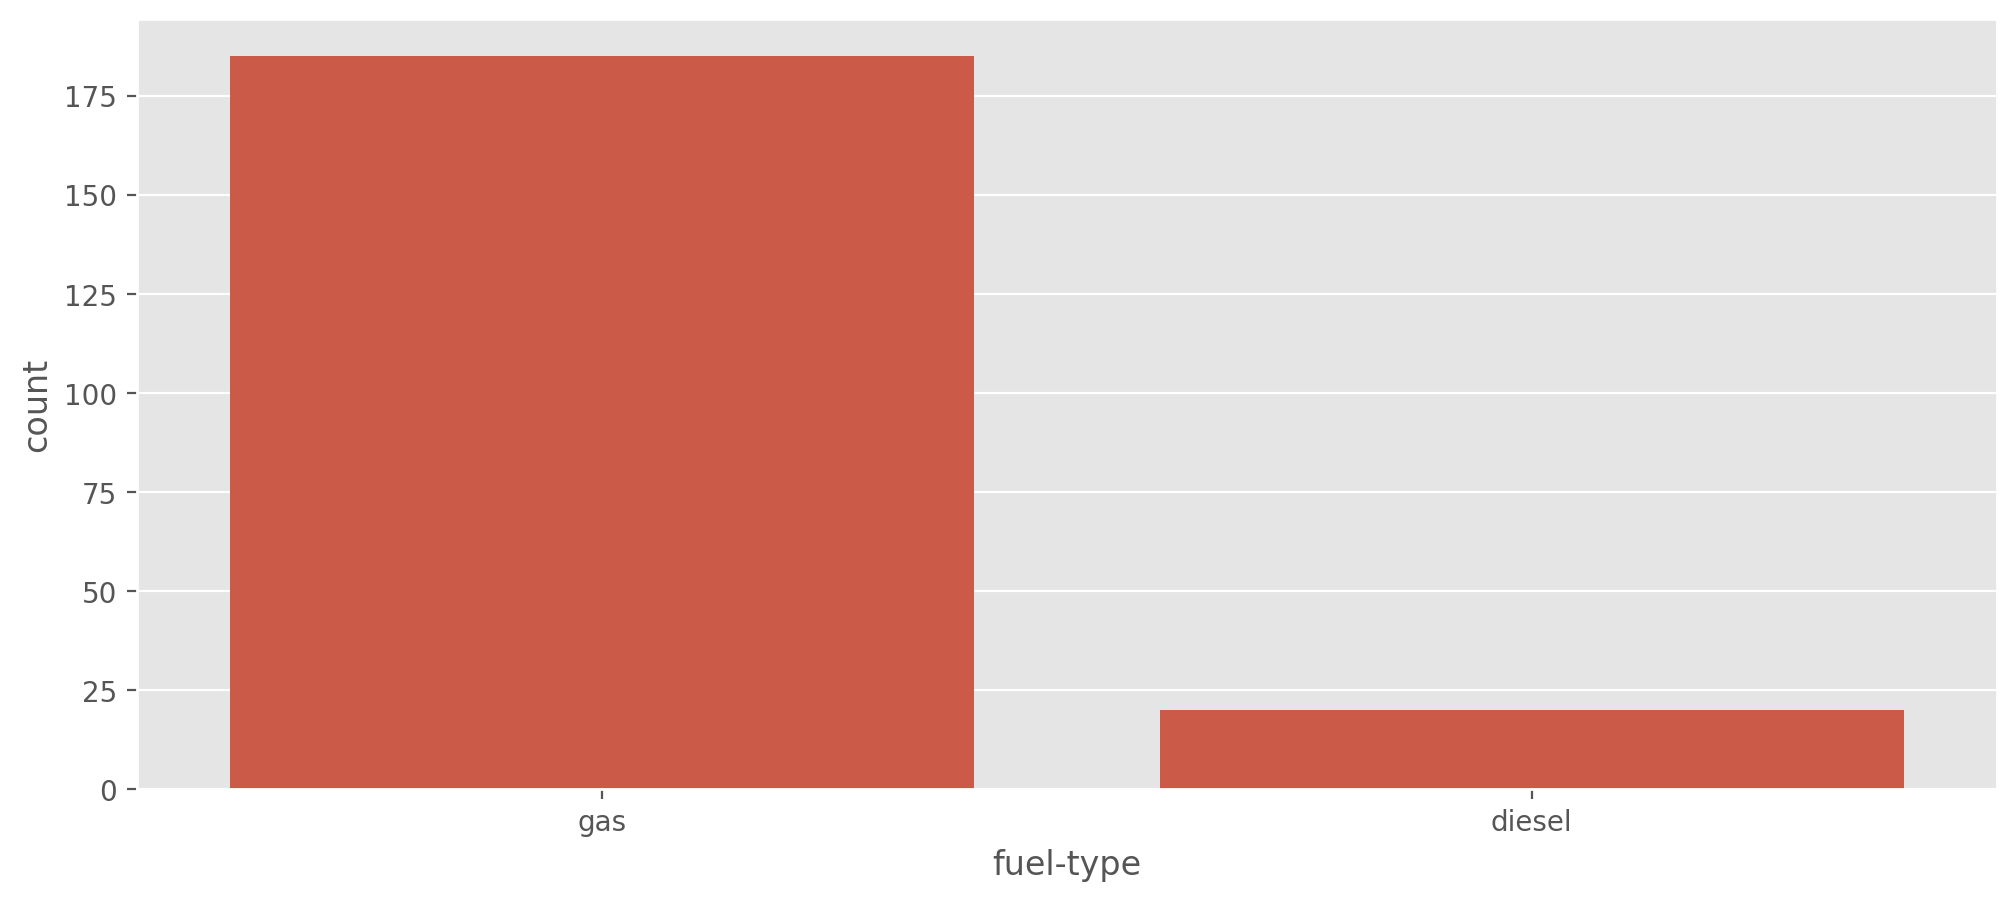

In [43]:
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(x = 'fuel-type', data = auto)

In [44]:
auto['fuel-type'].value_counts()

fuel-type
gas       185
diesel     20
Name: count, dtype: int64

<Axes: xlabel='body-style', ylabel='count'>

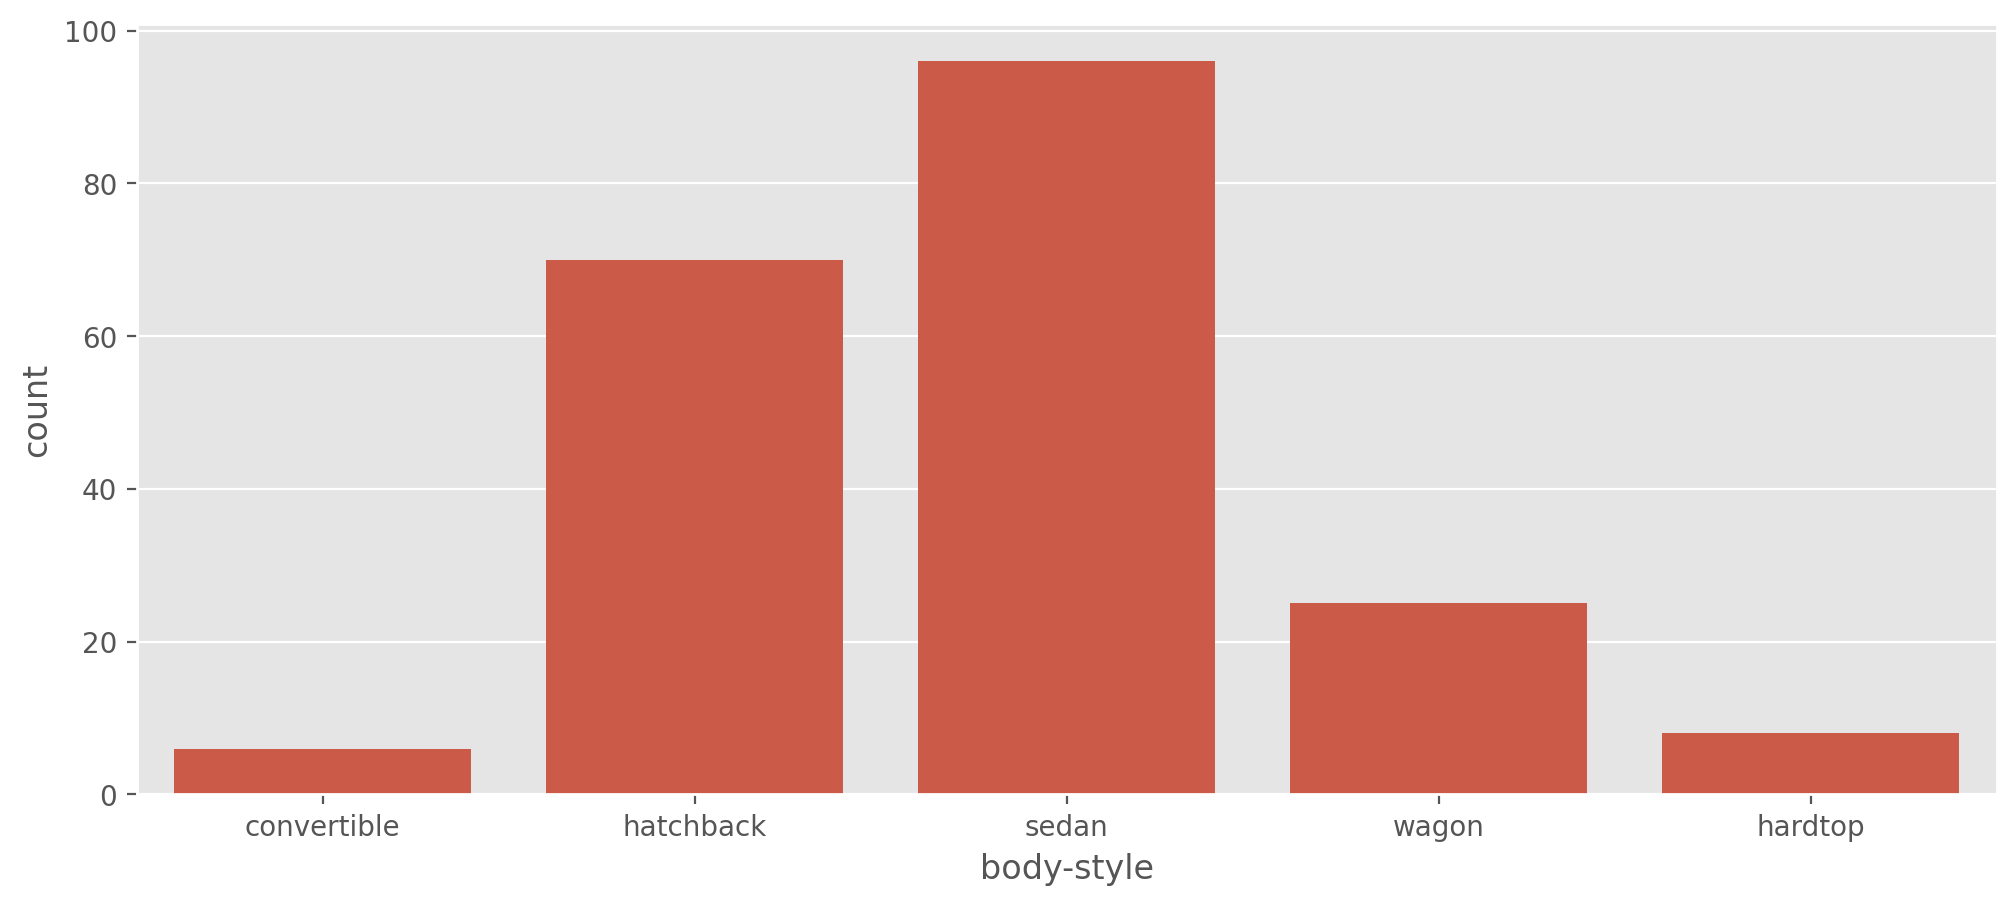

In [45]:
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(x = 'body-style', data = auto)

In [46]:
auto['body-style'].value_counts()

body-style
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

In [49]:
print(auto.groupby('body-style')['fuel-type'].value_counts() )

body-style   fuel-type
convertible  gas           6
hardtop      gas           7
             diesel        1
hatchback    gas          69
             diesel        1
sedan        gas          81
             diesel       15
wagon        gas          22
             diesel        3
Name: count, dtype: int64


<Axes: xlabel='body-style', ylabel='count'>

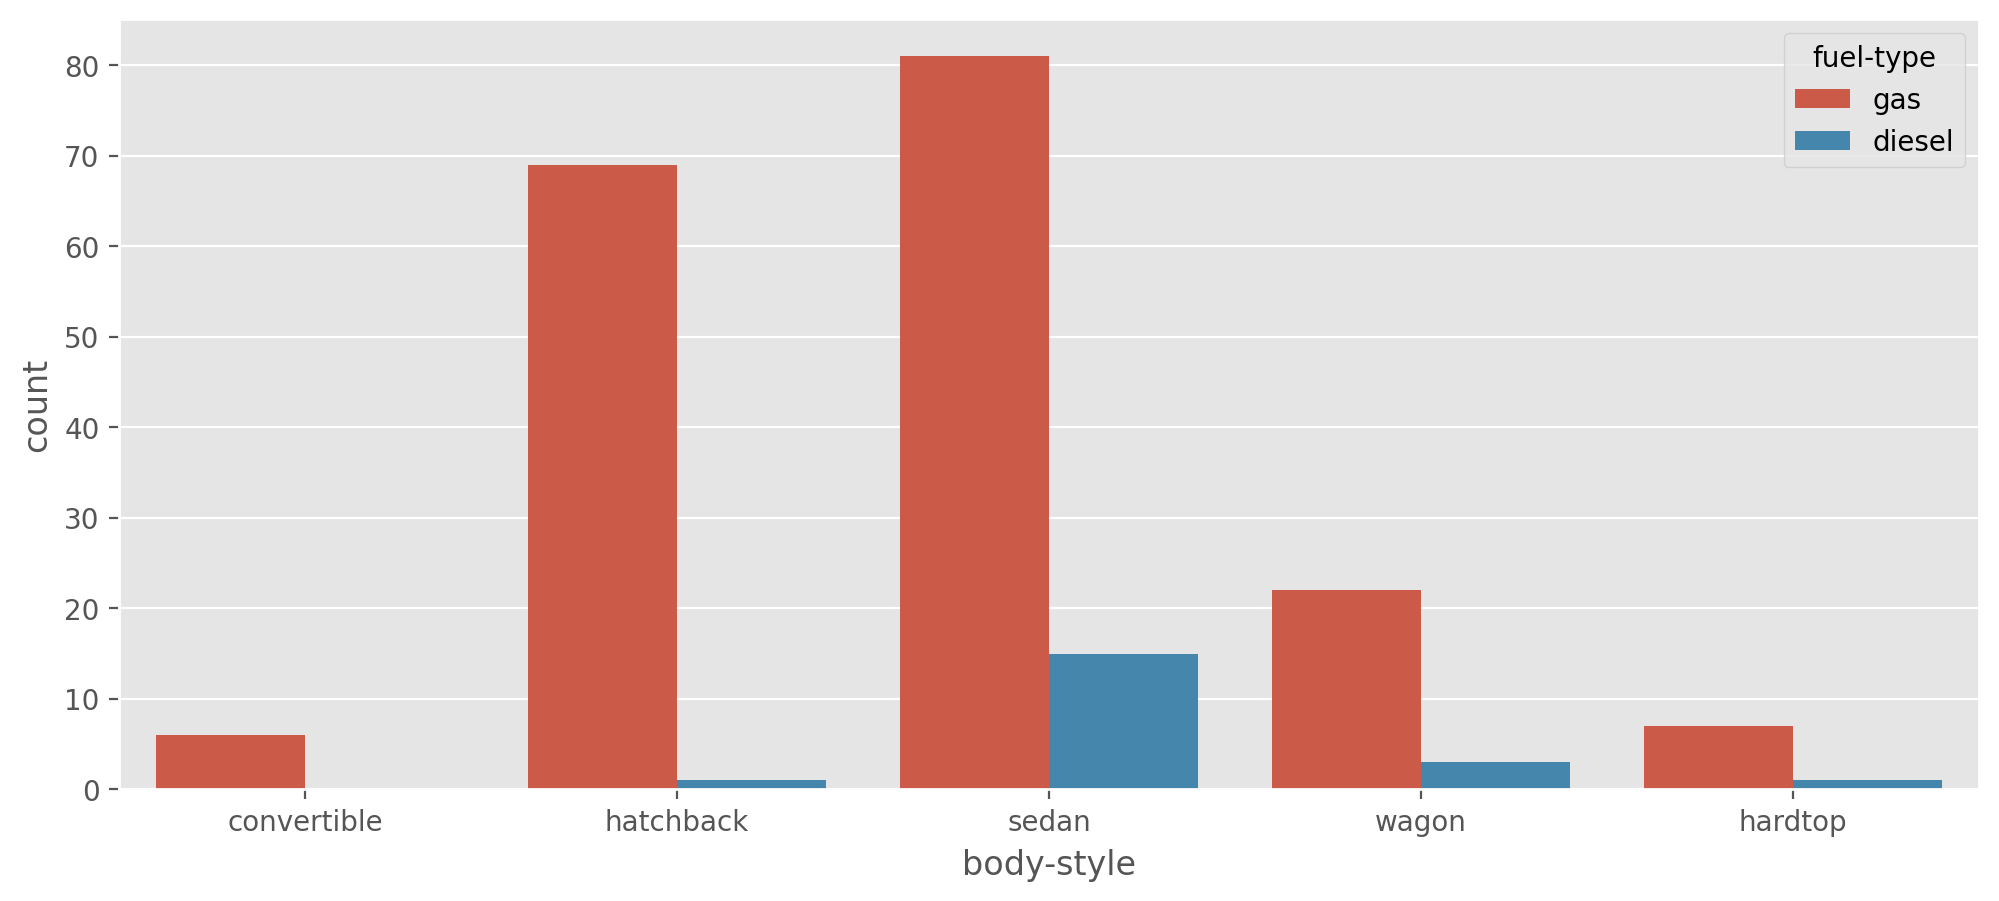

In [47]:
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(x = 'body-style', data = auto, hue = 'fuel-type')

## boxplot

<Axes: ylabel='price'>

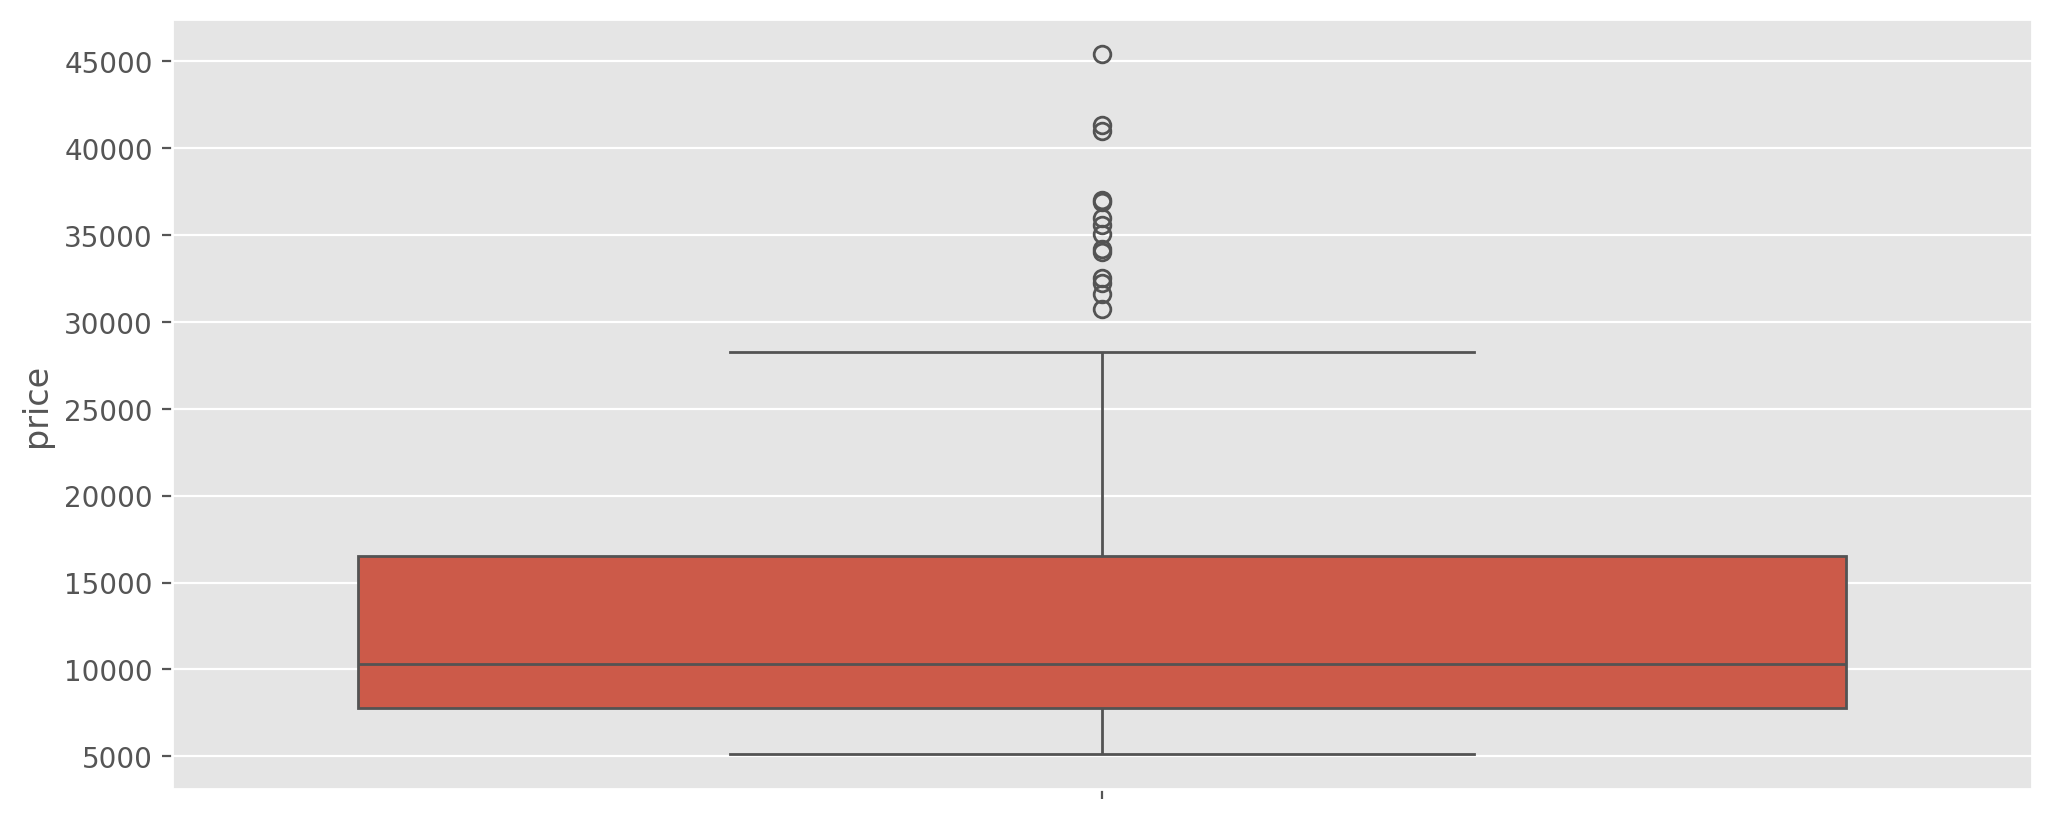

In [50]:
plt.figure(figsize = (12,5), dpi = 200)
sns.boxplot(y = 'price', data = auto)

In [51]:
q1 = auto.price.quantile(0.25)
q2 = auto.price.quantile(0.50)
q3 = auto.price.quantile(0.75)
iqr = q3 - q1
print(q1, q2, q3, iqr, sep = '\n')

7775.0
10295.0
16500.0
8725.0


In [52]:
upper = q3  + 1.5 * iqr
lower = q1 - 1.5 * iqr
print(upper, lower)

29587.5 -5312.5


In [53]:
auto[auto["price"] > upper][['price','make']]

price           make
15   30760.0            bmw
16   41315.0            bmw
17   36880.0            bmw
47   32250.0         jaguar
48   35550.0         jaguar
49   36000.0         jaguar
70   31600.0  mercedes-benz
71   34184.0  mercedes-benz
72   35056.0  mercedes-benz
73   40960.0  mercedes-benz
74   45400.0  mercedes-benz
126  32528.0        porsche
127  34028.0        porsche
128  37028.0        porsche

<Axes: xlabel='fuel-type', ylabel='comb_mpg'>

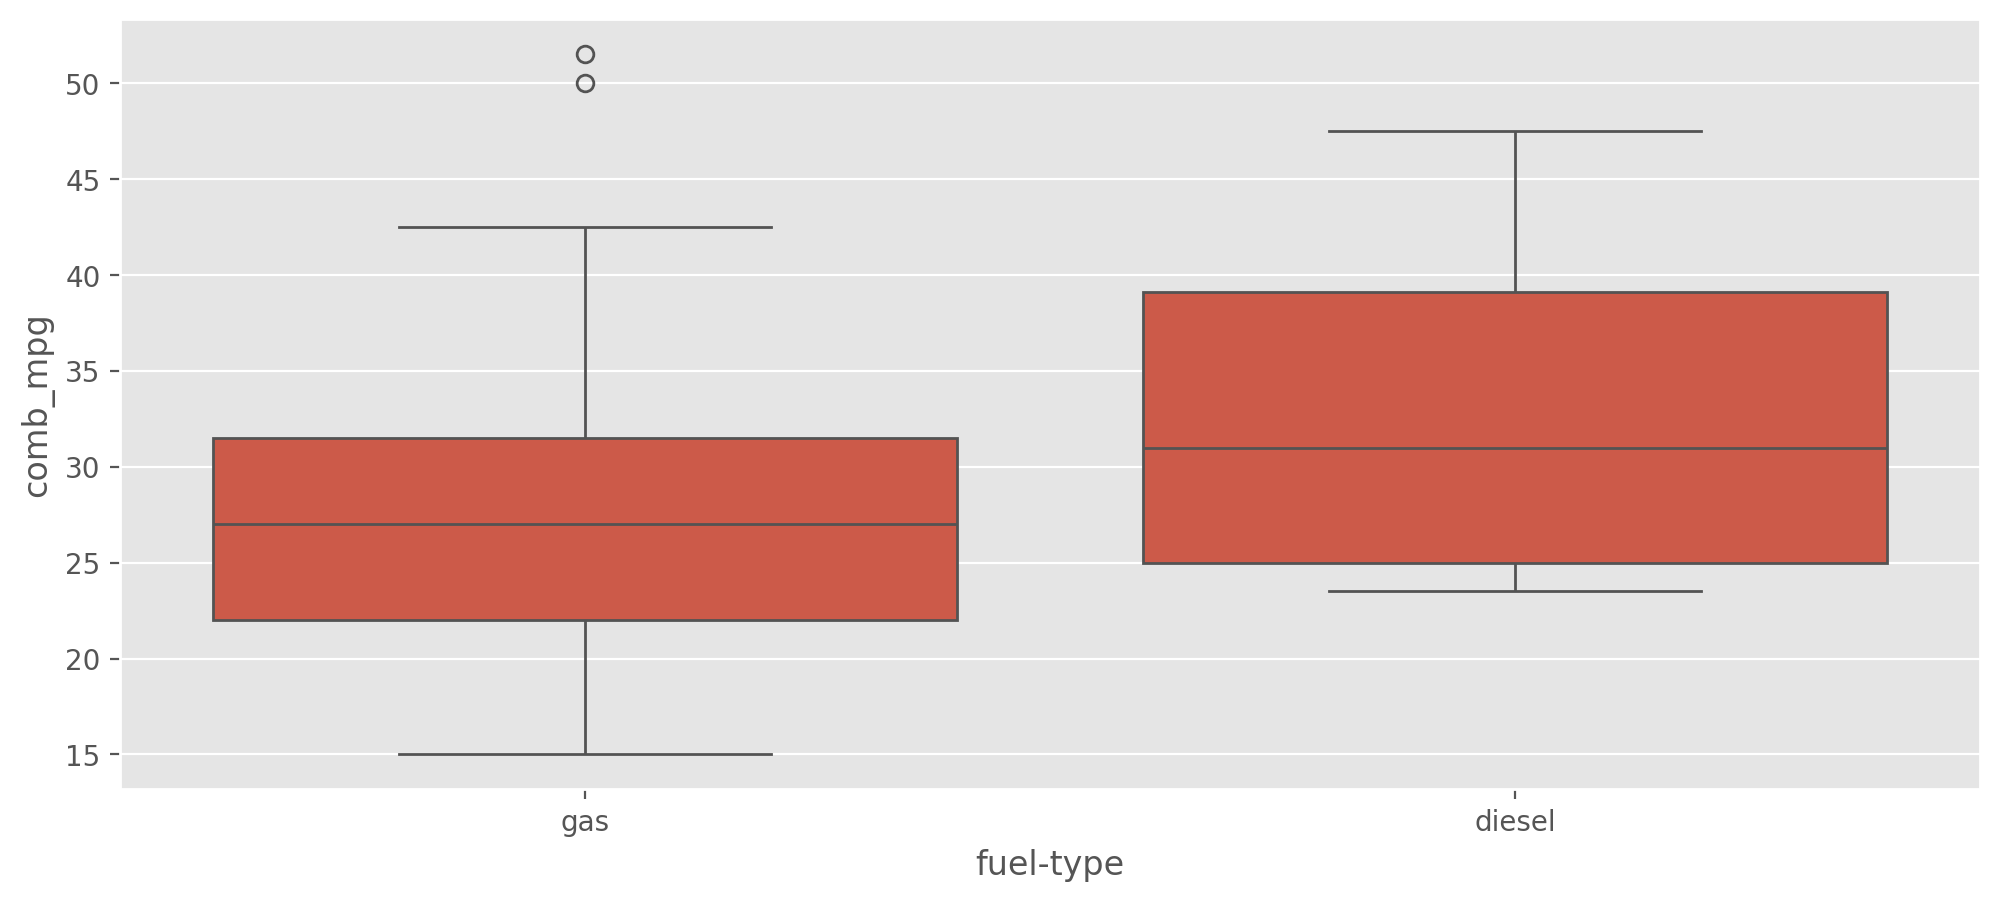

In [59]:
plt.figure(figsize = (12,5), dpi = 200)
sns.boxplot(x = 'fuel-type',y ='comb_mpg', data = auto)

In [60]:
temp = auto[auto["fuel-type"] == "gas"]

In [61]:
temp[temp["comb_mpg"] > 43]

symboling normalized-losses       make fuel-type aspiration num-of-doors  \
18          2               121  chevrolet       gas        std          two   
30          2               137      honda       gas        std          two   

   body-style drive-wheels engine-location  wheel-base  ...  fuel-system  \
18  hatchback          fwd           front        88.4  ...         2bbl   
30  hatchback          fwd           front        86.6  ...         1bbl   

    bore  stroke  compression-ratio horsepower peak-rpm  city-mpg highway-mpg  \
18  2.91    3.03                9.5       48.0   5100.0        47          53   
30  2.91    3.41                9.6       58.0   4800.0        49          54   

     price comb_mpg  
18  5151.0     50.0  
30  6479.0     51.5  

[2 rows x 27 columns]

<Axes: xlabel='body-style', ylabel='price'>

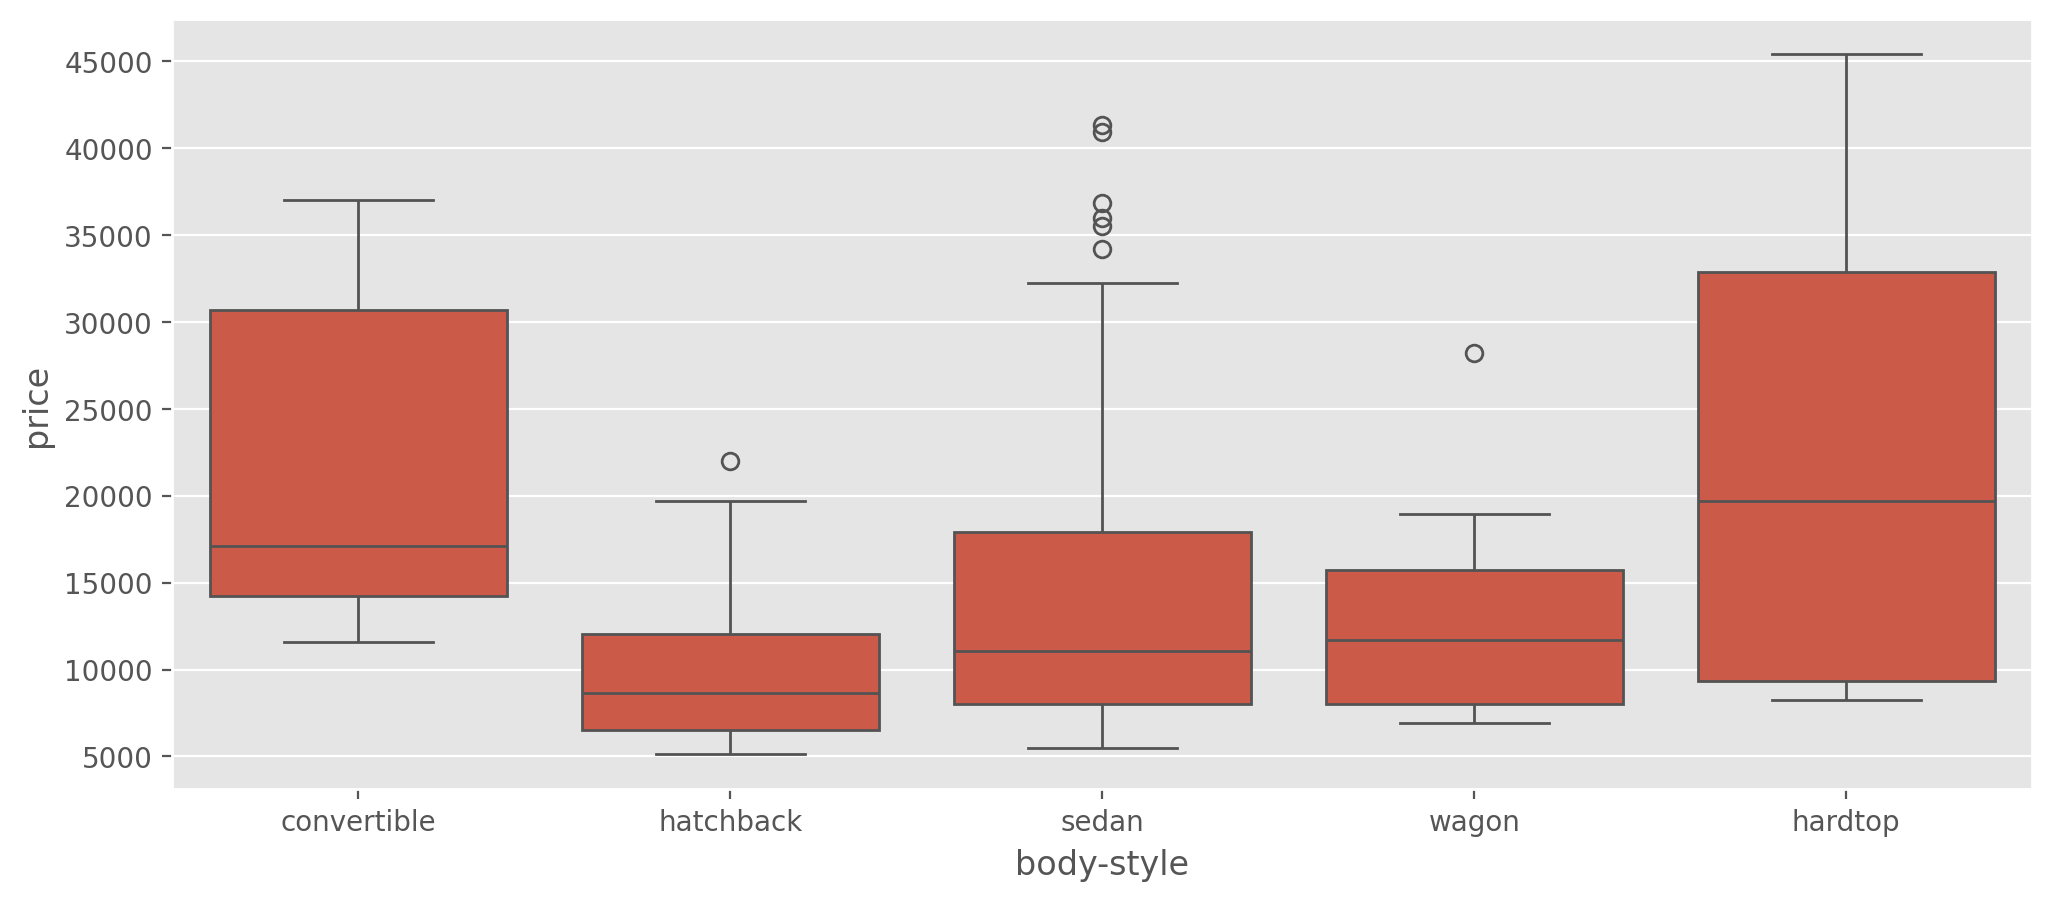

In [62]:
plt.figure(figsize = (12,5), dpi = 200)
sns.boxplot(x = 'body-style', y = 'price', data = auto)

In [63]:
temp = auto[auto["body-style"] == "hatchback"]

In [65]:
temp[temp["price"] > 20000][['make','price']]

make    price
125  porsche  22018.0

---
## violinplot

<Axes: ylabel='price'>

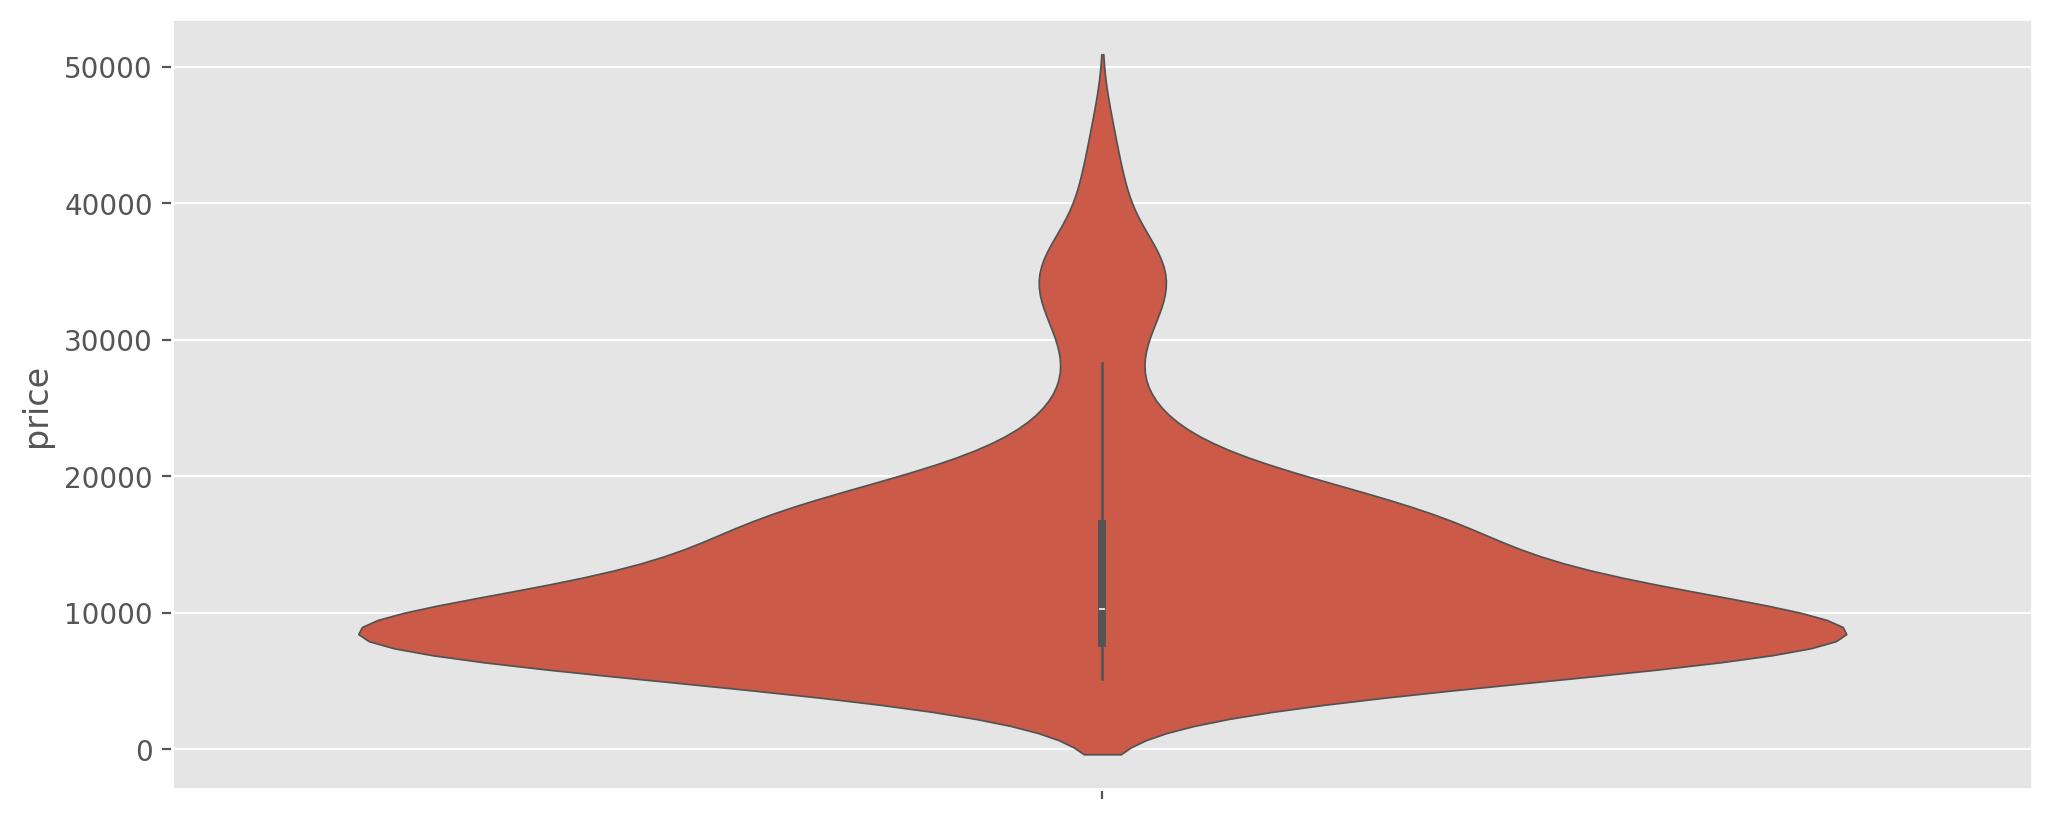

In [66]:
plt.figure(figsize = (12,5), dpi = 200)
sns.violinplot(y = 'price', data = auto)

<Axes: xlabel='fuel-type', ylabel='comb_mpg'>

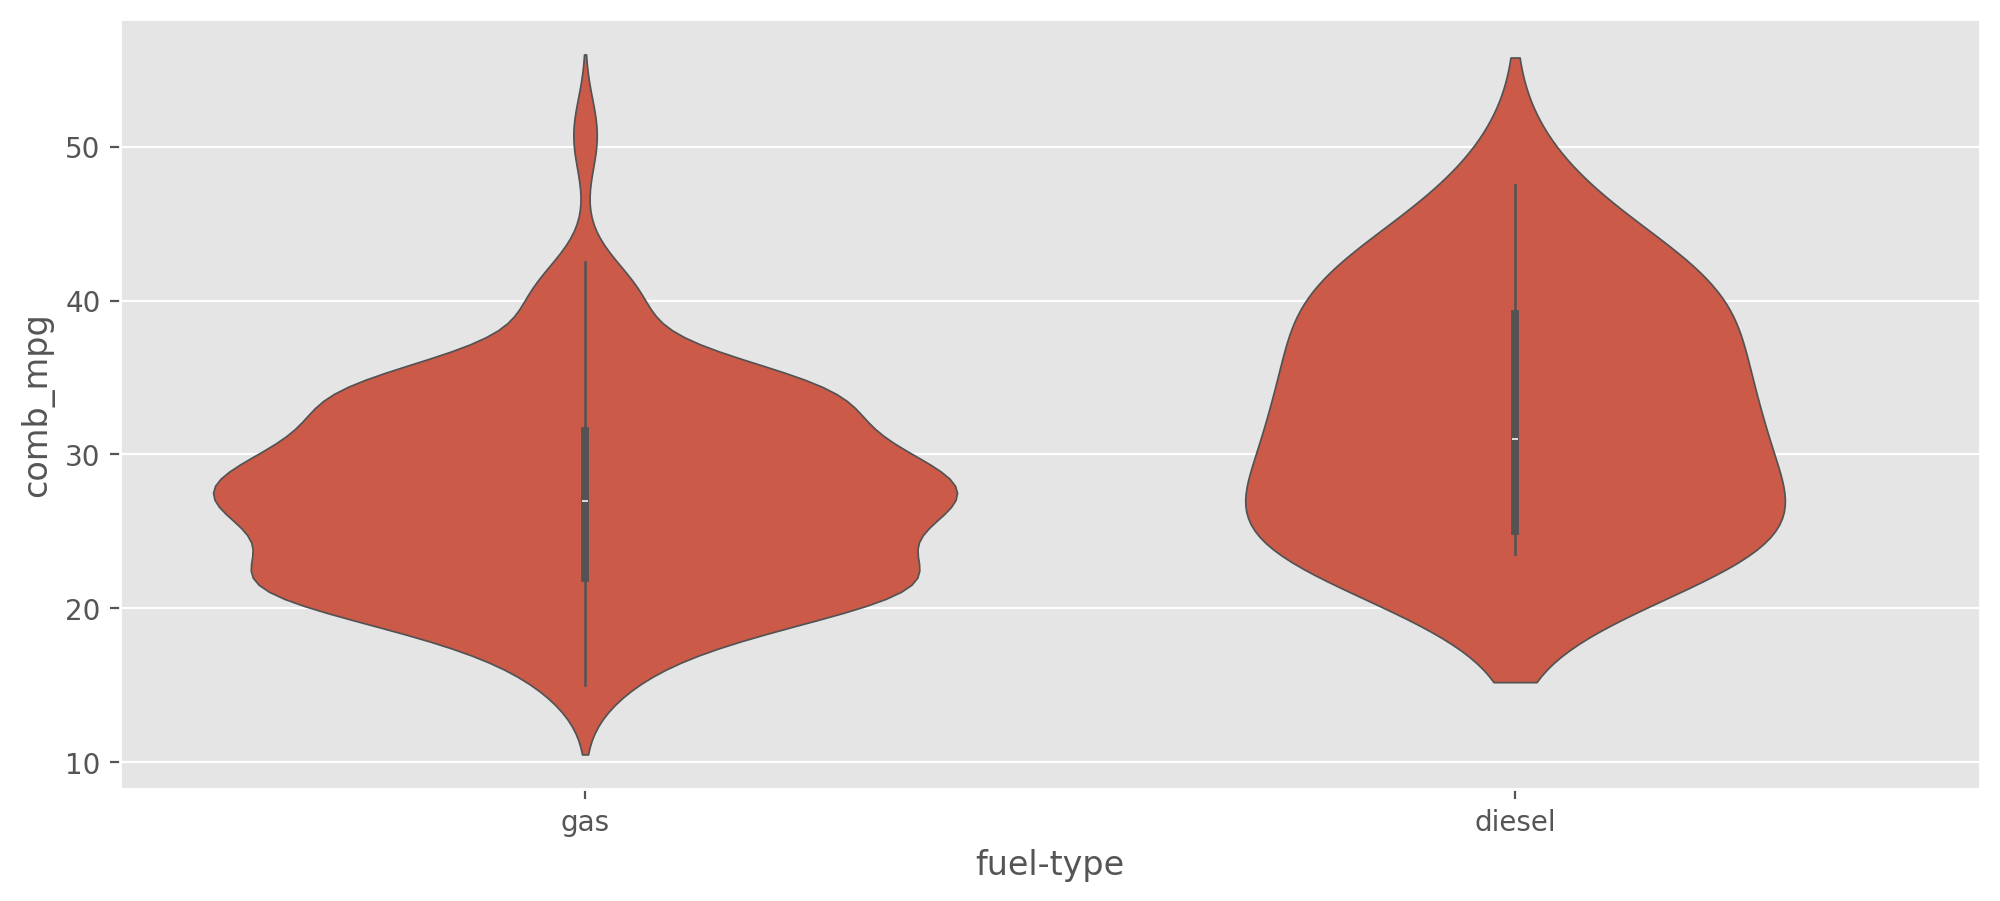

In [67]:
plt.figure(figsize = (12,5), dpi = 200)
sns.violinplot(x = 'fuel-type', y = 'comb_mpg', data = auto)

<Axes: xlabel='body-style', ylabel='price'>

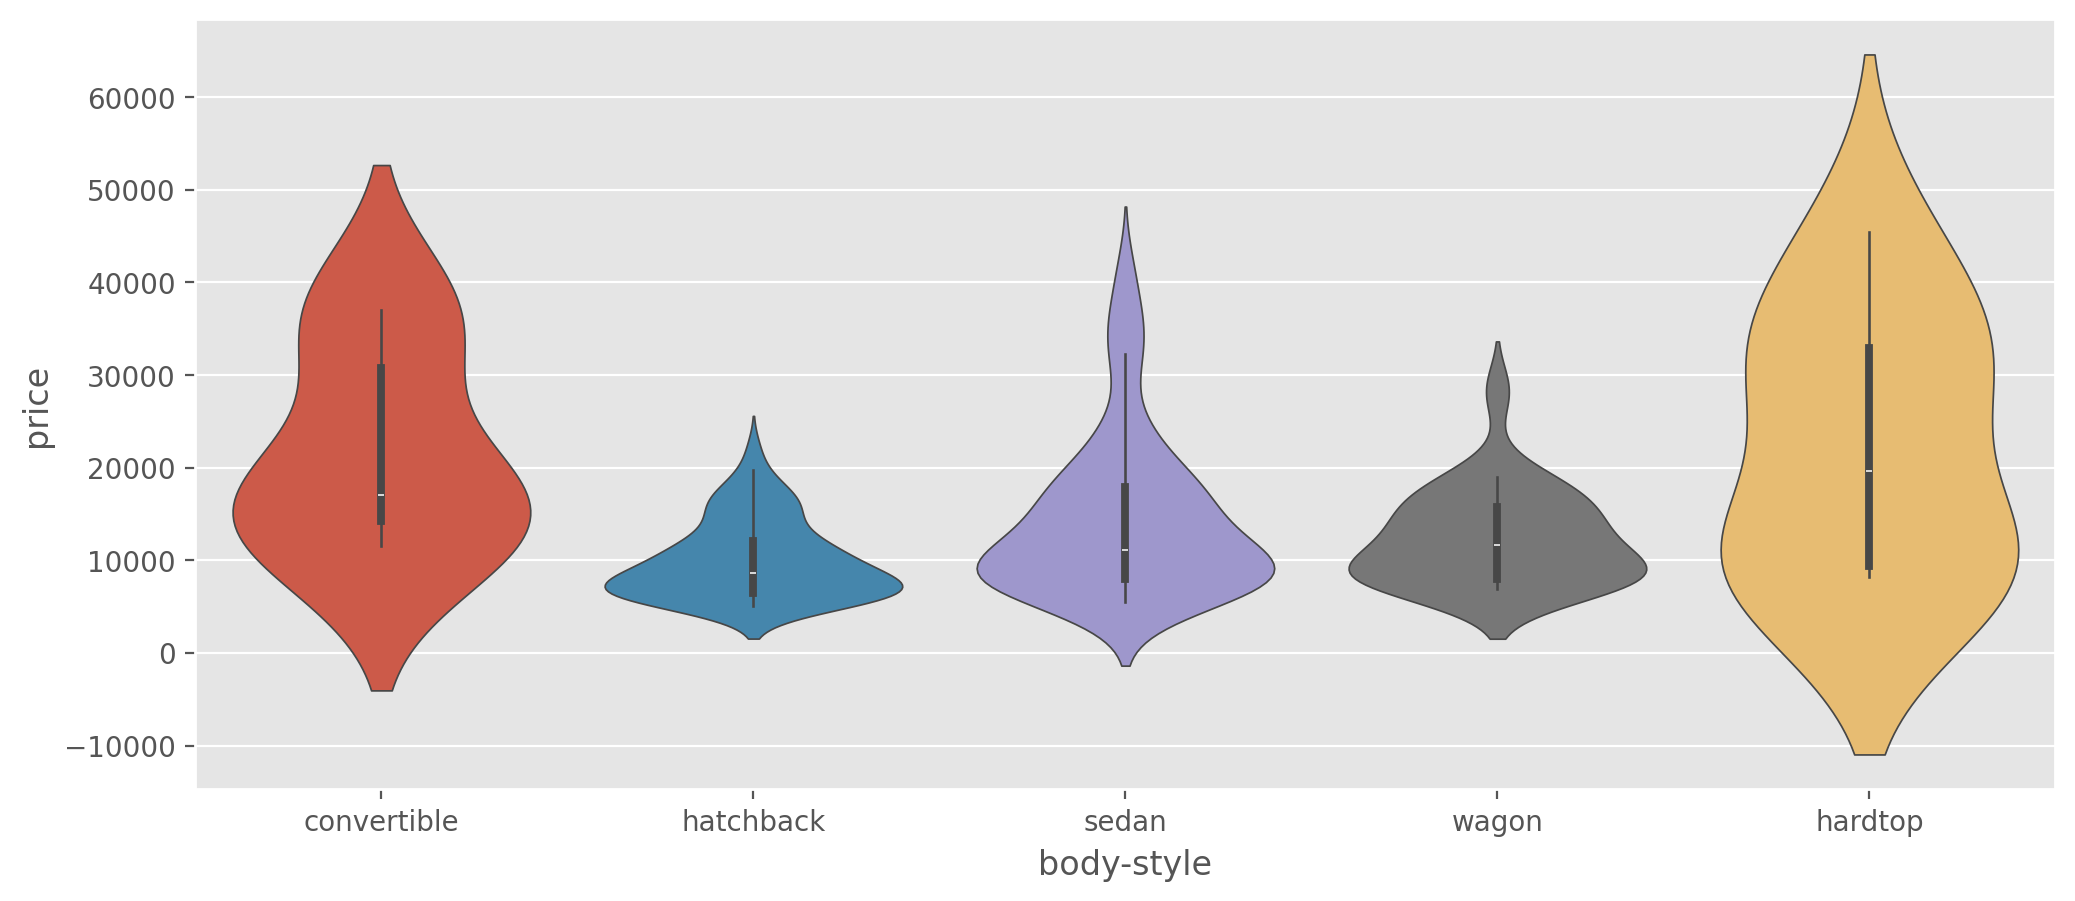

In [68]:
plt.figure(figsize = (12,5), dpi = 200)
sns.violinplot(x = 'body-style', y = 'price', data = auto, hue = 'body-style')

---
## heatmap

In [ ]:
auto

symboling normalized-losses         make fuel-type aspiration  \
0            3               NaN  alfa-romero       gas        std   
1            3               NaN  alfa-romero       gas        std   
2            1               NaN  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1            two  convertible          rwd           front        88.6  ...   
2            two    hatchback          rwd           front        94.5  ...   
3           four        sedan          fwd           front        99.8  ...   
4           four        sedan          4wd           front        99.4  ...   
..           ...          ...          ...             ...         ...  ...   
200         four        sedan          rwd           front       109.1  ...   
201         four        sedan          rwd           front       109.1  ...   
202         four        sedan          rwd           front       109.1  ...   
203         four        sedan          rwd           front       109.1  ...   
204         four        sedan          rwd           front       109.1  ...   

     fuel-system  bore  stroke  compression-ratio horsepower peak-rpm  \
0           mpfi  3.47    2.68                9.0      111.0   5000.0   
1           mpfi  3.47    2.68                9.0      111.0   5000.0   
2           mpfi  2.68    3.47                9.0      154.0   5000.0   
3           mpfi  3.19     3.4               10.0      102.0   5500.0   
4           mpfi  3.19     3.4                8.0      115.0   5500.0   
..           ...   ...     ...                ...        ...      ...   
200         mpfi  3.78    3.15                9.5      114.0   5400.0   
201         mpfi  3.78    3.15                8.7      160.0   5300.0   
202         mpfi  3.58    2.87                8.8      134.0   5500.0   
203          idi  3.01     3.4               23.0      106.0   4800.0   
204         mpfi  3.78    3.15                9.5      114.0   5400.0   

     city-mpg highway-mpg    price comb_mpg  
0          21          27  13495.0     24.0  
1          21          27  16500.0     24.0  
2          19          26  16500.0     22.5  
3          24          30  13950.0     27.0  
4          18          22  17450.0     20.0  
..        ...         ...      ...      ...  
200        23          28  16845.0     25.5  
201        19          25  19045.0     22.0  
202        18          23  21485.0     20.5  
203        26          27  22470.0     26.5  
204        19          25  22625.0     22.0  

[205 rows x 27 columns]

In [ ]:
auto.corr() # it taking all the data but we need to pass only numerical

ValueError: could not convert string to float: 'alfa-romero'

In [69]:
#create a list which has only numerical data
cols = ['engine-size', 'curb-weight', 'city-mpg', 'highway-mpg', 'comb_mpg', 'horsepower', 'peak-rpm', 'price']
auto[cols].corr()

engine-size  curb-weight  city-mpg  highway-mpg  comb_mpg  \
engine-size     1.000000     0.850594 -0.653658    -0.677470 -0.670689   
curb-weight     0.850594     1.000000 -0.757414    -0.797465 -0.783584   
city-mpg       -0.653658    -0.757414  1.000000     0.971337  0.992434   
highway-mpg    -0.677470    -0.797465  0.971337     1.000000  0.993174   
comb_mpg       -0.670689    -0.783584  0.992434     0.993174  1.000000   
horsepower      0.810773     0.751034 -0.803620    -0.770908 -0.792399   
peak-rpm       -0.244618    -0.266306 -0.113788    -0.054257 -0.083839   
price           0.872335     0.834415 -0.686571    -0.704692 -0.700811   

             horsepower  peak-rpm     price  
engine-size    0.810773 -0.244618  0.872335  
curb-weight    0.751034 -0.266306  0.834415  
city-mpg      -0.803620 -0.113788 -0.686571  
highway-mpg   -0.770908 -0.054257 -0.704692  
comb_mpg      -0.792399 -0.083839 -0.700811  
horsepower     1.000000  0.130971  0.810533  
peak-rpm       0.130971  1.000000 -0.101649  
price          0.810533 -0.101649  1.000000

In [ ]:
plt.figure(figsize = (20,10), dpi = 200)
sns.heatmap(auto.corr(), annot = True)

ValueError: could not convert string to float: 'alfa-romero'

<Figure size 4000x2000 with 0 Axes>

In [71]:
sns.heatmap?

<Axes: >

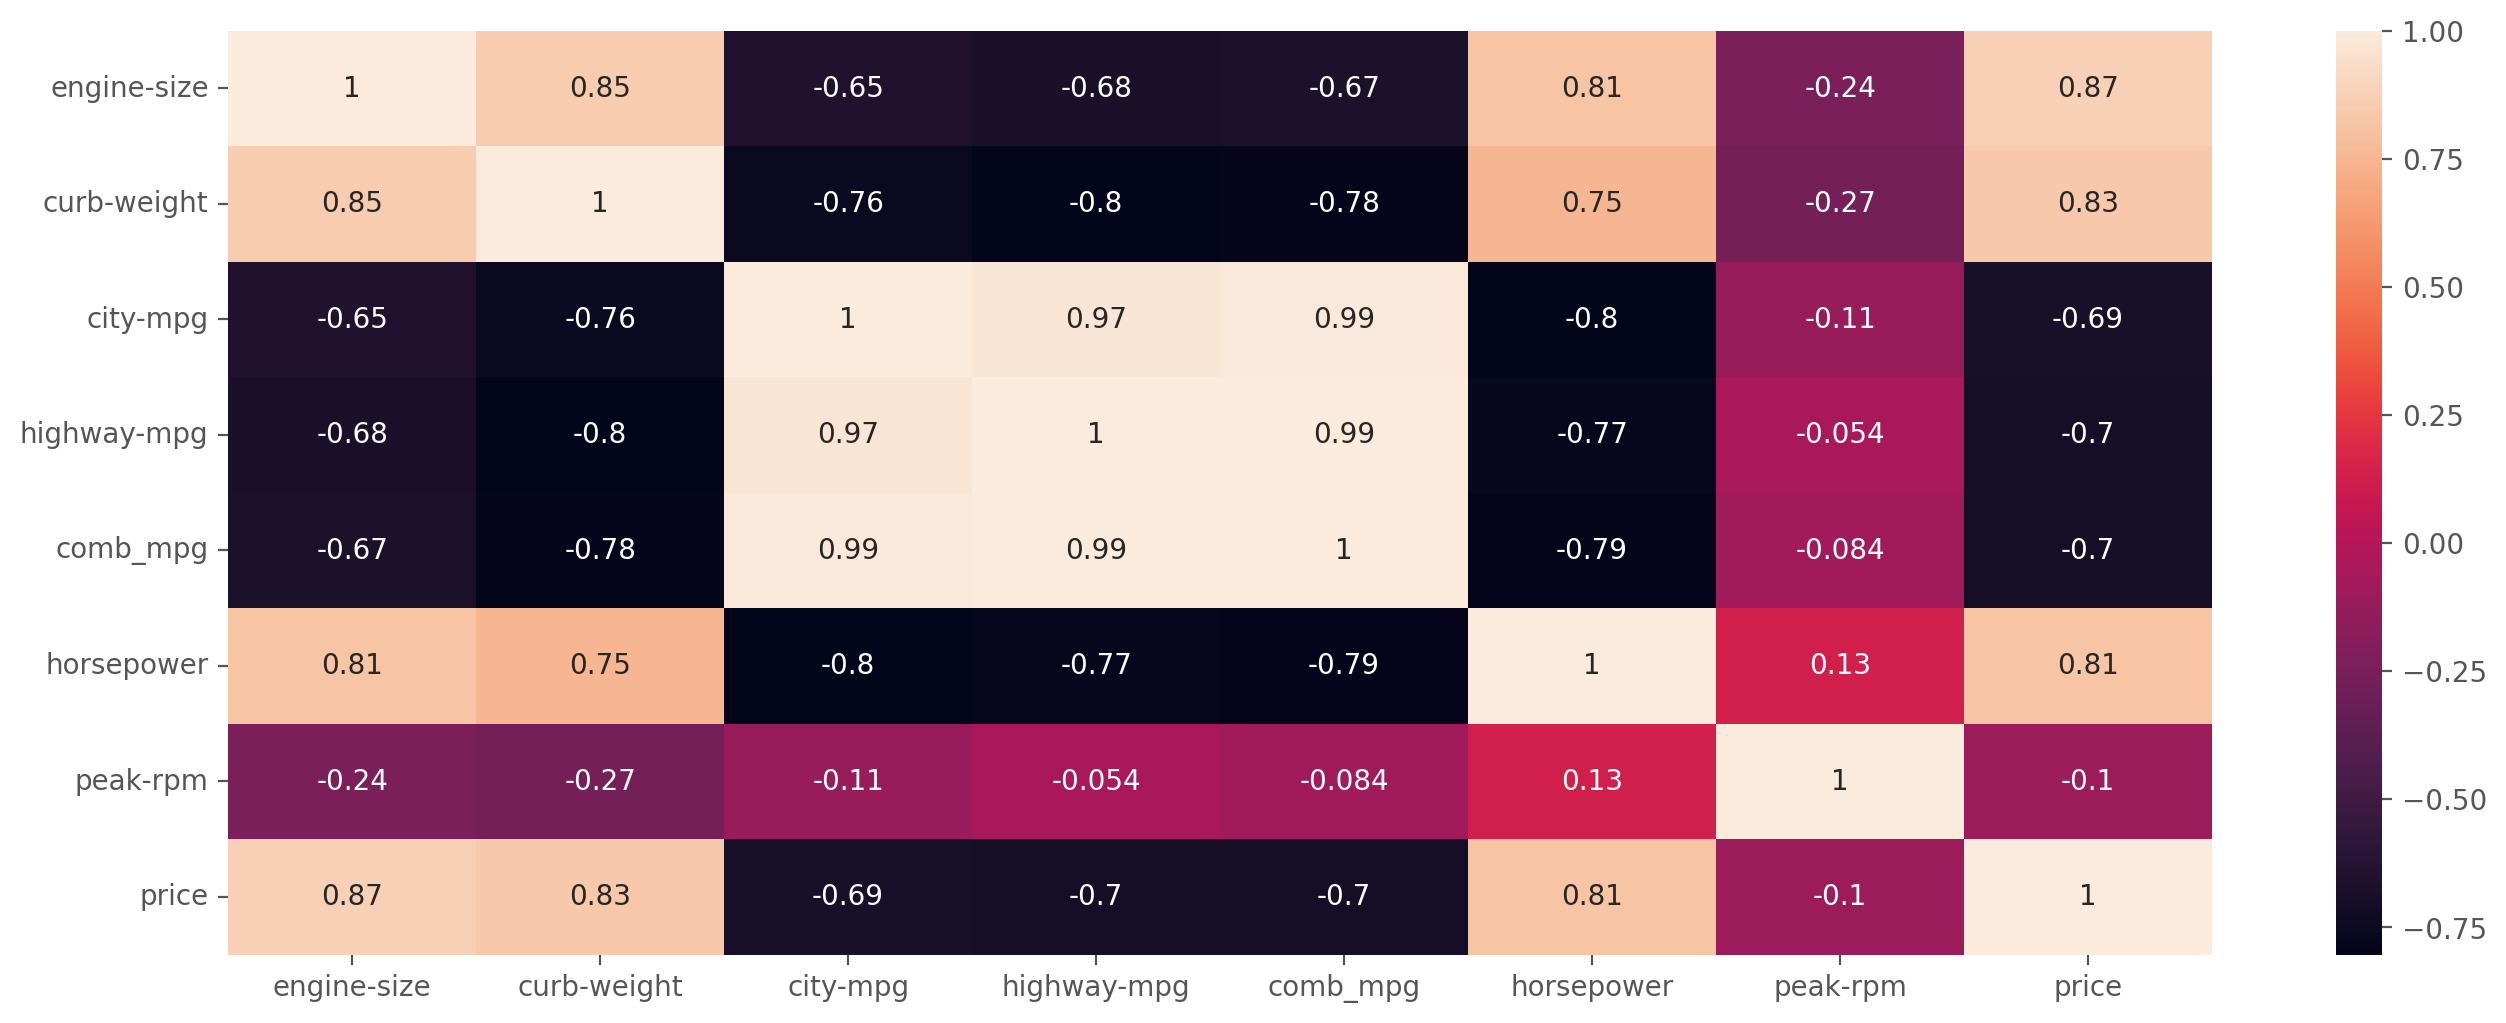

In [73]:
plt.figure(figsize = (16,6), dpi = 200)
sns.heatmap(auto[cols].corr(), annot = True)

<Axes: >

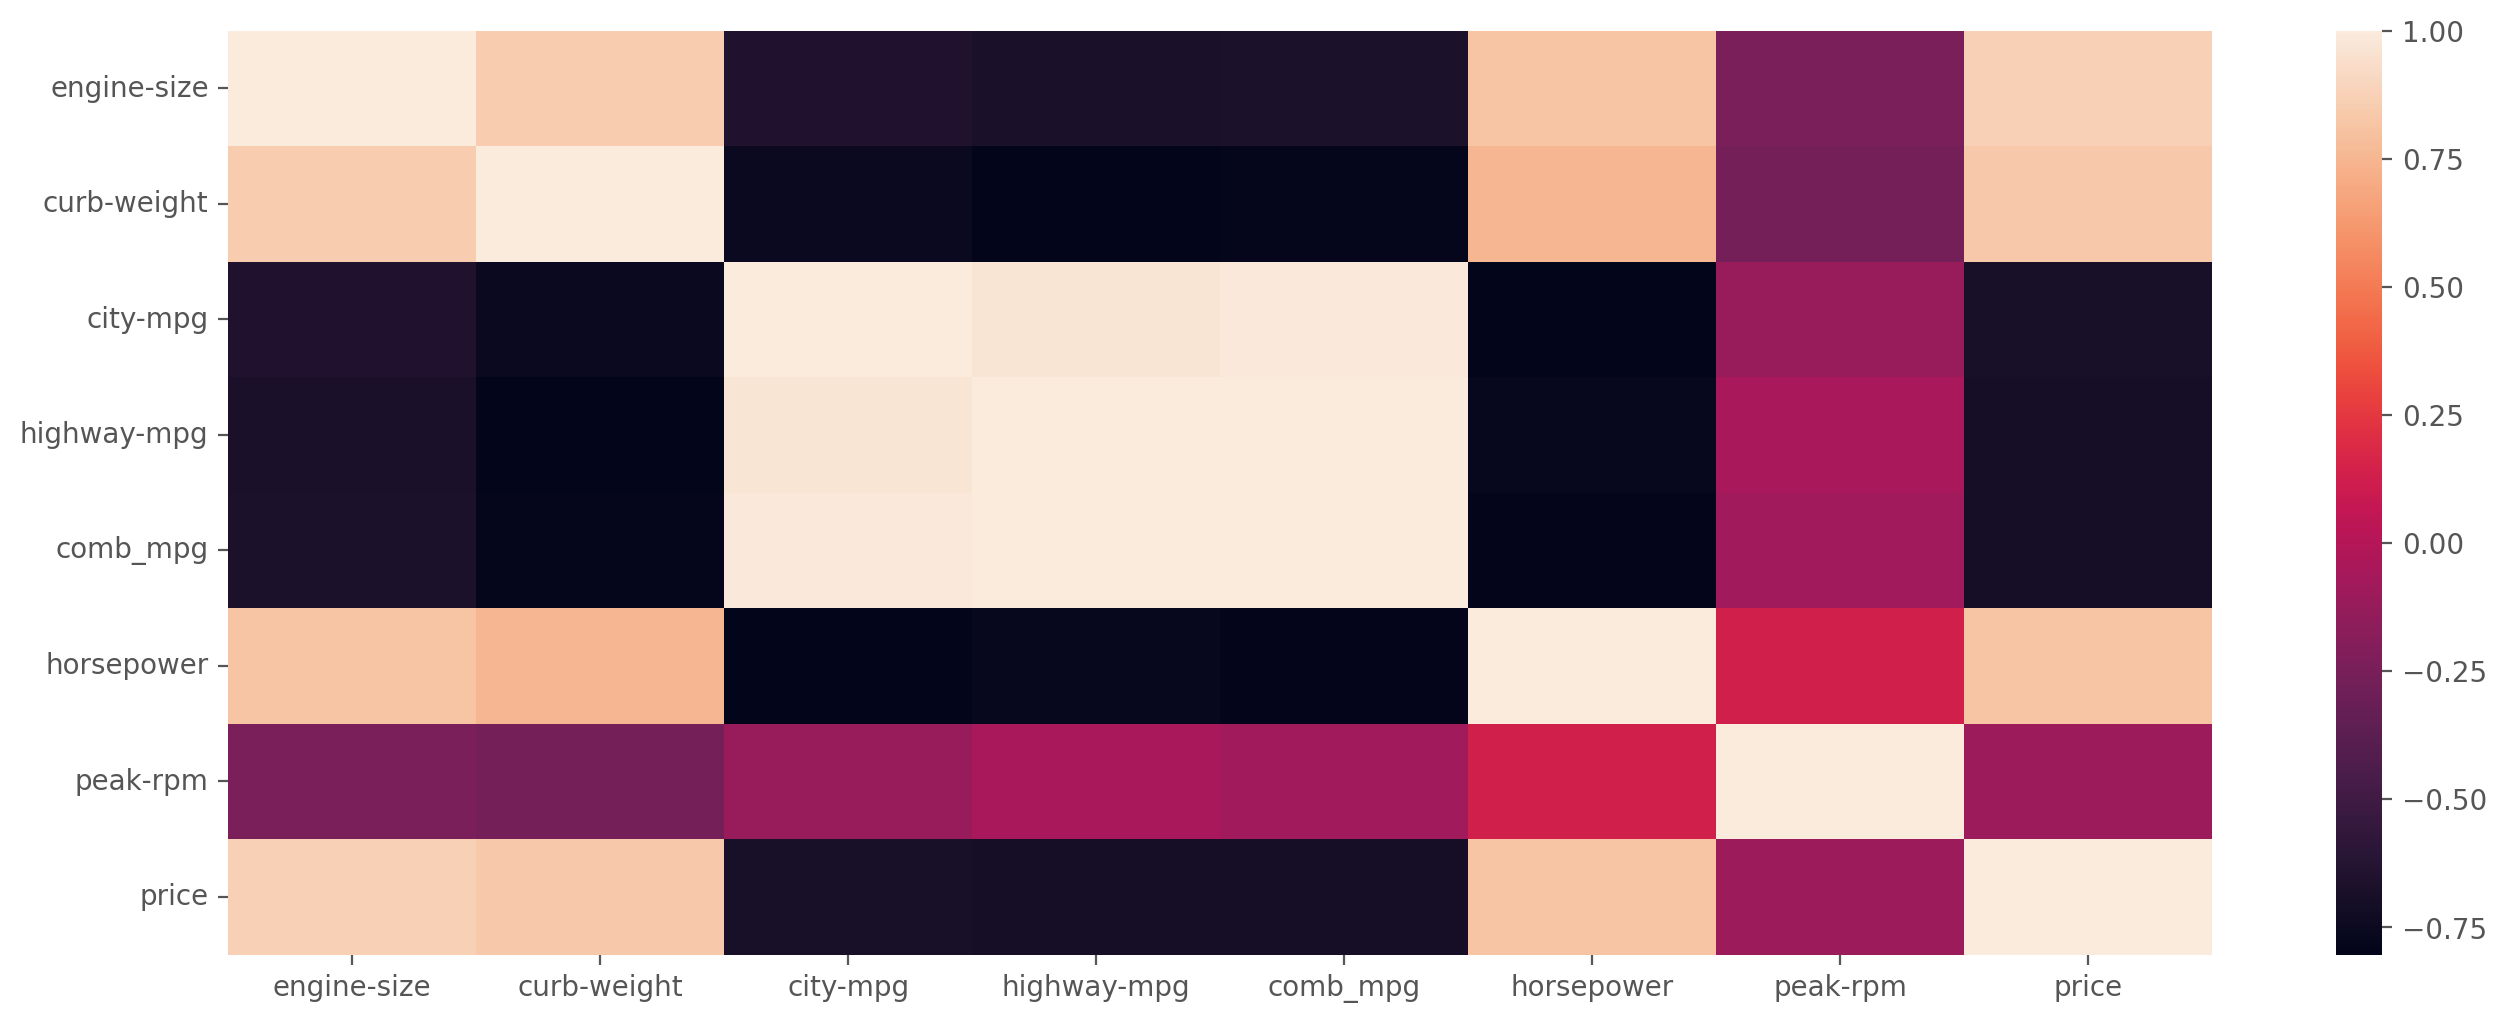

In [74]:
plt.figure(figsize = (16,6), dpi = 200)
sns.heatmap(auto[cols].corr(), annot = False)

## Distplot
- Used to plot distribution of a continuous numerical variable

<Axes: xlabel='price', ylabel='Density'>

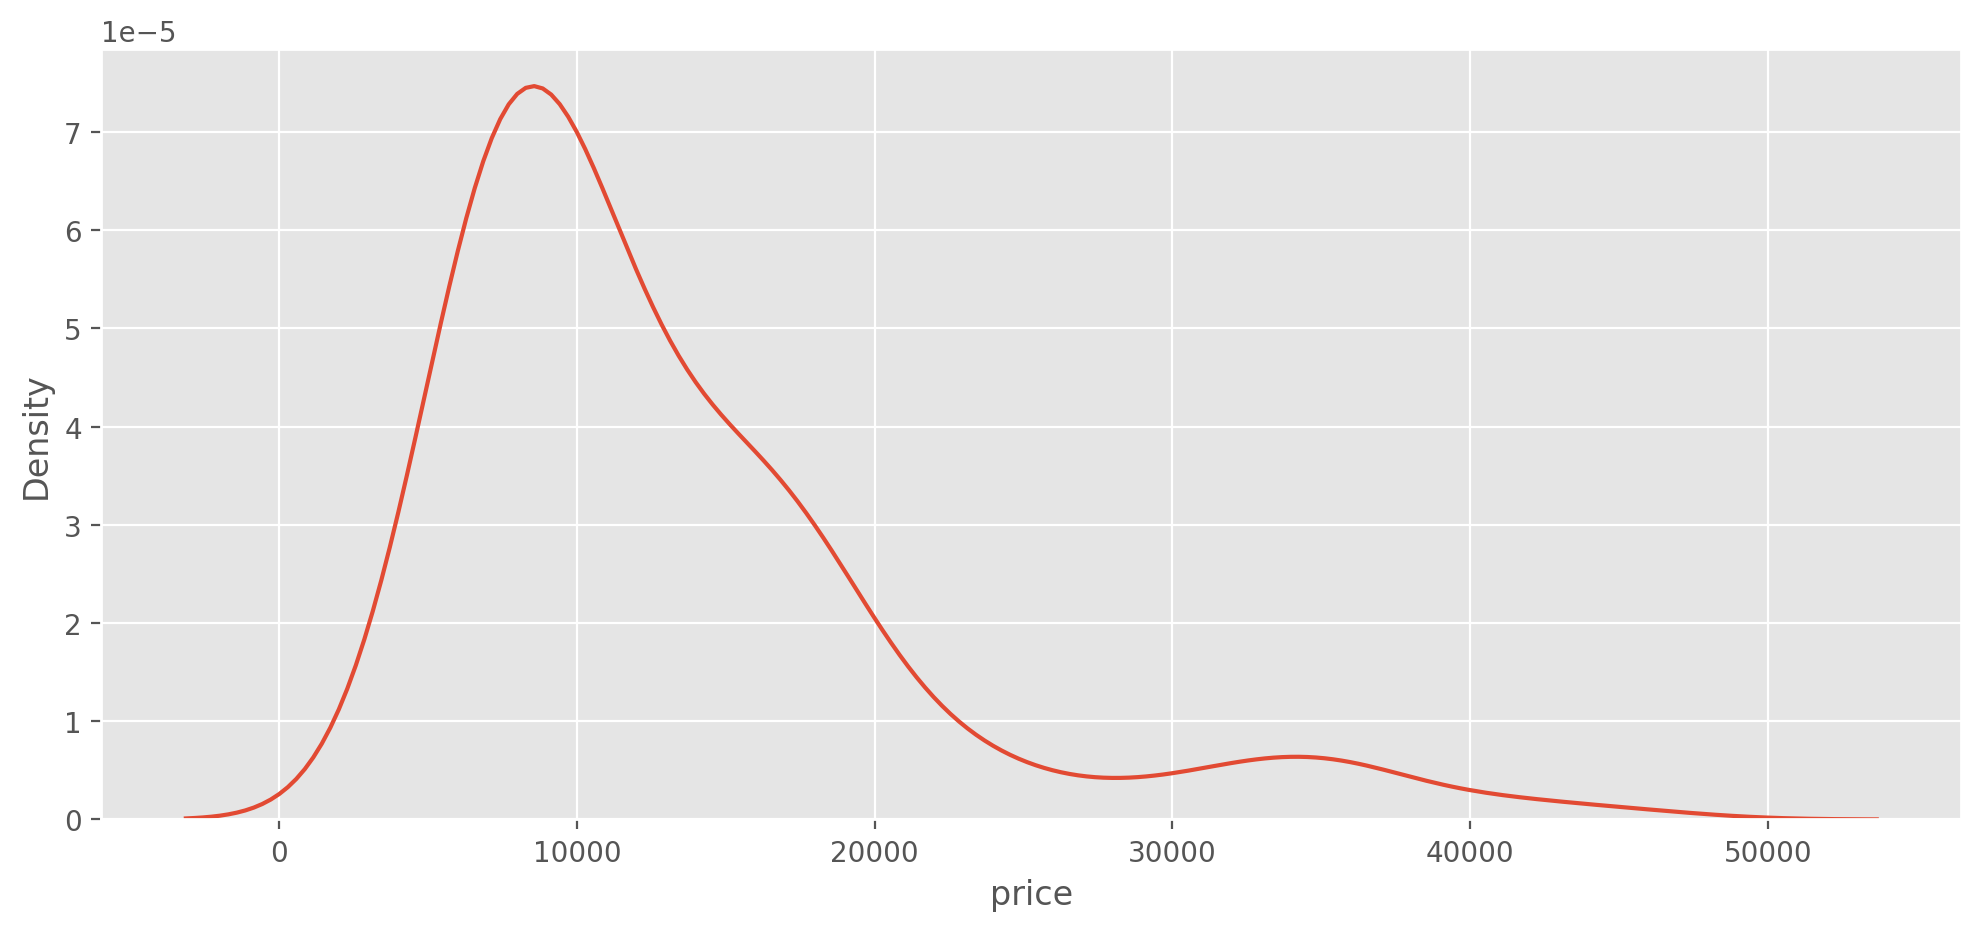

In [76]:
plt.figure(figsize = (12,5), dpi = 200)
sns.distplot(auto.price, hist = False)

<Axes: xlabel='horsepower', ylabel='Density'>

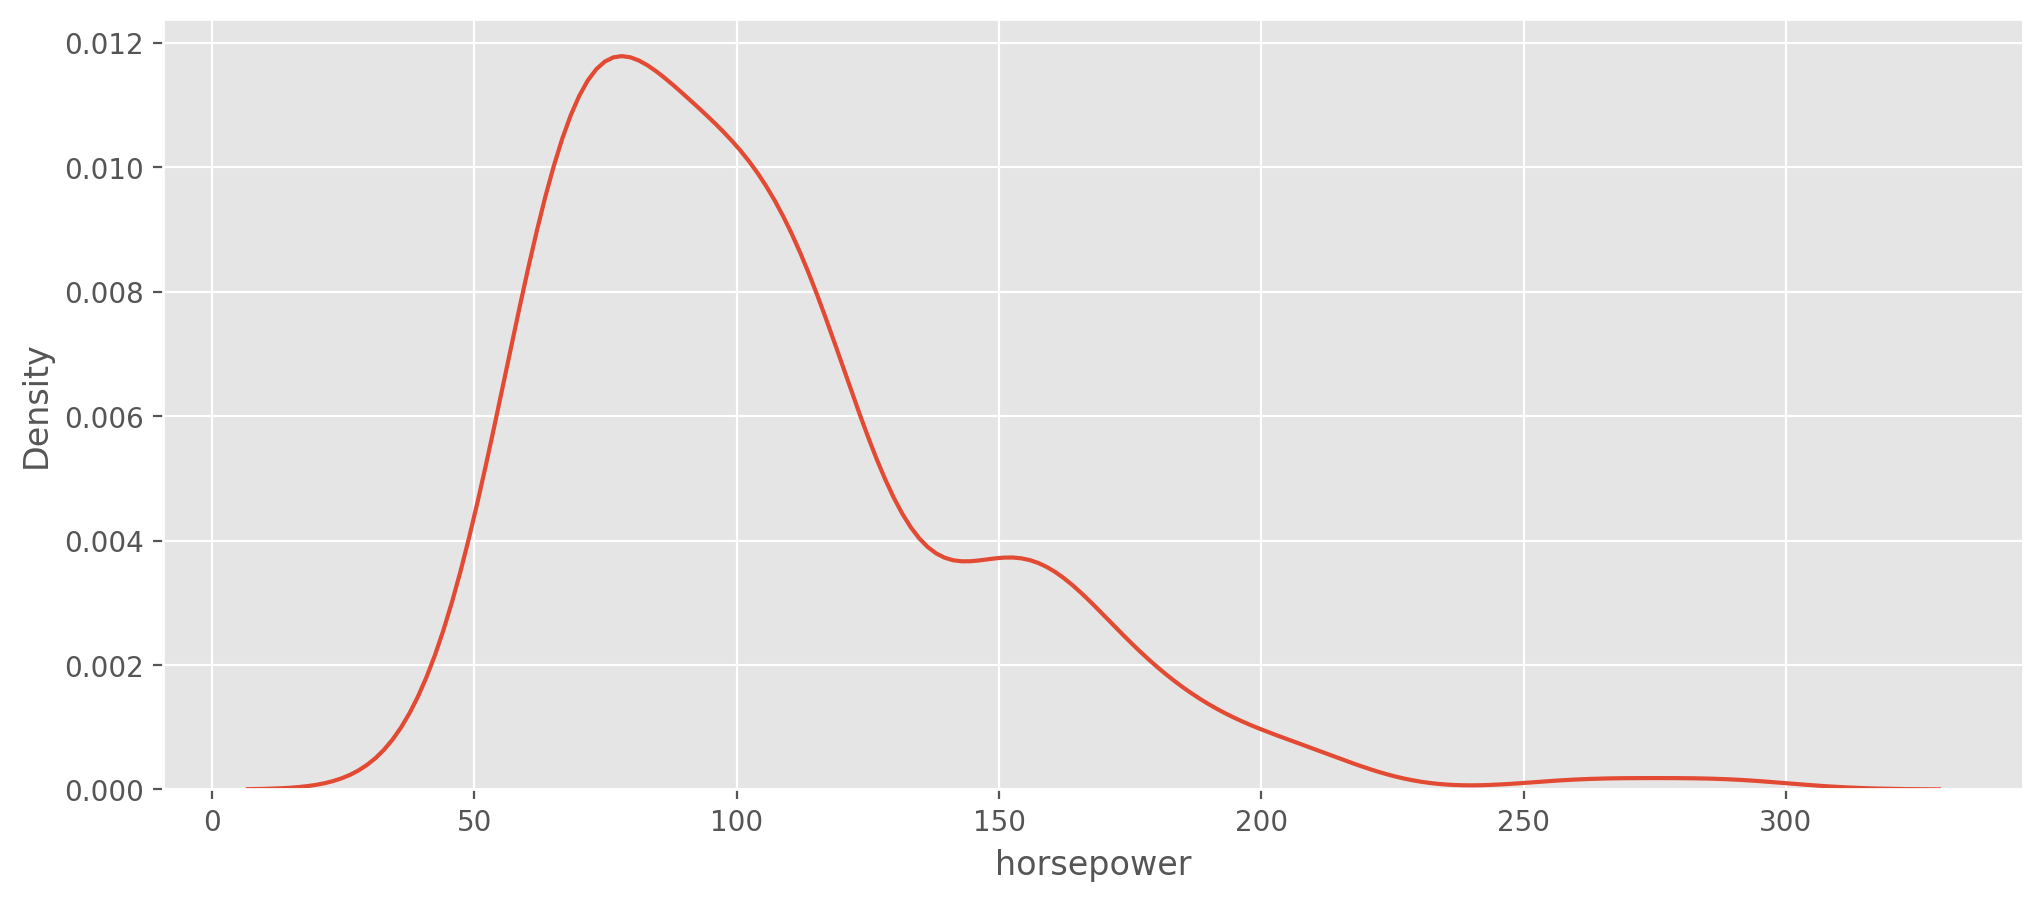

In [77]:
plt.figure(figsize = (12,5), dpi = 200)
sns.distplot(auto.horsepower, hist = False)

----
----

## Pairplot

In [84]:
sns.pairplot?

<Axes: xlabel='engine-size', ylabel='Density'>

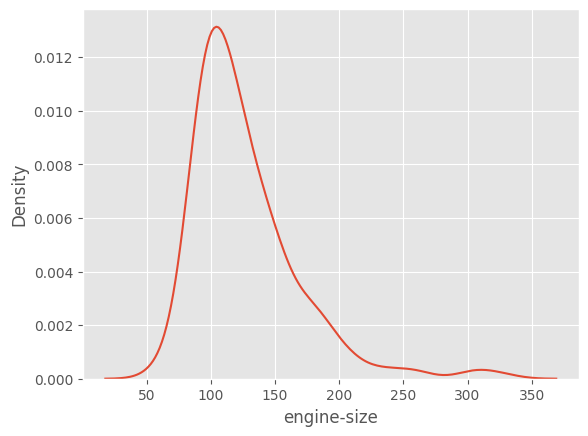

In [86]:
sns.distplot(auto['engine-size'], hist = False)

<Figure size 640x480 with 0 Axes>

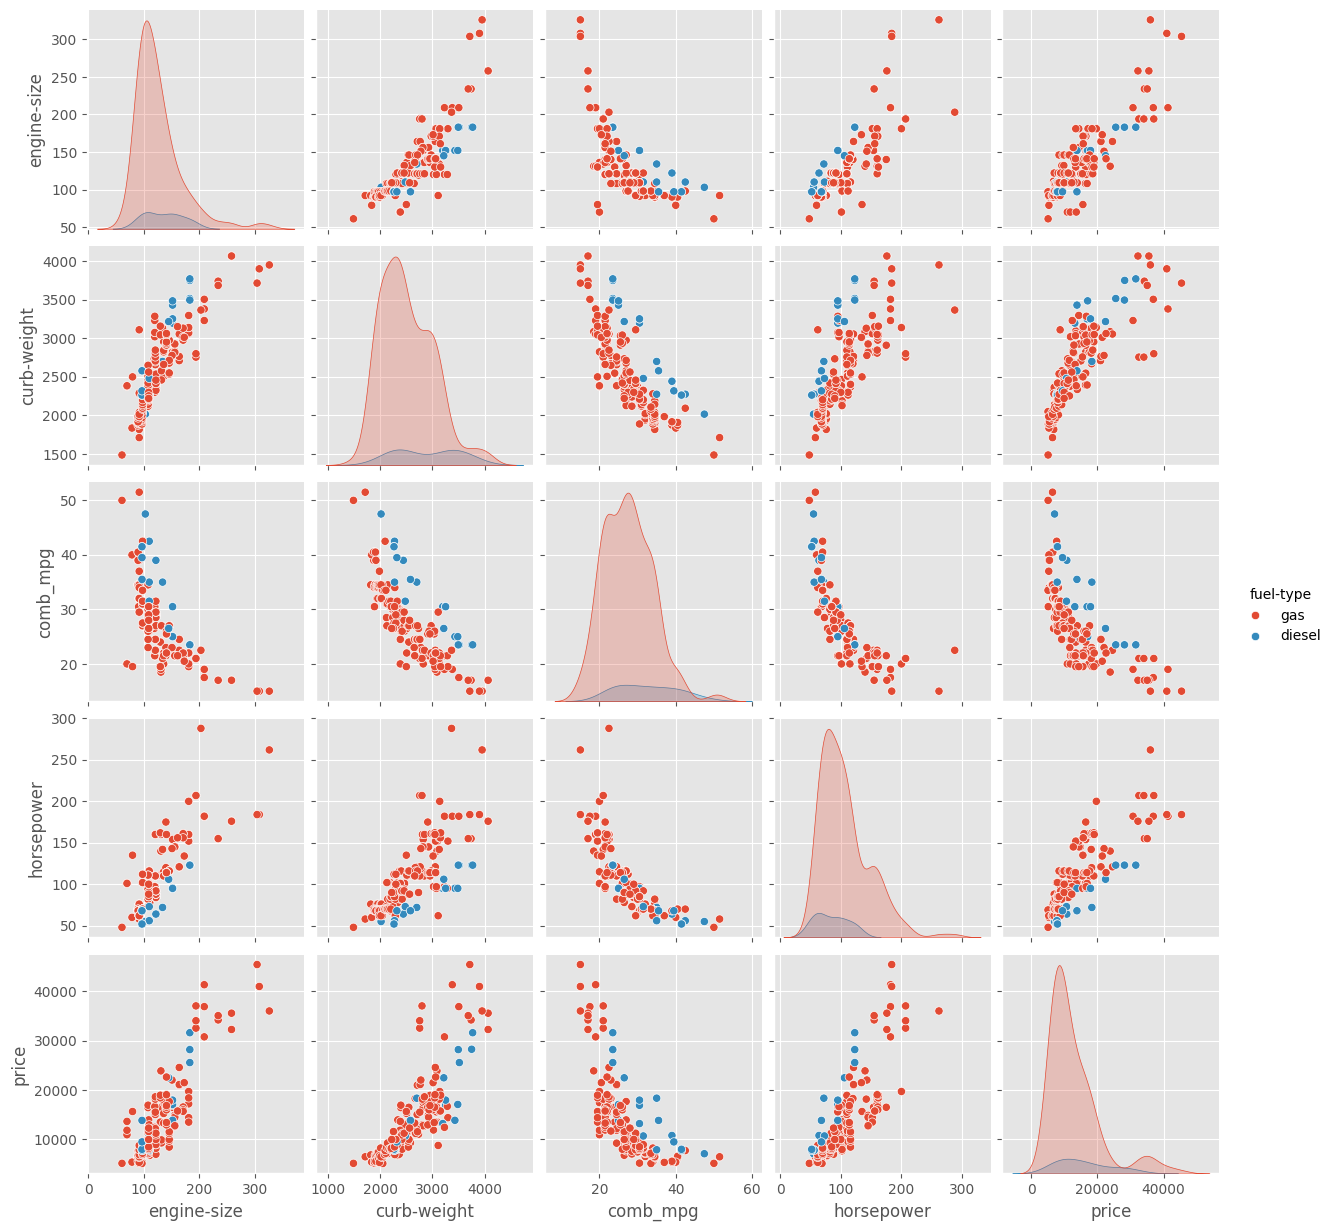

In [79]:
cols = ['engine-size', 'curb-weight', 'comb_mpg', 'horsepower', 'price', 'fuel-type']
plt.figure()
sns.pairplot(auto[cols], hue = 'fuel-type')

<Figure size 640x480 with 0 Axes>

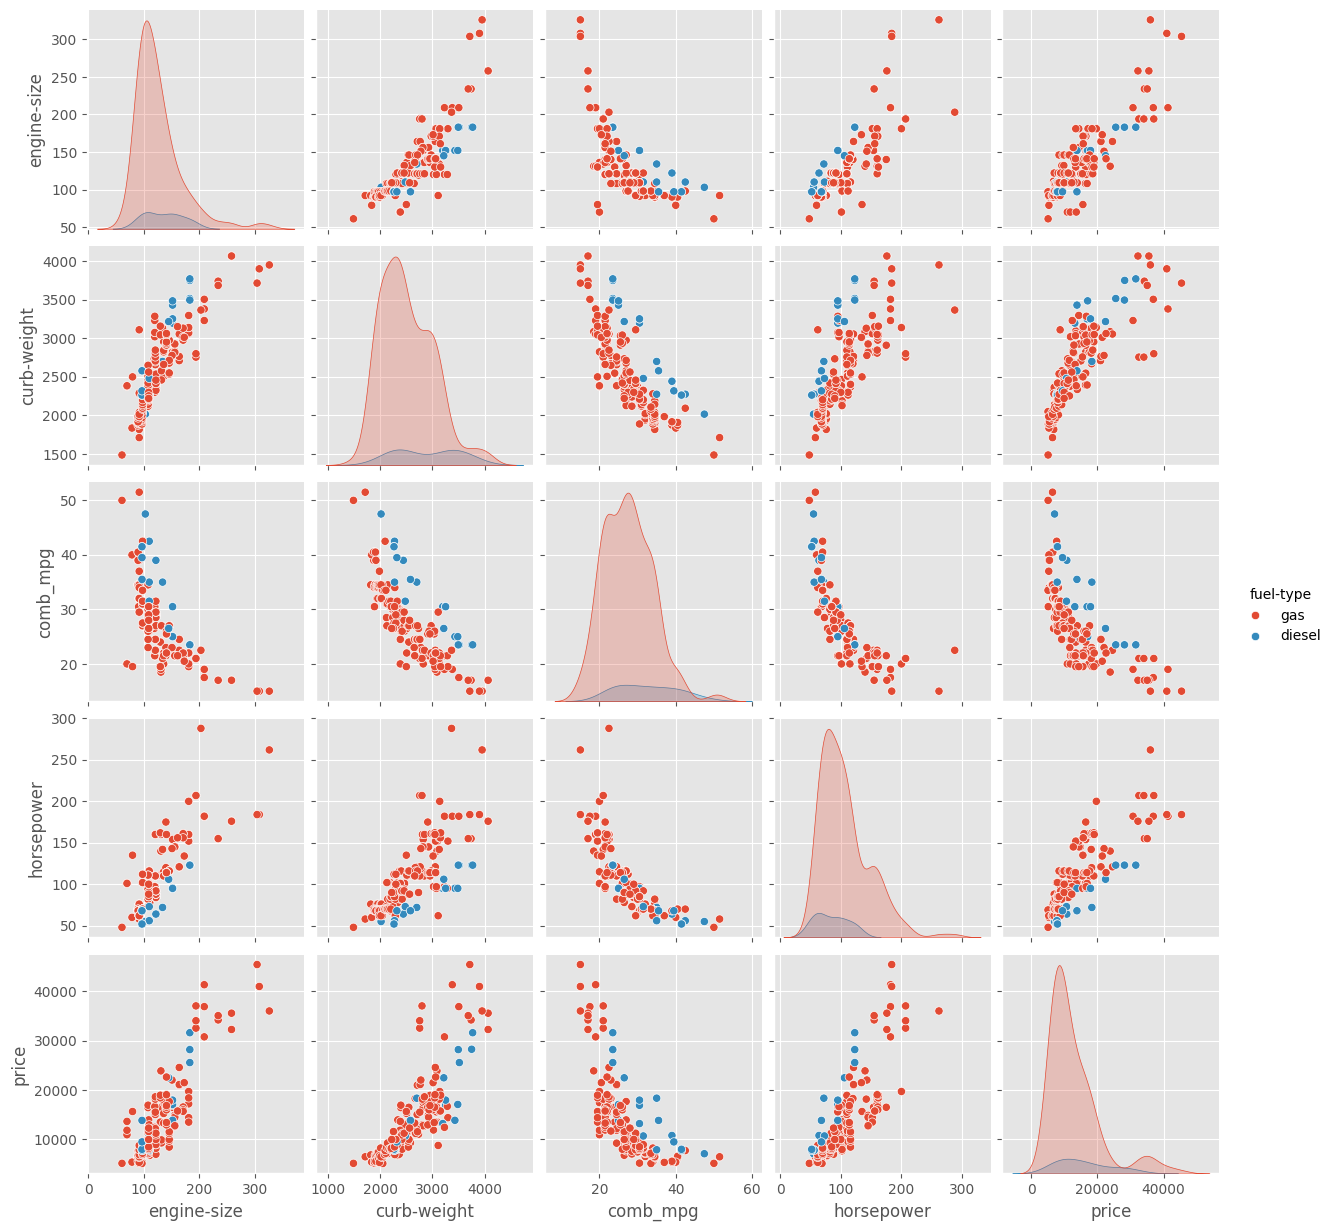

In [ ]:
# Saving a figure
cols = ['engine-size', 'curb-weight', 'comb_mpg', 'horsepower', 'price', 'fuel-type']
plt.figure()
sns.pairplot(auto[cols], hue = 'fuel-type')
plt.savefig('pairplot', dpi = 1000)

### Relplot

In [87]:
sns.relplot?

<Figure size 3200x2400 with 0 Axes>

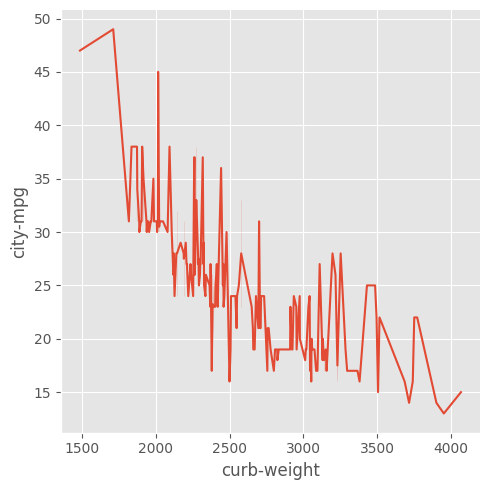

In [ ]:
plt.figure(dpi = 500)
sns.relplot(x = 'curb-weight', y = 'city-mpg', data = auto, kind = 'line')

<Figure size 3200x2400 with 0 Axes>

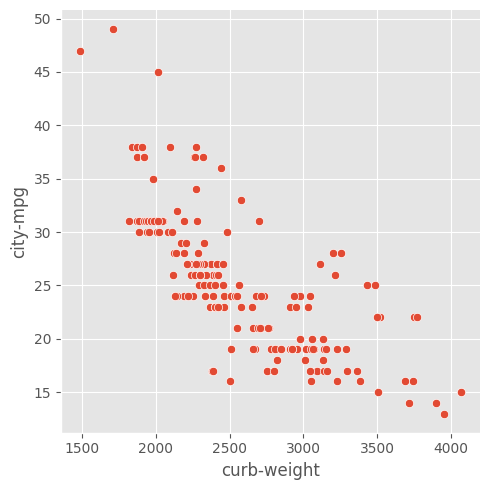

In [88]:
plt.figure(dpi = 500)
sns.relplot(x = 'curb-weight', y = 'city-mpg', data = auto, kind = 'scatter')

<Figure size 3200x2400 with 0 Axes>

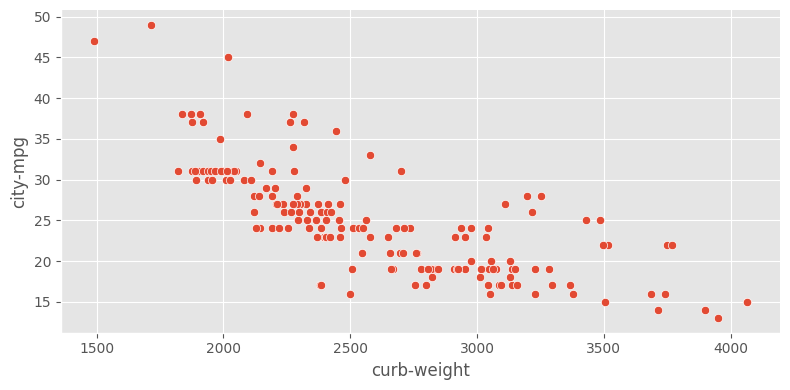

In [91]:
plt.figure(dpi = 500)
sns.relplot(x = 'curb-weight', y = 'city-mpg', data = auto, kind = 'scatter', height = 4, aspect = 2)

<Figure size 3200x2400 with 0 Axes>

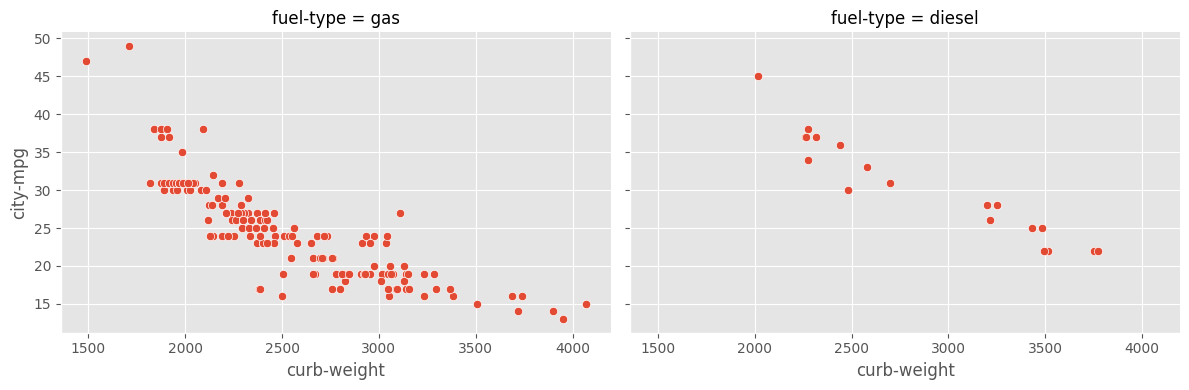

In [ ]:
plt.figure(dpi = 500)
sns.relplot(x = 'curb-weight', y = 'city-mpg', data = auto, kind = 'scatter', height = 4, aspect = 1.5, col = 'fuel-type')

<Figure size 3200x2400 with 0 Axes>

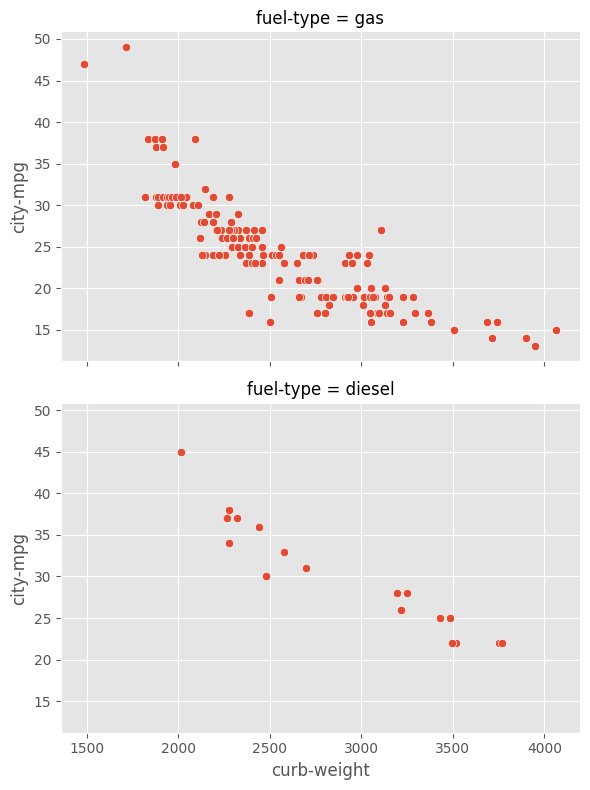

In [ ]:
plt.figure(dpi = 500)
sns.relplot(x = 'curb-weight', y = 'city-mpg', data = auto, kind = 'scatter', height = 4, aspect = 1.5, row = 'fuel-type')

<Figure size 3200x2400 with 0 Axes>

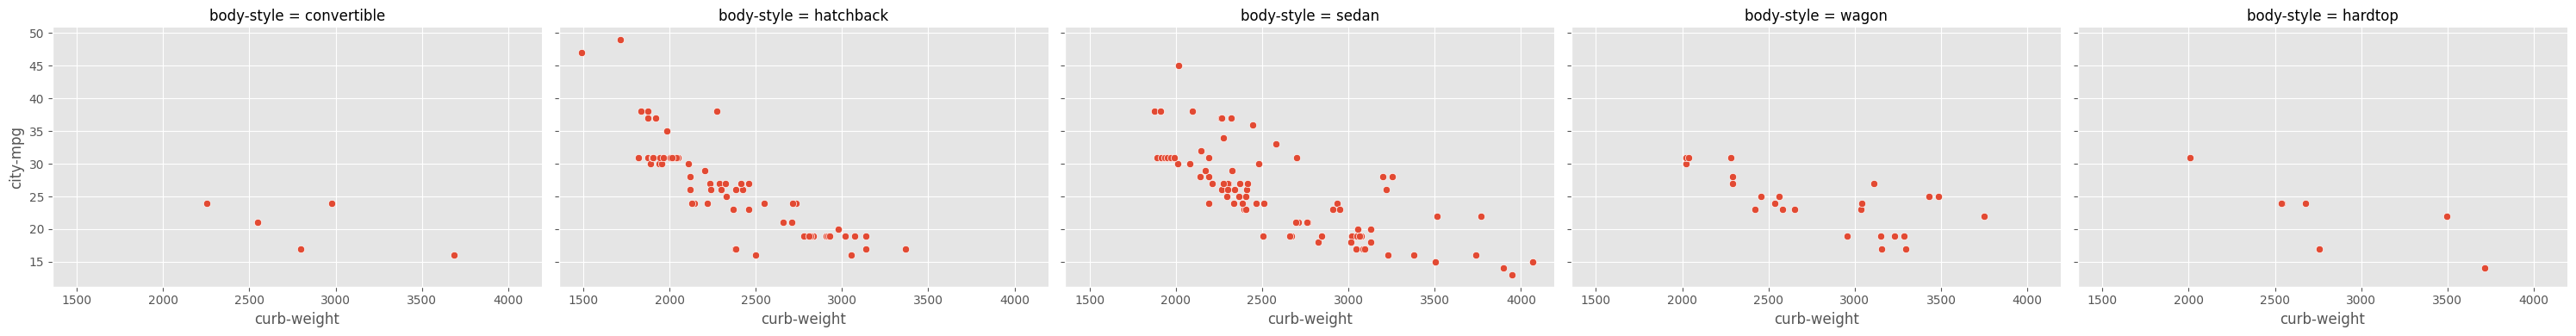

In [ ]:
plt.figure(dpi = 500)
sns.relplot(x = 'curb-weight', y = 'city-mpg', data = auto, kind = 'scatter', height = 4, aspect = 1.5, col = 'body-style')

<Figure size 3200x2400 with 0 Axes>

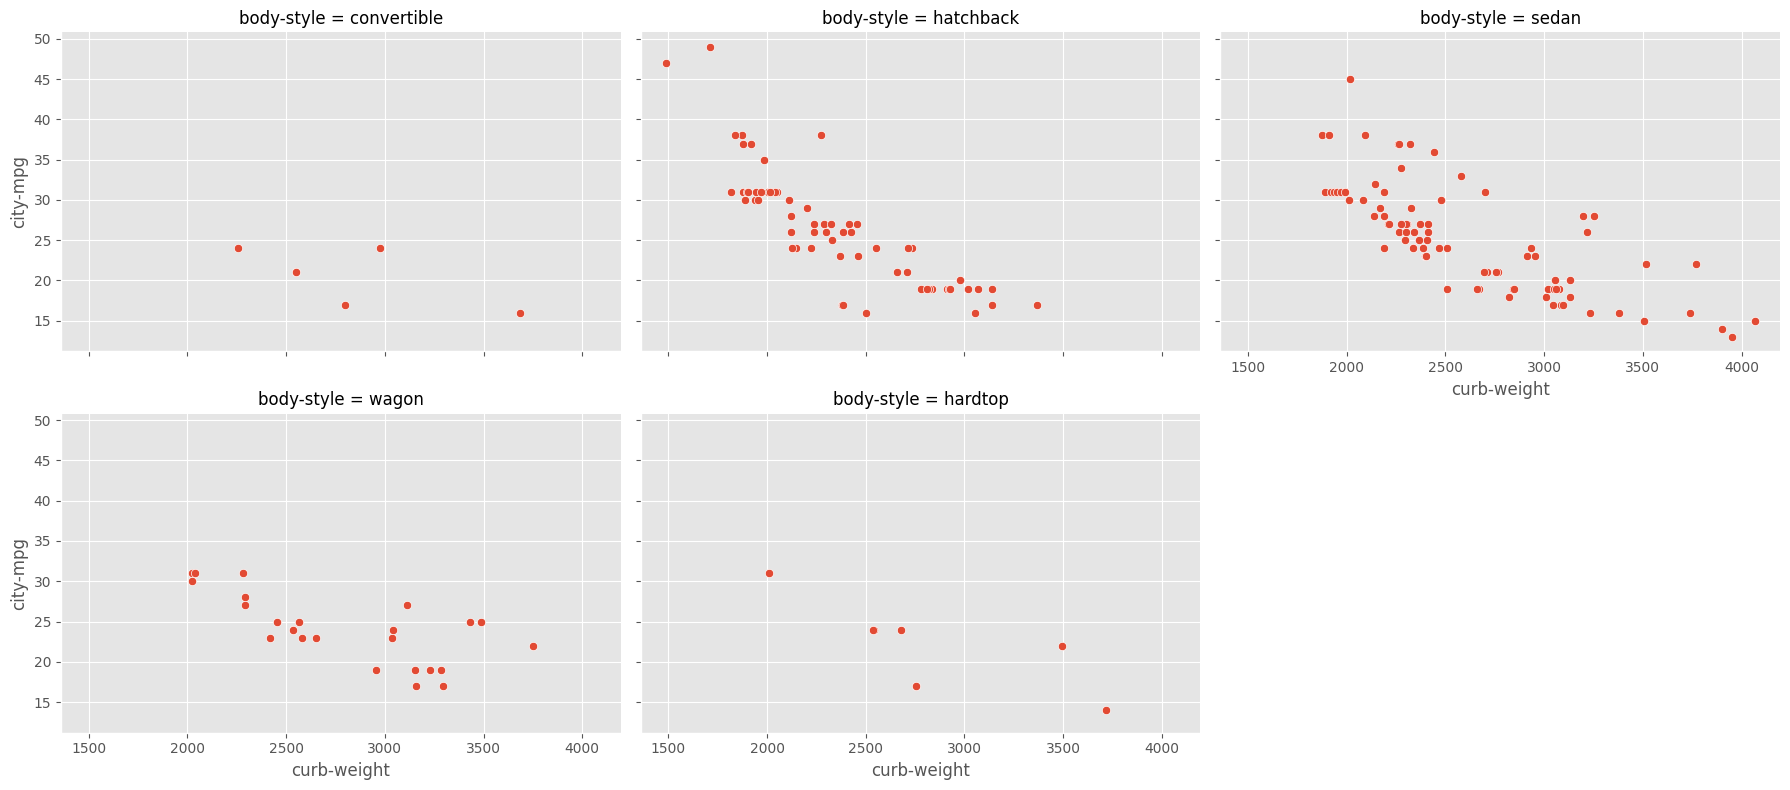

In [ ]:
plt.figure(dpi = 500)
sns.relplot(x = 'curb-weight', y = 'city-mpg', data = auto, kind = 'scatter', height = 4, aspect = 1.5, col = 'body-style', col_wrap = 3)

<Figure size 3200x2400 with 0 Axes>

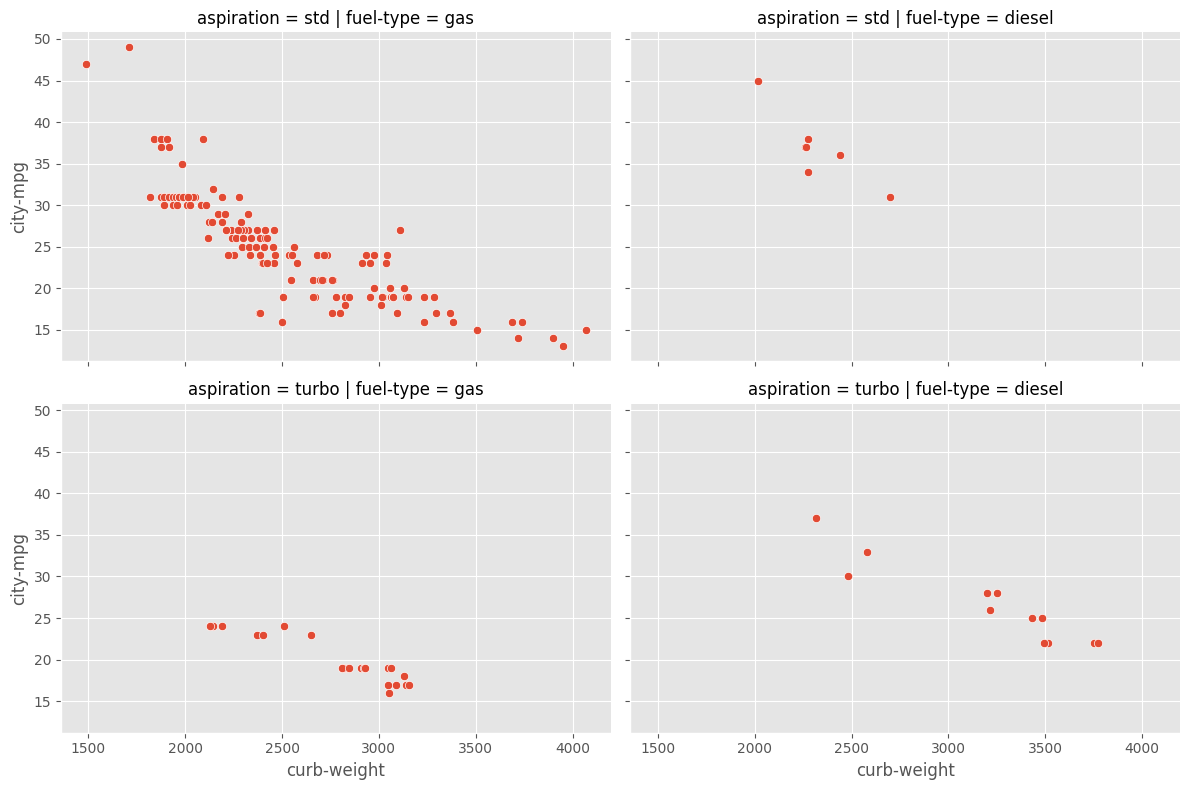

In [ ]:
plt.figure(dpi = 500)
sns.relplot(x = 'curb-weight', y = 'city-mpg', data = auto, kind = 'scatter', height = 4, aspect = 1.5, col = 'fuel-type', row = 'aspiration')

----
### Creating subplots

<Axes: ylabel='horsepower'>

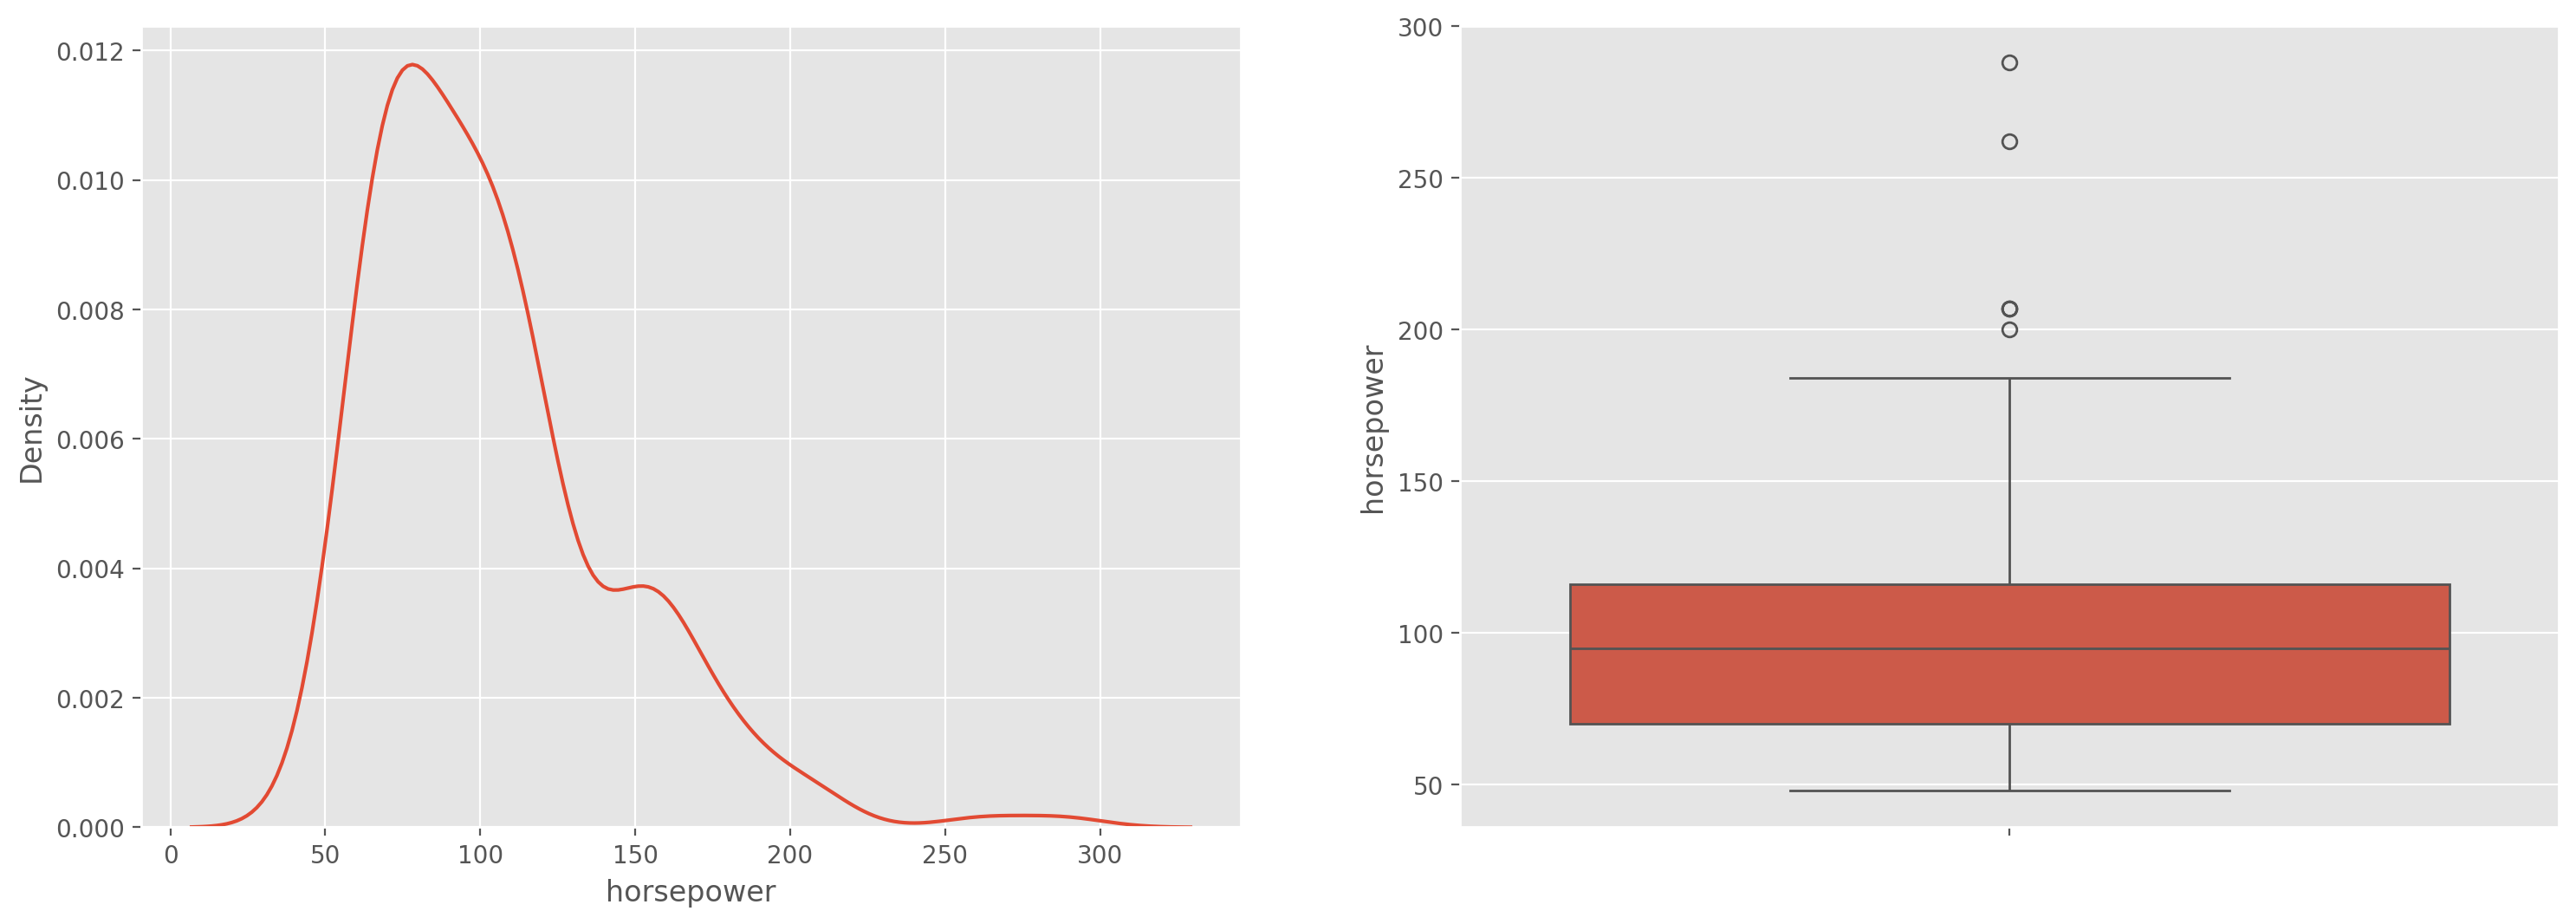

In [ ]:
plt.figure(figsize = (18,6), dpi = 200)

plt.subplot(1,2,1)
sns.distplot(auto.horsepower, hist = False)
plt.subplot(1,2,2)
sns.boxplot(y = auto.horsepower)

<Axes: xlabel='body-style', ylabel='price'>

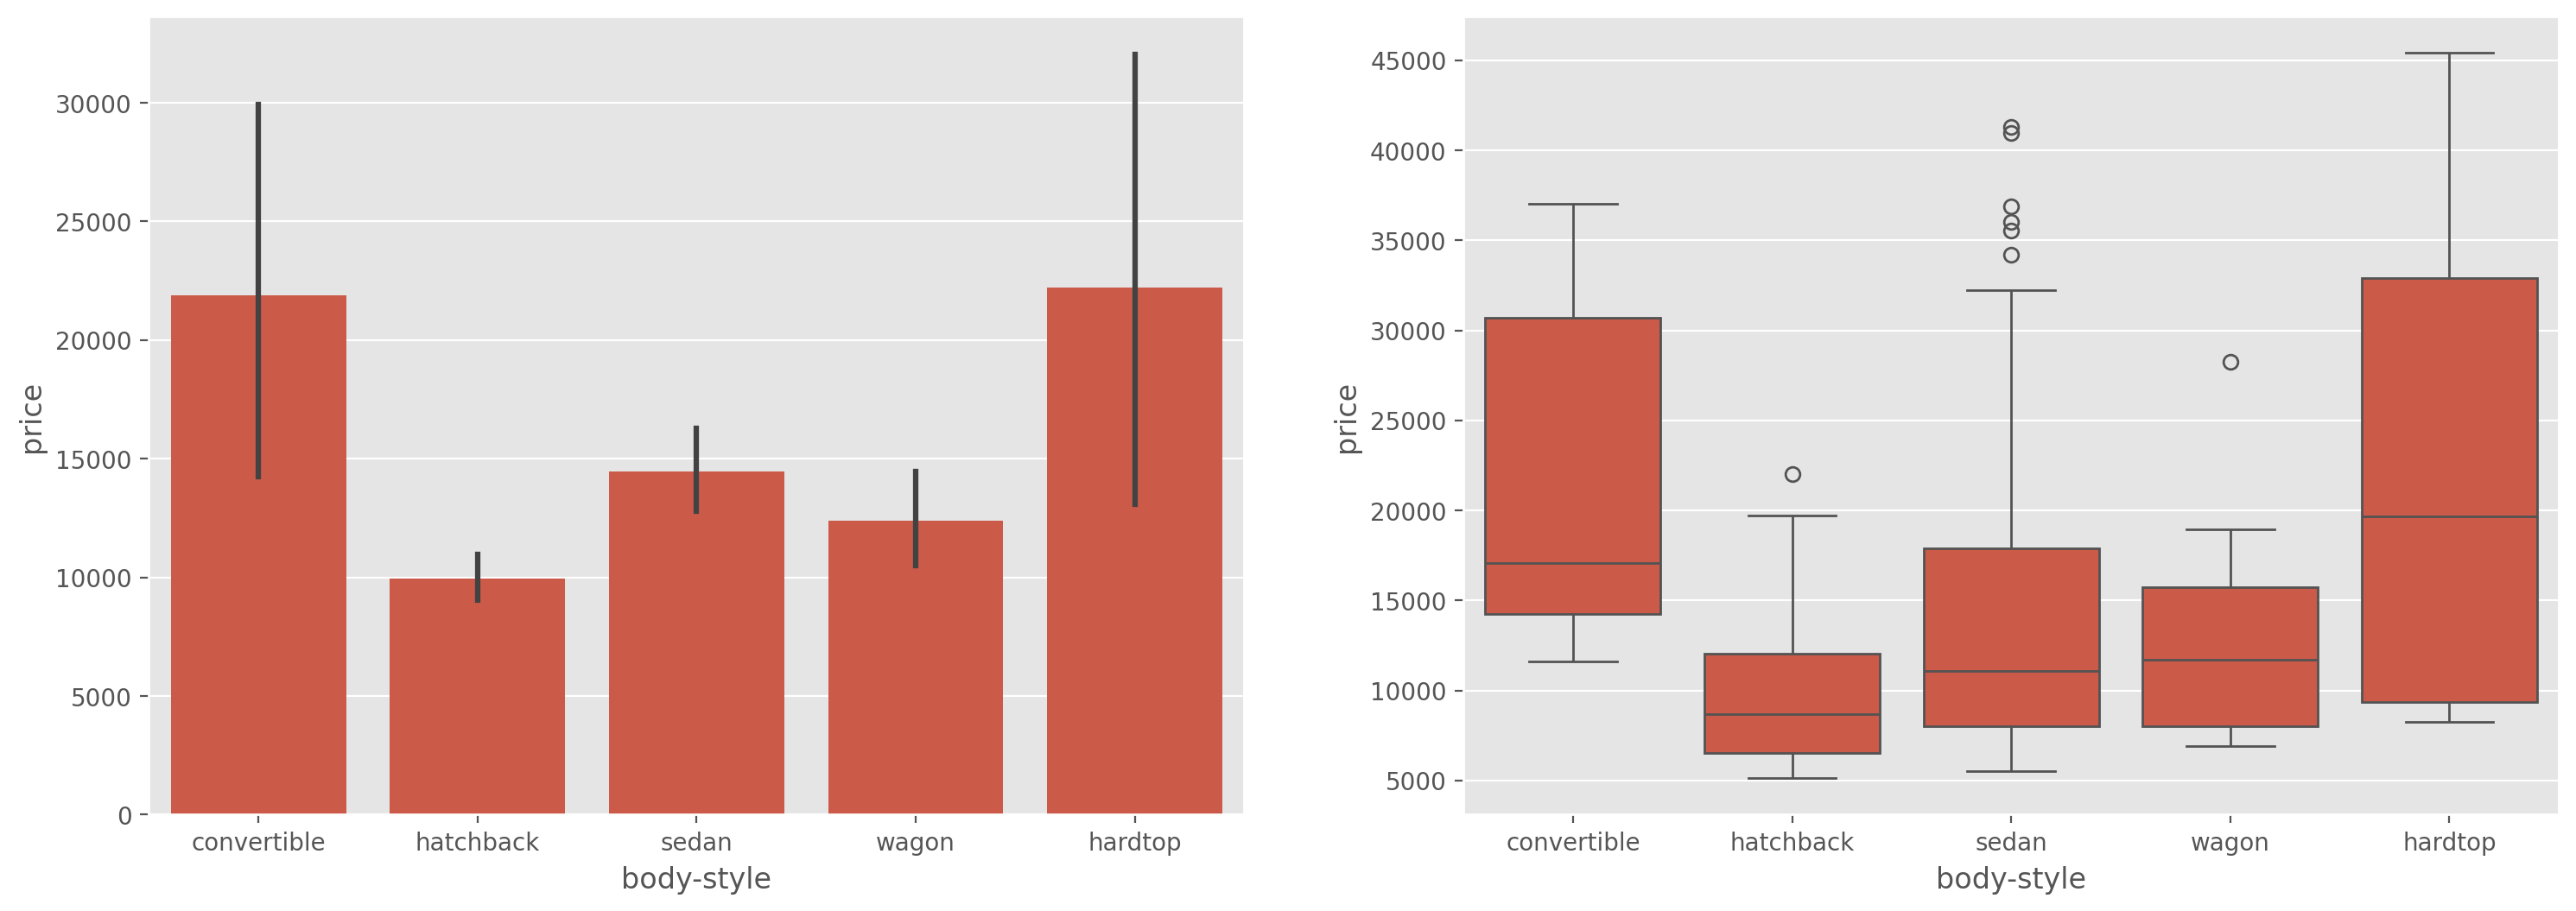

In [ ]:
plt.figure(figsize = (18,6), dpi = 200)

plt.subplot(1,2,1)
sns.barplot(x = auto['body-style'], y = auto['price'])
plt.subplot(1,2,2)
sns.boxplot(x = auto['body-style'], y = auto['price'])

<Axes: xlabel='aspiration', ylabel='price'>

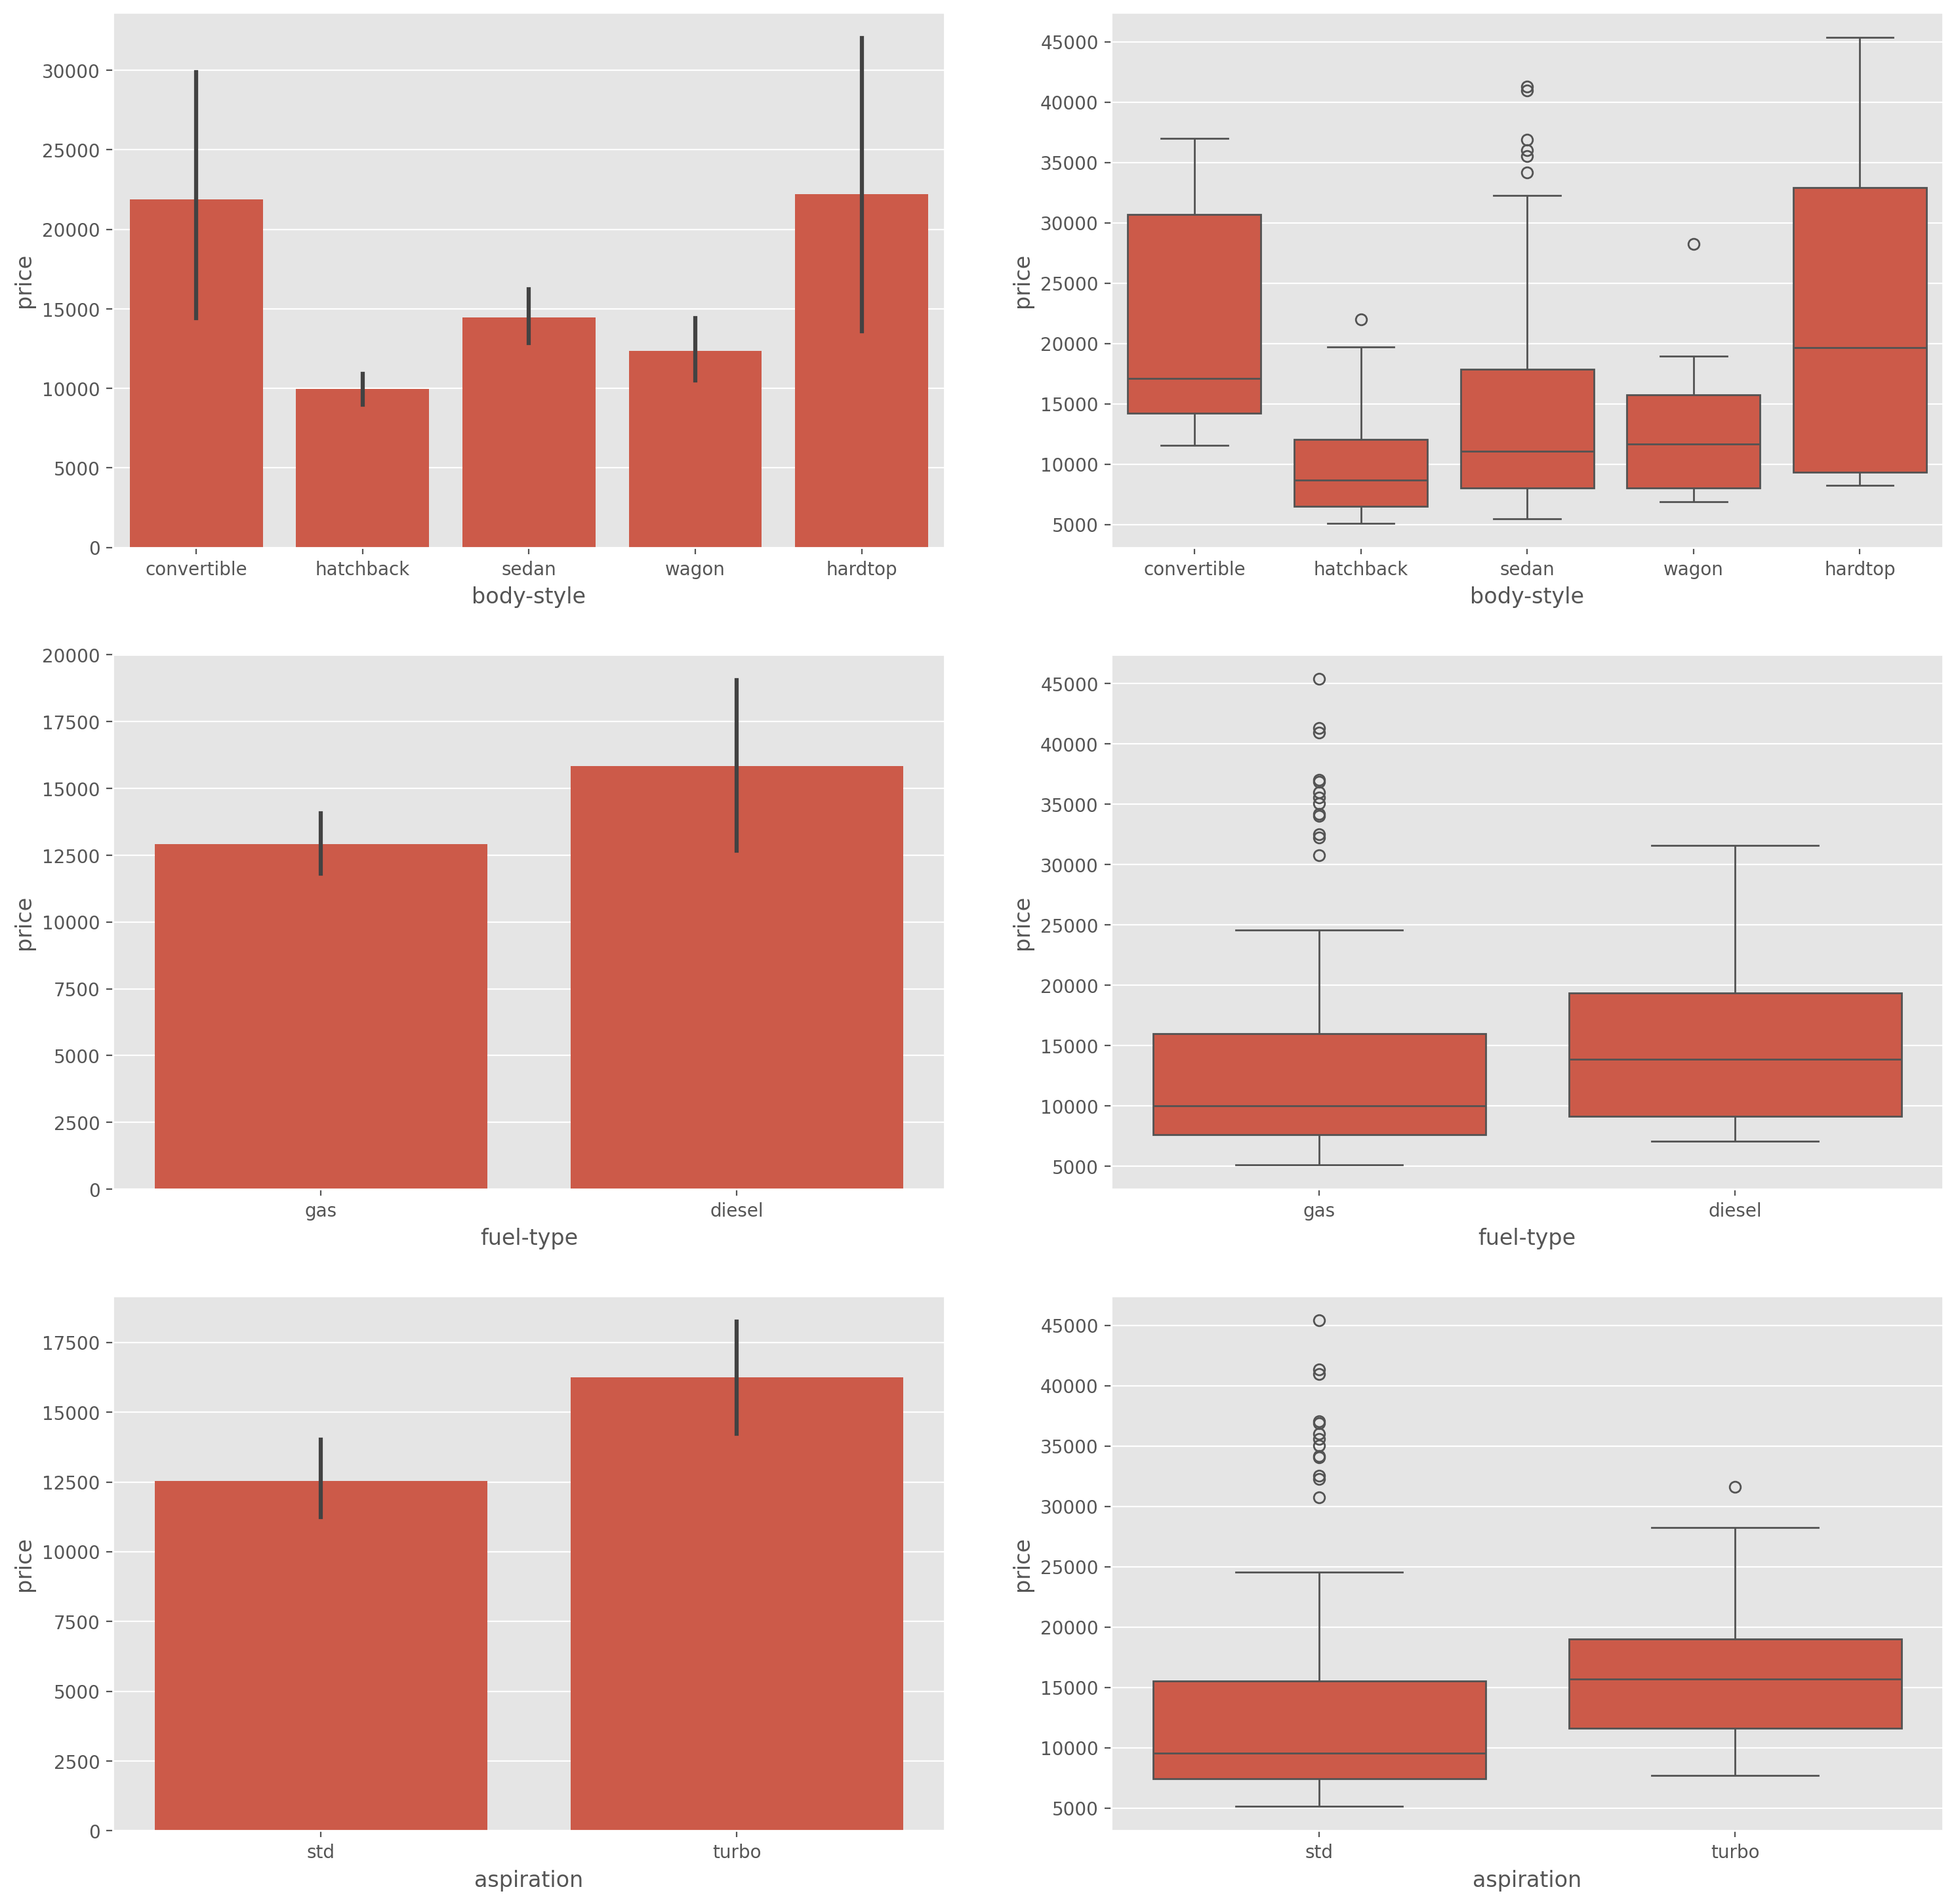

In [ ]:
plt.figure(figsize = (18,18), dpi = 200)

plt.subplot(3,2,1)
sns.barplot(x= auto['body-style'], y = auto['price'])
plt.subplot(3,2,2)
sns.boxplot(x = auto['body-style'], y = auto['price'])

plt.subplot(3,2,3)
sns.barplot(x = auto['fuel-type'], y = auto['price'])
plt.subplot(3,2,4)
sns.boxplot(x = auto['fuel-type'], y = auto['price'])

plt.subplot(3,2,5)
sns.barplot(x = auto['aspiration'], y = auto['price'])
plt.subplot(3,2,6)
sns.boxplot(x = auto['aspiration'], y = auto['price'])

# Visualizations Uses

- **Univariate : Single Feature**
    - Numerical : distplot, boxplot, violinplot
    - Categorical : countplot, piechart

- **Bivariate : Two Features**
    - Numerical - Numerical : lineplot, scatterplot
    - Numerical - Categorical : barplot, boxplot, violinplot
    - Categorical - Categorical : Countplot with hue

<Axes: ylabel='price'>

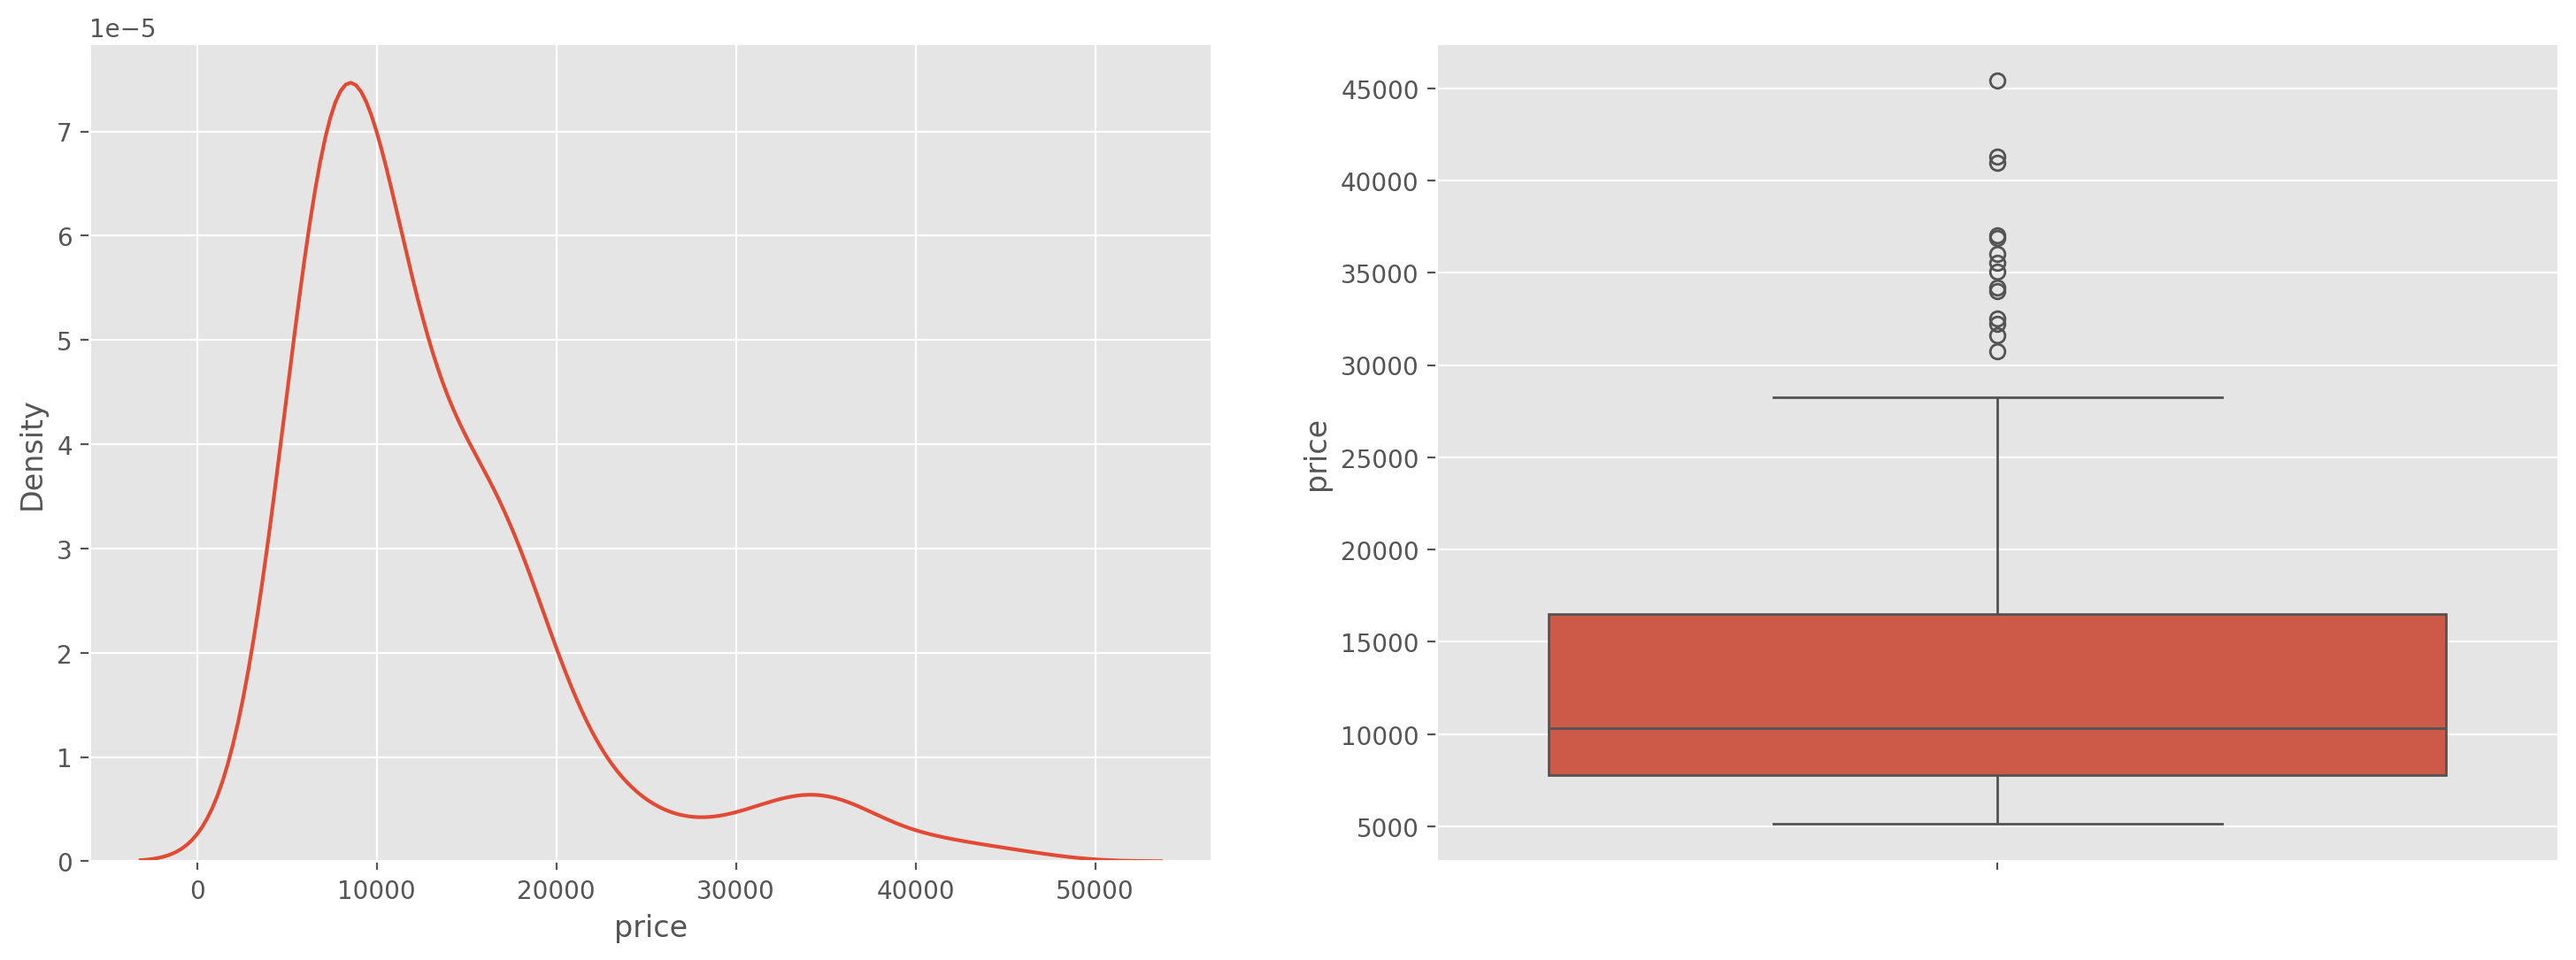

In [ ]:
# Univariate : Numerical
plt.figure(figsize = (18,6), dpi = 200)

plt.subplot(1,2,1)
sns.distplot(auto.price, hist = False)
plt.subplot(1,2,2)
sns.boxplot(y = auto.price)

<Axes: xlabel='body-style', ylabel='count'>

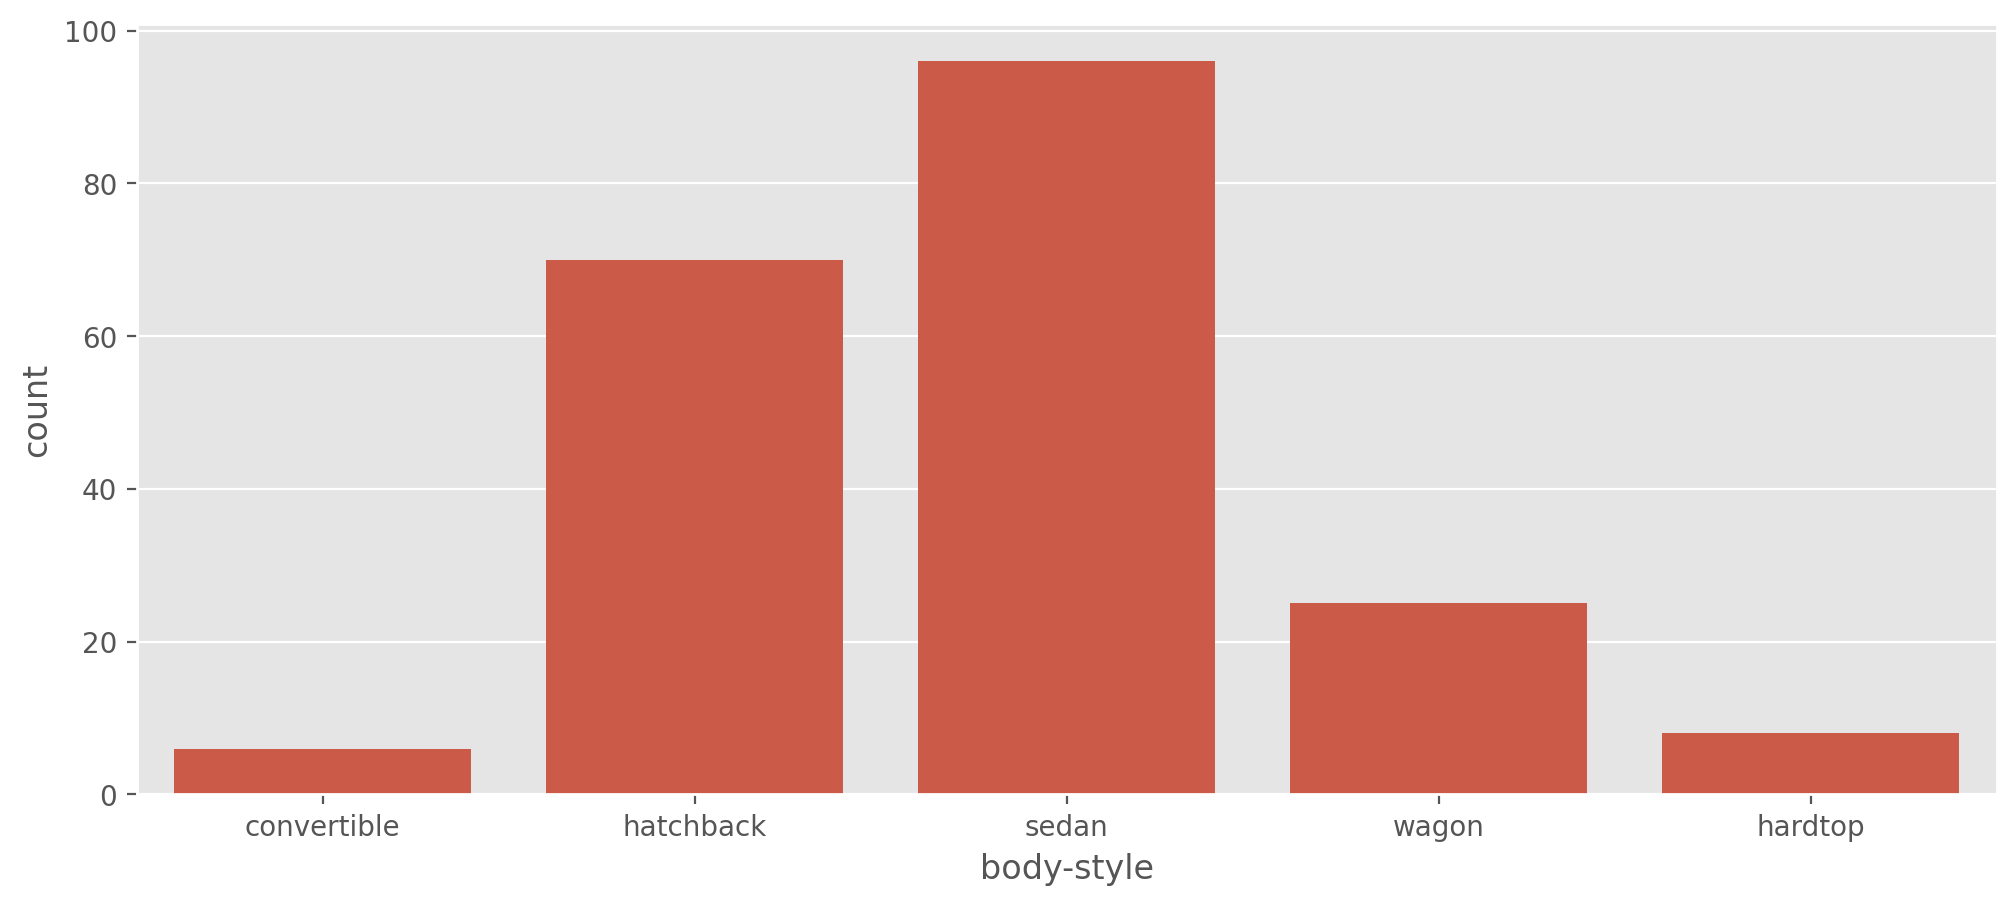

In [ ]:
# Univariate : Categorical
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(x = 'body-style', data = auto)

<Axes: xlabel='engine-size', ylabel='horsepower'>

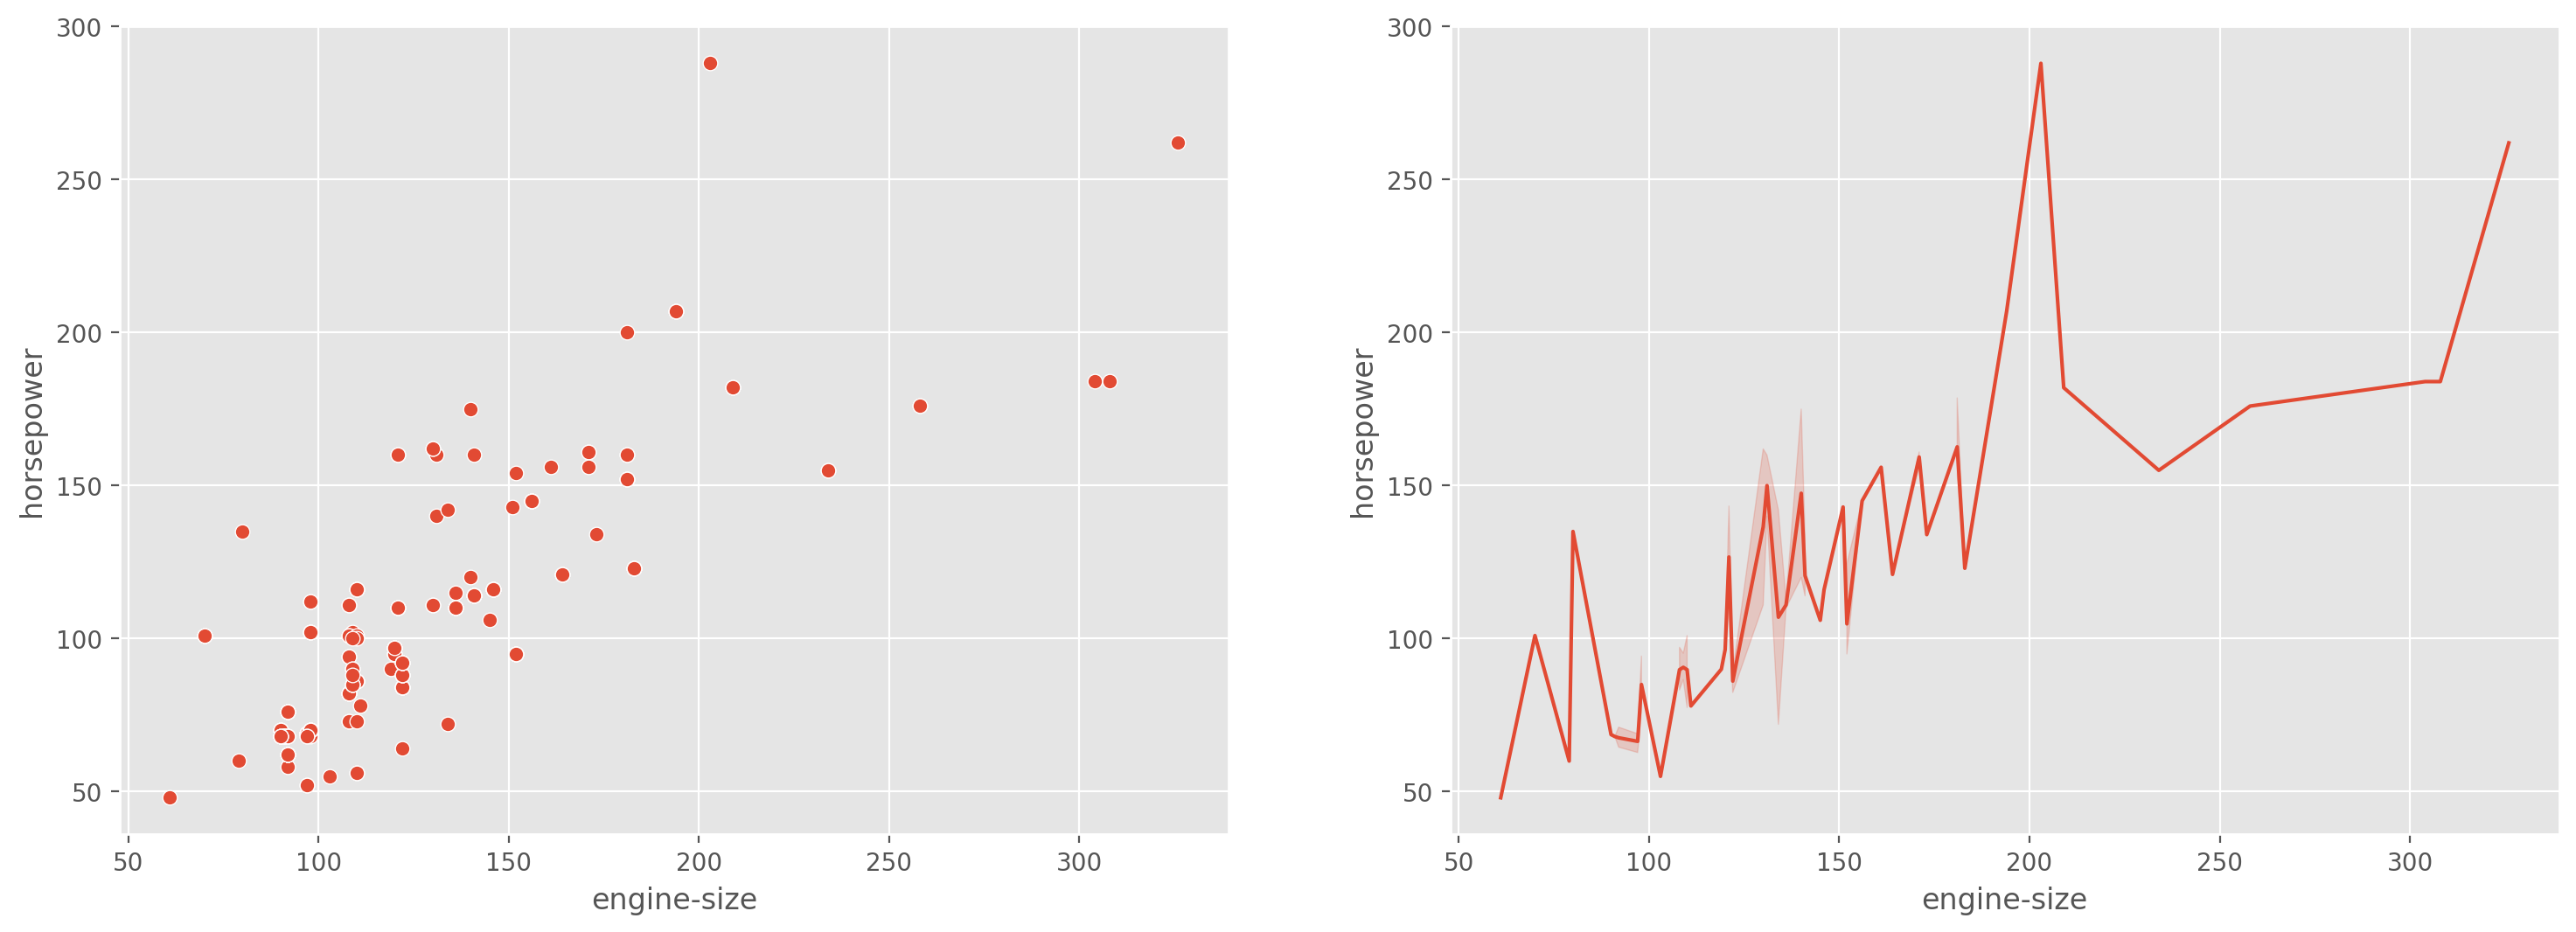

In [ ]:
# Bivariate : Numerical- Numerical
plt.figure(figsize = (18,6), dpi = 200)
plt.subplot(1,2,1)
sns.scatterplot(x = 'engine-size', y = 'horsepower', data = auto)
plt.subplot(1,2,2)
sns.lineplot(x = 'engine-size', y = 'horsepower', data = auto)

<Axes: xlabel='body-style', ylabel='price'>

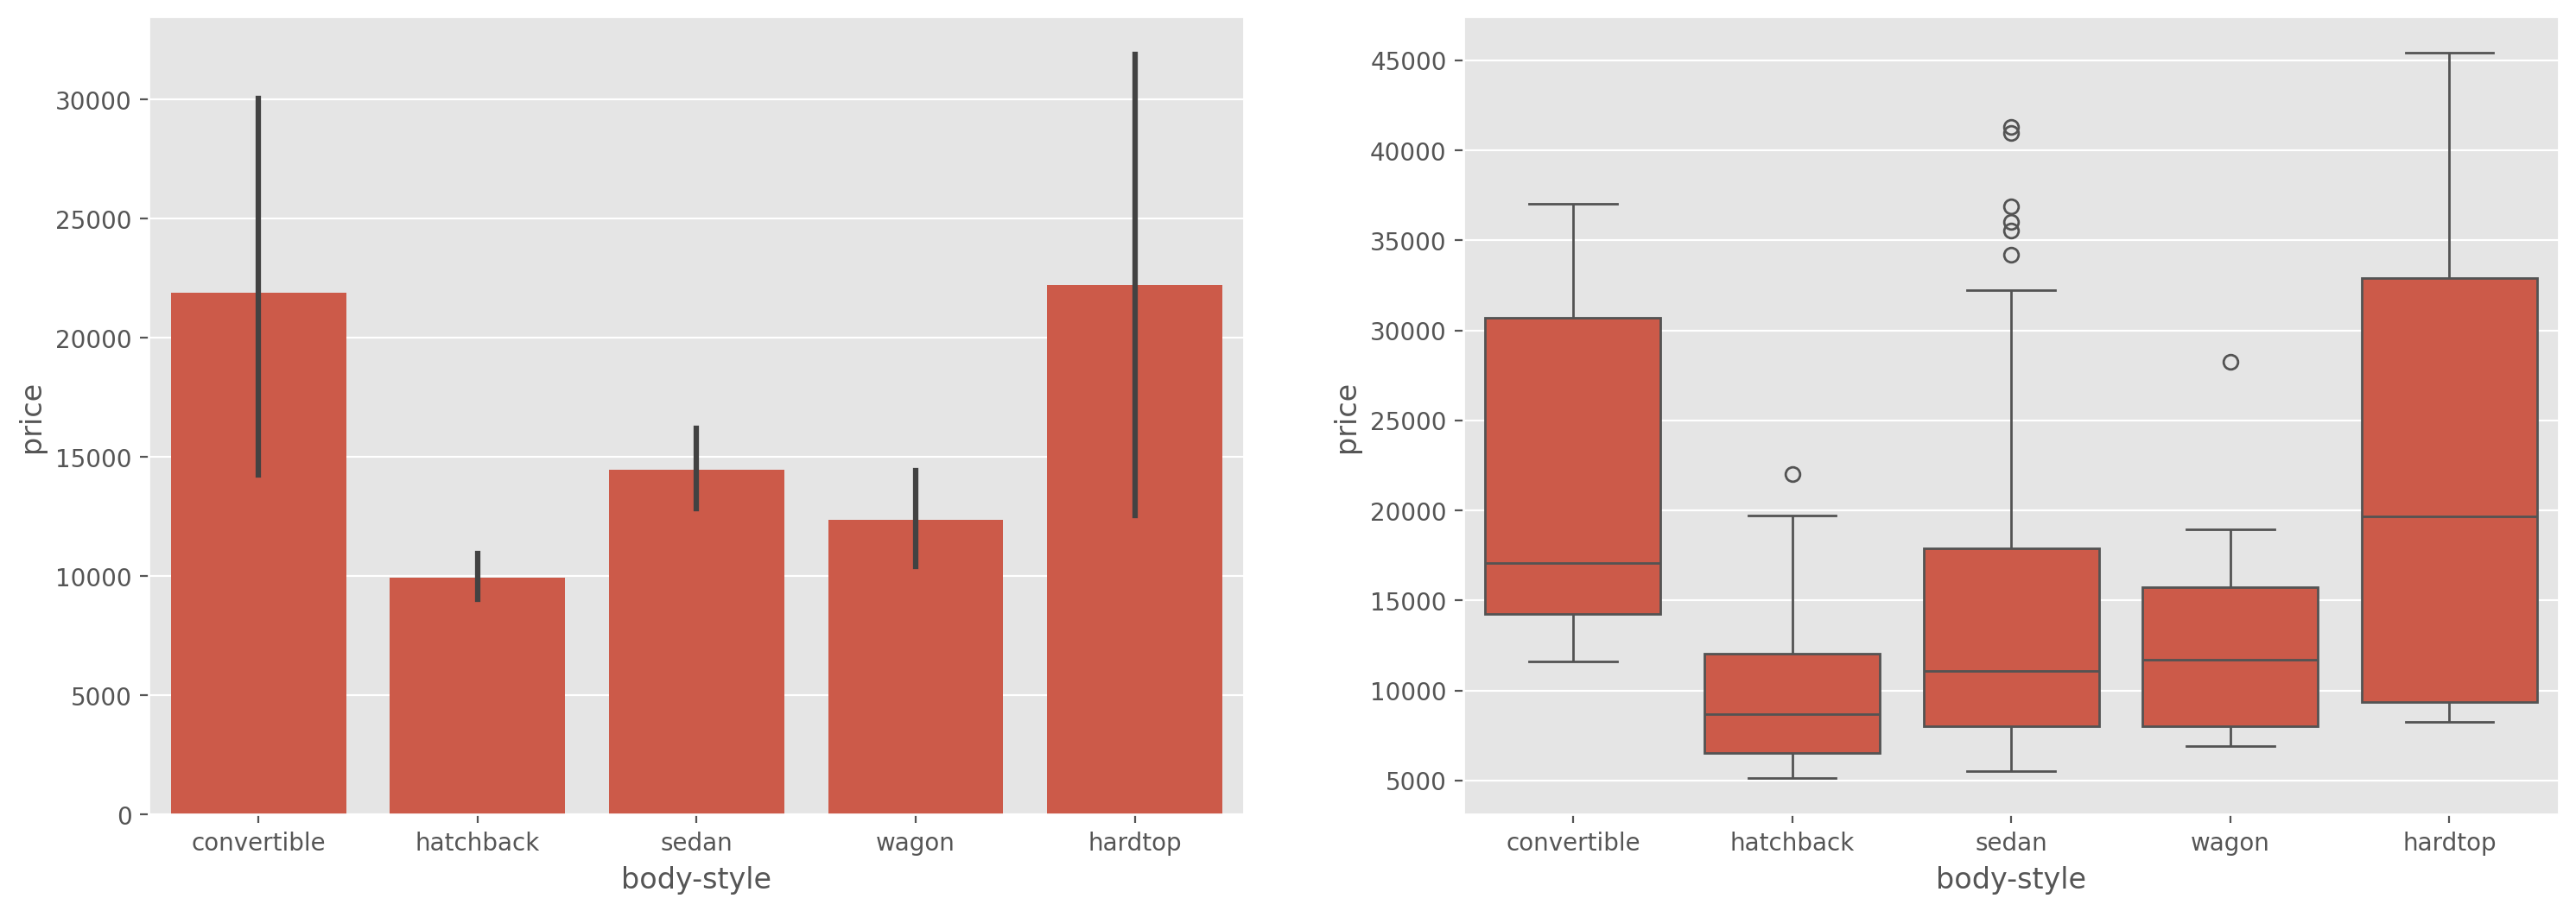

In [ ]:
# Bivariate : Numerical- Categorical
plt.figure(figsize = (18,6), dpi = 200)
plt.subplot(1,2,1)
sns.barplot(x = 'body-style', y = 'price', data = auto)
plt.subplot(1,2,2)
sns.boxplot(x = 'body-style', y = 'price', data = auto)

<Axes: xlabel='fuel-type', ylabel='count'>

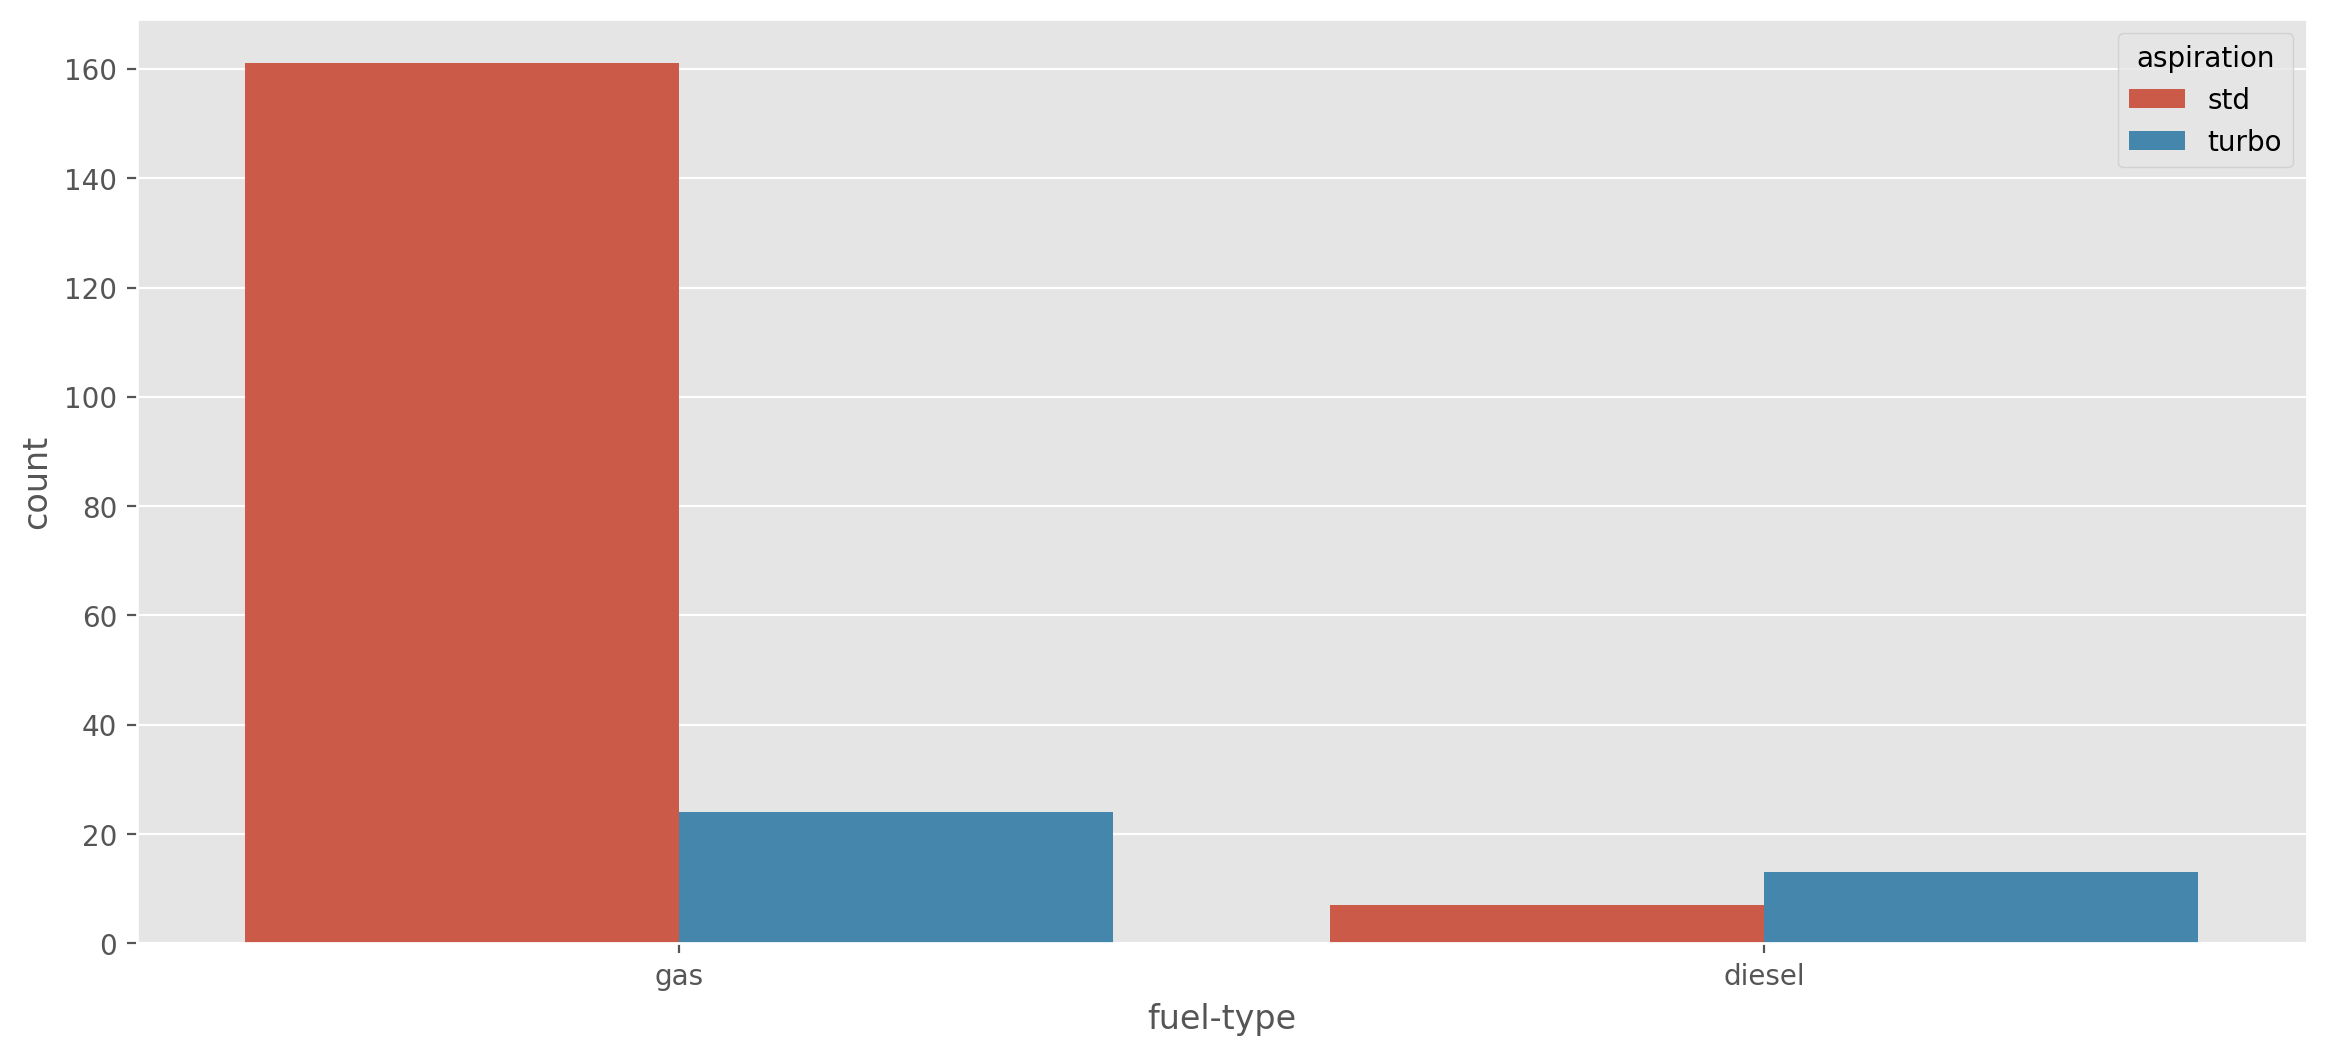

In [ ]:
# Bivariate : Categorical- Categorical
plt.figure(figsize = (14,6), dpi = 200)
sns.countplot(x = 'fuel-type', hue ='aspiration', data = auto)

In [ ]:
# Multivariate analysis